<a href="https://colab.research.google.com/github/Pluto27o2/Cyclistic-Marketing-Analysi/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# 1. IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns
import warnings


#1. Data Preparation

## 1.1 Data overview

In [ ]:
# 2. Data Upload
# Ensure the path is correct for your environment
data = pd.read_excel('/content/drive/MyDrive/CREDIT_SCORING/DATA/Data for midterm and final projects-20250607/Data_For Midterm and Final Project.xlsx')

In [ ]:
# 3. QUICK OVERVIEW
data.head()

,MJACCTTYPCD,PHUONG THUC CHO VAY,LOAIKH,SEX,BASE_BAL,CURR_BAL,DUNO_QD,CURRENCYCD,OPEN_DATE,NGAYDENHAN,...,MJACCTTYPDESC,ORGNBR,ORGNAME,PARENTORGNBR,PARENTORGNAME,LAISUAT,MUCDICHVAY,NHOMNO,NHOMNOMOI,NHOMNO_TCBS
0,CNS,CV TG NGAY VND,1,ONG,787127020.0,851714900.0,851714900.0,VND,28/12/2010,2020-03-12 00:00:00,...,Vay Tieu dung,4,KLB - CN KHANH HOA,4,KLB - CN KHANH HOA,0.12,1900-SX-DV Tu t.dung Gia dinh,1,1,CURR
1,CNS,CV TG NGAY VND,1,ONG,333388030.0,142450650.0,142450650.0,VND,2010-11-08 00:00:00,28/07/2030,...,Vay Tieu dung,20,KLB - PGD CAI LANG,19,KLB - CN DA NANG,0.18,1811-CV mua Xe may tra gop,1,1,CURR
2,CNS,CV TG NGAY VND,1,MR,311014800.0,357000690.0,357000690.0,VND,27/05/2010,26/05/2030,...,Vay Tieu dung,19,KLB - CN DA NANG,19,KLB - CN DA NANG,0.18,1870-CV TG Sinh hoat Tieu dung,1,1,CURR
3,CNS,CV TL TH LAI DINH KY VND,1,NaN,35600000.0,35600000.0,35600000.0,VND,2010-04-08 00:00:00,2013-04-08 00:00:00,...,Vay Tieu dung,64,KLB - PGD DIEN KHANH,4,KLB - CN KHANH HOA,0.24,1830-CV Sua chua Nha de o,5,5,CURR
4,CNS,CV TG NGAY VND,1,MR,430174020.0,88246180.0,88246180.0,VND,23/06/2010,23/06/2030,...,Vay Tieu dung,19,KLB - CN DA NANG,19,KLB - CN DA NANG,0.18,1870-CV TG Sinh hoat Tieu dung,1,1,CURR


In [ ]:
# Display the shape of the DataFrame (number of rows and columns)
data.shape

(90344, 22)

In [ ]:
# Display the last few rows
data.tail()

,MJACCTTYPCD,PHUONG THUC CHO VAY,LOAIKH,SEX,BASE_BAL,CURR_BAL,DUNO_QD,CURRENCYCD,OPEN_DATE,NGAYDENHAN,...,MJACCTTYPDESC,ORGNBR,ORGNAME,PARENTORGNBR,PARENTORGNAME,LAISUAT,MUCDICHVAY,NHOMNO,NHOMNOMOI,NHOMNO_TCBS
90339,CNS,CV THAU CHI CBNV KLB VND,1,ONG,1.585500e+06,1.493199e+07,1.493199e+07,VND,20/07/2020,20/07/2021,...,Vay Tieu dung,24,KLB - PGD SA DEC,22,KLB - CN DONG THAP,0.098,1860-CV CBCNV KLB,1,1,CURR
90340,CML,CV TL NH LAI DINH KY VND,1,BA,5.000000e+07,8.000000e+07,8.000000e+07,VND,20/07/2020,20/07/2021,...,Vay Cong Thuong,24,KLB - PGD SA DEC,22,KLB - CN DONG THAP,0.129,0710-HD Thuong nghiep,1,1,CURR
90341,CML,CV TL NH LAI DINH KY VND,1,BA,1.200000e+09,1.200000e+09,1.200000e+09,VND,21/07/2020,21/07/2021,...,Vay Cong Thuong,95,KLB - CN PHU YEN,95,KLB - CN PHU YEN,0.106,1894-Kinh doanh Ca the,1,1,CURR
90342,CNS,CV TL NH LAI DINH KY VND,1,ONG,5.000000e+08,5.000000e+08,5.000000e+08,VND,30/07/2020,2020-07-11 00:00:00,...,Vay Tieu dung,100,KLB - PGD CUKUIN,25,KLB - CN DAK LAK,0.093,1850-CV the chap STK,1,1,CURR
90343,CNS,CV TL NH LAI DINH KY VND,1,BA,2.000000e+08,2.000000e+08,2.000000e+08,VND,30/07/2020,27/11/2020,...,Vay Tieu dung,100,KLB - PGD CUKUIN,25,KLB - CN DAK LAK,0.091,1850-CV the chap STK,1,1,CURR


In [ ]:
# Get overall info about the data (column types, non-null counts, memory usage)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90344 entries, 0 to 90343
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MJACCTTYPCD          90344 non-null  object 
 1   PHUONG THUC CHO VAY  90344 non-null  object 
 2   LOAIKH               90344 non-null  int64  
 3   SEX                  86014 non-null  object 
 4   BASE_BAL             90344 non-null  float64
 5   CURR_BAL             90344 non-null  float64
 6   DUNO_QD              90344 non-null  float64
 7   CURRENCYCD           90344 non-null  object 
 8   OPEN_DATE            90344 non-null  object 
 9   NGAYDENHAN           90344 non-null  object 
 10  ID_TIME              90344 non-null  int64  
 11  DESC_TIME            90344 non-null  object 
 12  MJACCTTYPDESC        90344 non-null  object 
 13  ORGNBR               90344 non-null  int64  
 14  ORGNAME              90344 non-null  object 
 15  PARENTORGNBR         90344 non-null 

## 1.2 Missing values checking

In [ ]:
#Missing values check
missing_values = data.isnull().sum()

# Convert the missing values Series to a DataFrame for better display
missing_values_df = missing_values.to_frame(name='Missing_Count')

# Optional: Add a percentage column
missing_values_df['Missing_Percentage (%)'] = (missing_values_df['Missing_Count'] / len(data) * 100).round(2)

# Sort by missing count in descending order
missing_values_df = missing_values_df.sort_values(by='Missing_Count', ascending=False)

# Print the count of missing values for each column
print("Missing values per column:")
display(missing_values_df[missing_values_df['Missing_Count'] > 0][['Missing_Count', 'Missing_Percentage (%)']])

Missing values per column:


,Missing_Count,Missing_Percentage (%)
SEX,4330,4.79


In [ ]:
# List all variable names from the DataFrame columns
all_variables = data.columns.tolist()

# Define a list of what are considered 'Traditional Variables'
traditional_variables = [
'BASE_BAL','CURR_BAL','DUNO_QD','LAISUAT'
    ]

# Create a list of 'Alternative Variables' by excluding traditional ones from all variables
alternative_variables = [var for var in all_variables if var not in traditional_variables]

# Print the lists of variables
print("Traditional Variables:")
print(traditional_variables)
print("\nAlternative Variables:")
# Displaying the list directly in Colab often renders it nicely
alternative_variables

Traditional Variables:
['BASE_BAL', 'CURR_BAL', 'DUNO_QD', 'LAISUAT']

Alternative Variables:


['MJACCTTYPCD',
 'PHUONG THUC CHO VAY',
 'LOAIKH',
 'SEX',
 'CURRENCYCD',
 'OPEN_DATE',
 'NGAYDENHAN',
 'ID_TIME',
 'DESC_TIME',
 'MJACCTTYPDESC',
 'ORGNBR',
 'ORGNAME',
 'PARENTORGNBR',
 'PARENTORGNAME',
 'MUCDICHVAY',
 'NHOMNO',
 'NHOMNOMOI',
 'NHOMNO_TCBS']

# 2. EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Thiết lập style cho plots
plt.style.use('default')
sns.set_palette("husl")

# Định nghĩa biến
TRADITIONAL_VARS = ['BASE_BAL', 'CURR_BAL', 'DUNO_QD', 'LAISUAT']

ALTERNATIVE_VARS = ['MJACCTTYPCD', 'PHUONG THUC CHO VAY', 'LOAIKH', 'SEX',
                   'CURRENCYCD', 'OPEN_DATE', 'NGAYDENHAN', 'ID_TIME', 'DESC_TIME',
                   'MJACCTTYPDESC', 'ORGNBR', 'ORGNAME', 'PARENTORGNBR',
                   'PARENTORGNAME', 'MUCDICHVAY', 'NHOMNO', 'NHOMNOMOI', 'NHOMNO_TCBS']

class ComprehensiveEDA:

    def __init__(self, df):
        self.df = df
        self.traditional_vars = [var for var in TRADITIONAL_VARS if var in df.columns]
        self.alternative_vars = [var for var in ALTERNATIVE_VARS if var in df.columns]

    def run_full_eda(self):
        """Chạy EDA hoàn chỉnh cho cả 2 loại biến"""
        print("=" * 80)
        print("🔍 BẮT ĐẦU EDA HOÀN CHỈNH")
        print("=" * 80)

        # 1. Overview tổng quát
        self.general_overview()

        # 2. EDA cho Traditional Variables
        print("\n" + "=" * 80)
        print("📊 PHẦN 1: EDA CHO TRADITIONAL VARIABLES (BIẾN LIÊN TỤC)")
        print("=" * 80)
        self.eda_traditional_variables()

        # 3. EDA cho Alternative Variables
        print("\n" + "=" * 80)
        print("📋 PHẦN 2: EDA CHO ALTERNATIVE VARIABLES (BIẾN PHÂN LOẠI)")
        print("=" * 80)
        self.eda_alternative_variables()

        # 4. Phân tích mối quan hệ
        print("\n" + "=" * 80)
        print("🔗 PHẦN 3: PHÂN TÍCH MỐI QUAN HỆ GIỮA CÁC BIẾN")
        print("=" * 80)
        self.analyze_relationships()

        print("\n" + "=" * 80)
        print("✅ HOÀN THÀNH EDA!")
        print("=" * 80)

    def general_overview(self):
        """Tổng quan chung về dataset"""
        print(f"📈 TỔNG QUAN DATASET")
        print(f"   • Kích thước: {self.df.shape[0]:,} rows × {self.df.shape[1]} columns")
        print(f"   • Traditional Variables: {len(self.traditional_vars)} biến")
        print(f"   • Alternative Variables: {len(self.alternative_vars)} biến")
        print(f"   • Missing values: {self.df.isnull().sum().sum():,} cells")
        print(f"   • Memory usage: {self.df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

    def eda_traditional_variables(self):
        """EDA chi tiết cho Traditional Variables (biến liên tục)"""

        if not self.traditional_vars:
            print("❌ Không tìm thấy Traditional Variables trong dataset")
            return

        print(f"🔢 Phân tích {len(self.traditional_vars)} biến liên tục:")
        print(f"   {self.traditional_vars}")

        # 1. Thống kê mô tả
        print(f"\n1️⃣ THỐNG KÊ MÔ TẢ:")
        desc_stats = self.df[self.traditional_vars].describe()
        print(desc_stats.round(2))

        # 2. Kiểm tra missing values
        print(f"\n2️⃣ MISSING VALUES:")
        missing = self.df[self.traditional_vars].isnull().sum()
        missing_pct = (missing / len(self.df) * 100).round(2)
        missing_df = pd.DataFrame({
            'Missing_Count': missing,
            'Missing_Percentage': missing_pct
        })
        print(missing_df[missing_df['Missing_Count'] > 0])

        # 3. Phân tích phân phối
        print(f"\n3️⃣ PHÂN TÍCH PHÂN PHỐI:")
        self.analyze_distributions()

        # 4. Phát hiện outliers
        print(f"\n4️⃣ PHÁT HIỆN OUTLIERS:")
        self.detect_outliers()

        # 5. Ma trận tương quan
        print(f"\n5️⃣ MA TRẬN TƯƠNG QUAN:")
        self.correlation_analysis()

    def eda_alternative_variables(self):
        """EDA chi tiết cho Alternative Variables (biến phân loại)"""

        if not self.alternative_vars:
            print("❌ Không tìm thấy Alternative Variables trong dataset")
            return

        print(f"📝 Phân tích {len(self.alternative_vars)} biến phân loại:")

        # Phân loại các biến alternative
        date_vars = [var for var in self.alternative_vars if 'DATE' in var.upper() or 'NGAY' in var.upper()]
        id_vars = [var for var in self.alternative_vars if any(x in var.upper() for x in ['ID', 'CD', 'NBR'])]
        text_vars = [var for var in self.alternative_vars if any(x in var.upper() for x in ['NAME', 'DESC'])]
        category_vars = [var for var in self.alternative_vars if var not in date_vars + id_vars + text_vars]

        print(f"   📅 Date variables: {date_vars}")
        print(f"   🆔 ID/Code variables: {id_vars}")
        print(f"   📝 Text/Description variables: {text_vars}")
        print(f"   🏷️  Category variables: {category_vars}")

        # 1. Phân tích biến ngày tháng
        if date_vars:
            print(f"\n1️⃣ PHÂN TÍCH BIẾN NGÀY THÁNG:")
            self.analyze_date_variables(date_vars)

        # 2. Phân tích biến phân loại
        print(f"\n2️⃣ PHÂN TÍCH BIẾN PHÂN LOẠI:")
        self.analyze_categorical_variables(category_vars + id_vars)

        # 3. Phân tích biến text
        if text_vars:
            print(f"\n3️⃣ PHÂN TÍCH BIẾN TEXT:")
            self.analyze_text_variables(text_vars)

    def analyze_distributions(self):
        """Phân tích phân phối của biến liên tục"""
        for var in self.traditional_vars:
            if var in self.df.columns:
                data = self.df[var].dropna()

                # Thống kê cơ bản
                skewness = stats.skew(data)
                kurtosis = stats.kurtosis(data)

                print(f"\n   📊 {var}:")
                print(f"      • Trung bình: {data.mean():,.2f}")
                print(f"      • Trung vị: {data.median():,.2f}")
                print(f"      • Độ lệch chuẩn: {data.std():,.2f}")
                print(f"      • Skewness: {skewness:.3f} {'(lệch phải)' if skewness > 0 else '(lệch trái)' if skewness < 0 else '(đối xứng)'}")
                print(f"      • Kurtosis: {kurtosis:.3f}")

                # Phân vị
                q25, q75 = data.quantile([0.25, 0.75])
                print(f"      • Q1-Q3: {q25:,.2f} - {q75:,.2f}")

    def detect_outliers(self):
        """Phát hiện outliers bằng IQR method"""
        outlier_summary = []

        for var in self.traditional_vars:
            if var in self.df.columns:
                data = self.df[var].dropna()

                # IQR method
                Q1 = data.quantile(0.25)
                Q3 = data.quantile(0.75)
                IQR = Q3 - Q1
                lower_bound = Q1 - 1.5 * IQR
                upper_bound = Q3 + 1.5 * IQR

                outliers = data[(data < lower_bound) | (data > upper_bound)]
                outlier_pct = len(outliers) / len(data) * 100

                outlier_summary.append({
                    'Variable': var,
                    'Total_Records': len(data),
                    'Outliers_Count': len(outliers),
                    'Outliers_Percentage': outlier_pct,
                    'Lower_Bound': lower_bound,
                    'Upper_Bound': upper_bound
                })

        outlier_df = pd.DataFrame(outlier_summary)
        print(outlier_df.round(2))

    def correlation_analysis(self):
        """Phân tích ma trận tương quan"""
        if len(self.traditional_vars) < 2:
            print("   ⚠️ Cần ít nhất 2 biến để tính tương quan")
            return

        # Tính ma trận tương quan
        corr_matrix = self.df[self.traditional_vars].corr()

        print("   Ma trận tương quan (Pearson):")
        print(corr_matrix.round(3))

        # Tìm cặp biến có tương quan cao
        print("\n   🔍 Các cặp biến có tương quan cao (|r| > 0.7):")
        high_corr_pairs = []
        for i in range(len(corr_matrix.columns)):
            for j in range(i+1, len(corr_matrix.columns)):
                corr_val = corr_matrix.iloc[i, j]
                if abs(corr_val) > 0.7:
                    high_corr_pairs.append({
                        'Var1': corr_matrix.columns[i],
                        'Var2': corr_matrix.columns[j],
                        'Correlation': corr_val
                    })

        if high_corr_pairs:
            high_corr_df = pd.DataFrame(high_corr_pairs)
            print(high_corr_df.round(3))
        else:
            print("   ✅ Không có cặp biến nào có tương quan cao")

    def analyze_date_variables(self, date_vars):
        """Phân tích biến ngày tháng"""
        for var in date_vars:
            if var in self.df.columns:
                print(f"\n   📅 {var}:")

                # Thống kê cơ bản
                total_records = len(self.df)
                non_null_records = self.df[var].notna().sum()
                null_records = total_records - non_null_records

                print(f"      • Tổng records: {total_records:,}")
                print(f"      • Có giá trị: {non_null_records:,} ({non_null_records/total_records*100:.1f}%)")
                print(f"      • Missing: {null_records:,} ({null_records/total_records*100:.1f}%)")

                if non_null_records > 0:
                    # Thử convert sang datetime
                    try:
                        date_series = pd.to_datetime(self.df[var], errors='coerce')
                        valid_dates = date_series.dropna()

                        if len(valid_dates) > 0:
                            print(f"      • Ngày sớm nhất: {valid_dates.min()}")
                            print(f"      • Ngày muộn nhất: {valid_dates.max()}")
                            print(f"      • Khoảng thời gian: {(valid_dates.max() - valid_dates.min()).days} ngày")
                    except:
                        print(f"      • Không thể convert sang datetime")
                        print(f"      • Sample values: {self.df[var].dropna().head(3).tolist()}")

    def analyze_categorical_variables(self, cat_vars):
        """Phân tích biến phân loại"""
        for var in cat_vars:
            if var in self.df.columns:
                print(f"\n   🏷️ {var}:")

                # Thống kê cơ bản
                value_counts = self.df[var].value_counts(dropna=False)
                total_records = len(self.df)
                unique_values = self.df[var].nunique()
                missing_count = self.df[var].isnull().sum()

                print(f"      • Tổng records: {total_records:,}")
                print(f"      • Unique values: {unique_values:,}")
                print(f"      • Missing values: {missing_count:,} ({missing_count/total_records*100:.1f}%)")

                # Top 5 giá trị phổ biến nhất
                print(f"      • Top 5 giá trị phổ biến:")
                top_5 = value_counts.head(5)
                for idx, (value, count) in enumerate(top_5.items(), 1):
                    pct = count / total_records * 100
                    print(f"        {idx}. {value}: {count:,} ({pct:.1f}%)")

                # Cảnh báo nếu có quá nhiều unique values
                if unique_values > total_records * 0.5:
                    print(f"      ⚠️ Biến có quá nhiều unique values ({unique_values:,}), có thể cần xem xét làm ID")

    def analyze_text_variables(self, text_vars):
        """Phân tích biến text"""
        for var in text_vars:
            if var in self.df.columns:
                print(f"\n   📝 {var}:")

                # Thống kê cơ bản
                non_null_data = self.df[var].dropna()
                total_records = len(self.df)

                if len(non_null_data) > 0:
                    # Độ dài text
                    text_lengths = non_null_data.astype(str).str.len()

                    print(f"      • Tổng records: {total_records:,}")
                    print(f"      • Có text: {len(non_null_data):,}")
                    print(f"      • Unique values: {non_null_data.nunique():,}")
                    print(f"      • Độ dài trung bình: {text_lengths.mean():.1f} ký tự")
                    print(f"      • Độ dài min-max: {text_lengths.min()}-{text_lengths.max()} ký tự")

                    # Sample values
                    print(f"      • Sample values:")
                    for i, sample in enumerate(non_null_data.head(3), 1):
                        sample_str = str(sample)[:50] + "..." if len(str(sample)) > 50 else str(sample)
                        print(f"        {i}. {sample_str}")

    def analyze_relationships(self):
        """Phân tích mối quan hệ giữa các nhóm biến"""

        print("🔗 PHÂN TÍCH MỐI QUAN HỆ:")

        # 1. Mối quan hệ giữa Traditional Variables và Alternative Variables quan trọng
        if self.traditional_vars and self.alternative_vars:
            print(f"\n1️⃣ Traditional Variables vs Key Alternative Variables:")

            # Chọn một số biến alternative quan trọng để phân tích
            key_alternatives = []
            for var in ['LOAIKH', 'SEX', 'NHOMNO', 'MUCDICHVAY']:
                if var in self.df.columns and self.df[var].nunique() < 20:  # Chỉ lấy biến có ít categories
                    key_alternatives.append(var)

            if key_alternatives:
                self.analyze_traditional_vs_categorical(key_alternatives)

        # 2. Phân tích theo miền địa lý (nếu có)
        if 'REGION' in self.df.columns or any('MIEN' in col for col in self.df.columns):
            print(f"\n2️⃣ Phân tích theo miền địa lý:")
            self.analyze_by_region()

        # 3. Tóm tắt insights
        print(f"\n3️⃣ TÓM TẮT INSIGHTS:")
        self.generate_insights()

    def analyze_traditional_vs_categorical(self, cat_vars):
        """Phân tích mối quan hệ giữa biến liên tục và biến phân loại"""
        for cat_var in cat_vars:
            if cat_var in self.df.columns:
                print(f"\n   📊 Phân tích theo {cat_var}:")

                for trad_var in self.traditional_vars:
                    if trad_var in self.df.columns:
                        # Group statistics
                        grouped = self.df.groupby(cat_var)[trad_var].agg(['count', 'mean', 'median', 'std']).round(2)

                        if len(grouped) <= 5:  # Chỉ hiển thị nếu không quá nhiều categories
                            print(f"\n      {trad_var} theo {cat_var}:")
                            print(grouped)

                        # ANOVA test (nếu có nhiều hơn 2 nhóm)
                        categories = self.df[cat_var].dropna().unique()
                        if len(categories) > 2:
                            groups = [self.df[self.df[cat_var] == cat][trad_var].dropna() for cat in categories]
                            groups = [g for g in groups if len(g) > 0]  # Loại bỏ nhóm rỗng

                            if len(groups) >= 2:
                                try:
                                    f_stat, p_value = stats.f_oneway(*groups)
                                    print(f"      ANOVA test: F={f_stat:.3f}, p-value={p_value:.3f}")
                                    if p_value < 0.05:
                                        print(f"      ➜ Có sự khác biệt có ý nghĩa giữa các nhóm")
                                    else:
                                        print(f"      ➜ Không có sự khác biệt có ý nghĩa giữa các nhóm")
                                except:
                                    print(f"      ➜ Không thể thực hiện ANOVA test")

    def analyze_by_region(self):
        """Phân tích theo miền địa lý"""
        region_vars = [col for col in self.df.columns if 'REGION' in col or 'MIEN' in col]

        for region_var in region_vars:
            print(f"\n   🗺️ Phân tích theo {region_var}:")

            # Phân bố theo miền
            region_dist = self.df[region_var].value_counts()
            print(f"      Phân bố theo miền:")
            for region, count in region_dist.items():
                pct = count / len(self.df) * 100
                print(f"        {region}: {count:,} ({pct:.1f}%)")

            # Thống kê Traditional Variables theo miền
            if self.traditional_vars:
                print(f"\n      Traditional Variables theo miền:")
                for var in self.traditional_vars:
                    if var in self.df.columns:
                        regional_stats = self.df.groupby(region_var)[var].agg(['mean', 'median', 'count']).round(2)
                        print(f"\n        {var}:")
                        print(regional_stats)

    def generate_insights(self):
        """Tóm tắt các insights quan trọng"""
        insights = []

        # 1. Insights về Traditional Variables
        if self.traditional_vars:
            for var in self.traditional_vars:
                if var in self.df.columns:
                    data = self.df[var].dropna()
                    if len(data) > 0:
                        skewness = stats.skew(data)
                        if abs(skewness) > 1:
                            insights.append(f"📊 {var} có phân phối lệch {'phải' if skewness > 0 else 'trái'} (skew={skewness:.2f})")

                        # Outliers
                        Q1, Q3 = data.quantile([0.25, 0.75])
                        IQR = Q3 - Q1
                        outliers = data[(data < Q1 - 1.5*IQR) | (data > Q3 + 1.5*IQR)]
                        if len(outliers) / len(data) > 0.05:
                            insights.append(f"⚠️ {var} có {len(outliers)/len(data)*100:.1f}% outliers")

        # 2. Insights về Alternative Variables
        for var in self.alternative_vars:
            if var in self.df.columns:
                unique_ratio = self.df[var].nunique() / len(self.df)
                if unique_ratio > 0.9:
                    insights.append(f"🆔 {var} có thể là biến ID (có {self.df[var].nunique():,} unique values)")

                missing_ratio = self.df[var].isnull().sum() / len(self.df)
                if missing_ratio > 0.3:
                    insights.append(f"❓ {var} có {missing_ratio*100:.1f}% missing values")

        # 3. Hiển thị insights
        if insights:
            for i, insight in enumerate(insights, 1):
                print(f"   {i:2d}. {insight}")
        else:
            print("   ✅ Dữ liệu có chất lượng tốt, không có vấn đề đáng kể")





## Traditional variables

In [ ]:
eda = ComprehensiveEDA(data)

# Now you can call the method
eda.eda_traditional_variables()

🔢 Phân tích 4 biến liên tục:
   ['BASE_BAL', 'CURR_BAL', 'DUNO_QD', 'LAISUAT']

1️⃣ THỐNG KÊ MÔ TẢ:
           BASE_BAL      CURR_BAL       DUNO_QD   LAISUAT
count  9.034400e+04  9.034400e+04  9.034400e+04  90344.00
mean   3.824727e+08  3.492253e+08  3.504023e+08      0.09
std    4.389216e+09  3.828898e+09  3.830033e+09      0.06
min    2.000000e+00  1.000000e+00  1.000000e+00      0.00
25%    2.200000e+07  3.000000e+07  3.000000e+07      0.00
50%    1.200000e+08  1.100000e+08  1.100000e+08      0.11
75%    3.000000e+08  3.000000e+08  3.000000e+08      0.13
max    3.850000e+11  3.127000e+11  3.127000e+11      0.95

2️⃣ MISSING VALUES:
Empty DataFrame
Columns: [Missing_Count, Missing_Percentage]
Index: []

3️⃣ PHÂN TÍCH PHÂN PHỐI:

   📊 BASE_BAL:
      • Trung bình: 382,472,712.20
      • Trung vị: 120,000,000.00
      • Độ lệch chuẩn: 4,389,216,301.13
      • Skewness: 54.526 (lệch phải)
      • Kurtosis: 3580.999
      • Q1-Q3: 22,000,000.00 - 300,000,000.00

   📊 CURR_BAL:
      • Tr

### visualization

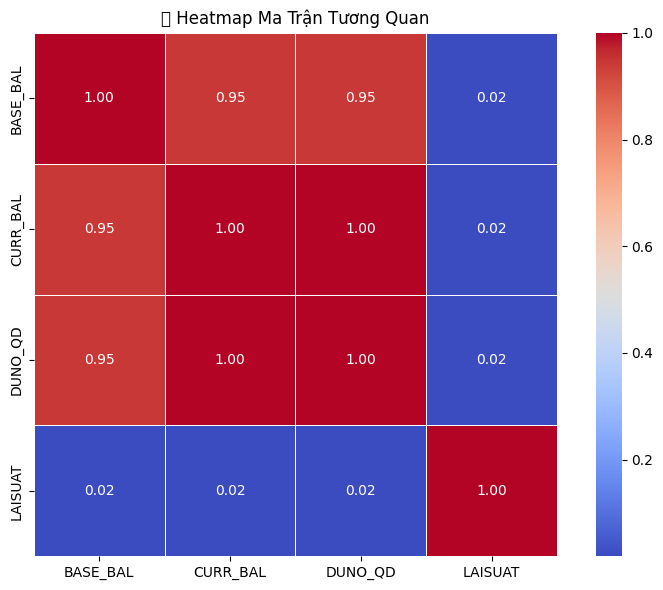

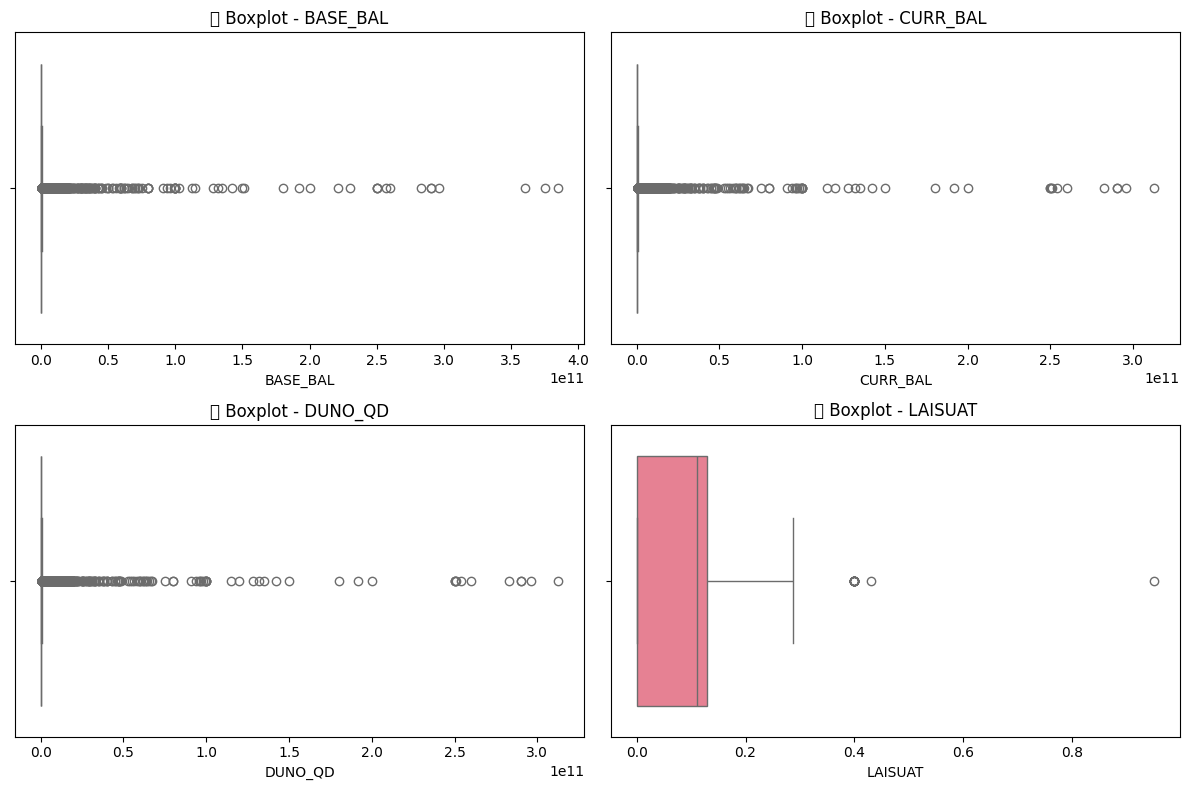

In [ ]:
#heat map
plt.figure(figsize=(8, 6))
sns.heatmap(data[['BASE_BAL', 'CURR_BAL', 'DUNO_QD', 'LAISUAT']].corr(),
            annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("🔁 Heatmap Ma Trận Tương Quan")
plt.tight_layout()
plt.show()

# Box Plot
plt.figure(figsize=(12, 8))
cols = ['BASE_BAL', 'CURR_BAL', 'DUNO_QD', 'LAISUAT']
for i, col in enumerate(cols):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=data[col])
    plt.title(f"📦 Boxplot - {col}")
plt.tight_layout()
plt.show()

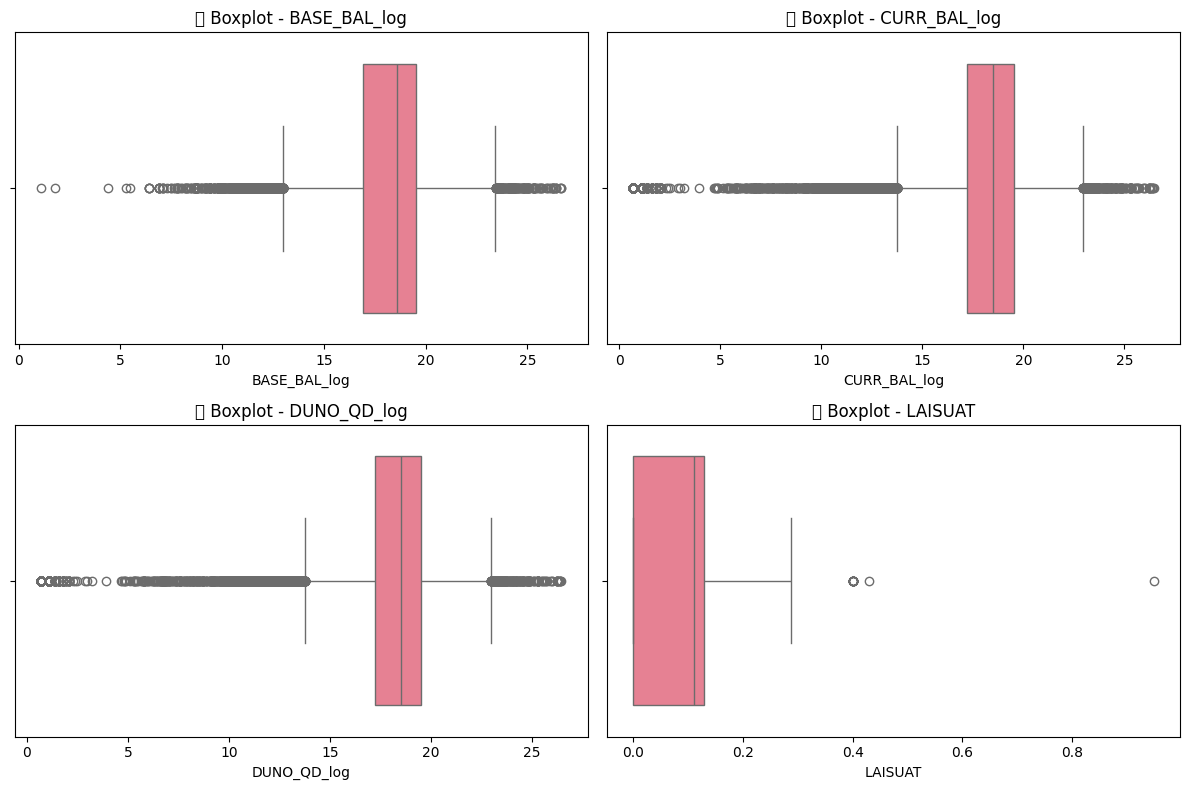

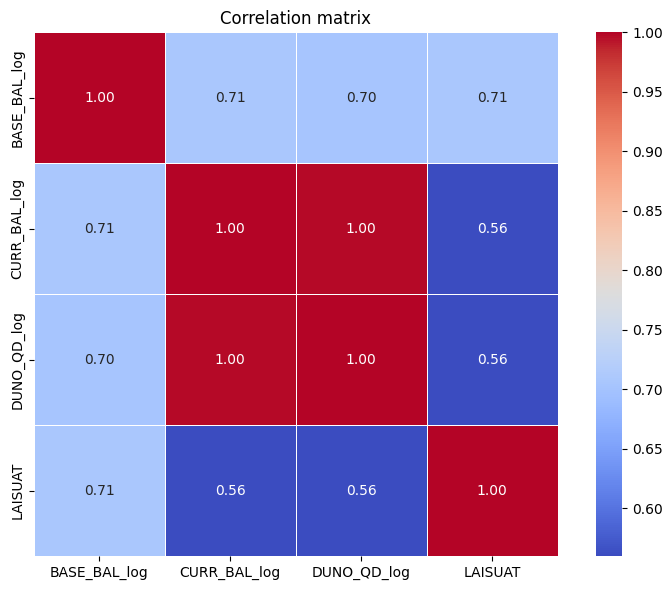

In [ ]:
# LOG TRANSFORMATION

data['CURR_BAL_log'] = np.log1p(data['CURR_BAL'])
data['BASE_BAL_log'] = np.log1p(data['BASE_BAL'])
data['DUNO_QD_log'] = np.log1p(data['DUNO_QD'])

# Box Plot for Log-Transformed Traditional Variables
plt.figure(figsize=(12, 8))
# Use the newly created log-transformed columns
cols_log = ['BASE_BAL_log', 'CURR_BAL_log', 'DUNO_QD_log','LAISUAT']

for i, col in enumerate(cols_log):
    if col in data.columns: # Check if the column exists after transformation
        plt.subplot(2, 2, i + 1)
        sns.boxplot(x=data[col].dropna()) # Drop NaNs for plotting
        plt.title(f"📦 Boxplot - {col}")
    else:
        print(f"Warning: Column '{col}' not found in data.") # Handle cases where transformation failed or column was dropped

plt.tight_layout()
plt.show()


#heat map
plt.figure(figsize=(8, 6))
sns.heatmap(data[['BASE_BAL_log', 'CURR_BAL_log', 'DUNO_QD_log','LAISUAT']].corr(),
            annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Correlation matrix")
plt.tight_layout()
plt.show()

## Alternative variables

In [ ]:
eda.eda_alternative_variables()

📝 Phân tích 18 biến phân loại:
   📅 Date variables: ['OPEN_DATE', 'NGAYDENHAN']
   🆔 ID/Code variables: ['MJACCTTYPCD', 'CURRENCYCD', 'ID_TIME', 'ORGNBR', 'PARENTORGNBR', 'MUCDICHVAY']
   📝 Text/Description variables: ['DESC_TIME', 'MJACCTTYPDESC', 'ORGNAME', 'PARENTORGNAME']
   🏷️  Category variables: ['PHUONG THUC CHO VAY', 'LOAIKH', 'SEX', 'NHOMNO', 'NHOMNOMOI', 'NHOMNO_TCBS']

1️⃣ PHÂN TÍCH BIẾN NGÀY THÁNG:

   📅 OPEN_DATE:
      • Tổng records: 90,344
      • Có giá trị: 90,344 (100.0%)
      • Missing: 0 (0.0%)
      • Ngày sớm nhất: 2004-02-04 00:00:00
      • Ngày muộn nhất: 2020-12-08 00:00:00
      • Khoảng thời gian: 6152 ngày

   📅 NGAYDENHAN:
      • Tổng records: 90,344
      • Có giá trị: 90,344 (100.0%)
      • Missing: 0 (0.0%)
      • Ngày sớm nhất: 2006-11-27 00:00:00
      • Ngày muộn nhất: 2121-04-30 00:00:00
      • Khoảng thời gian: 41792 ngày

2️⃣ PHÂN TÍCH BIẾN PHÂN LOẠI:

   🏷️ PHUONG THUC CHO VAY:
      • Tổng records: 90,344
      • Unique values: 38
      •

###   Visualization

### many unique values Variables >6 values


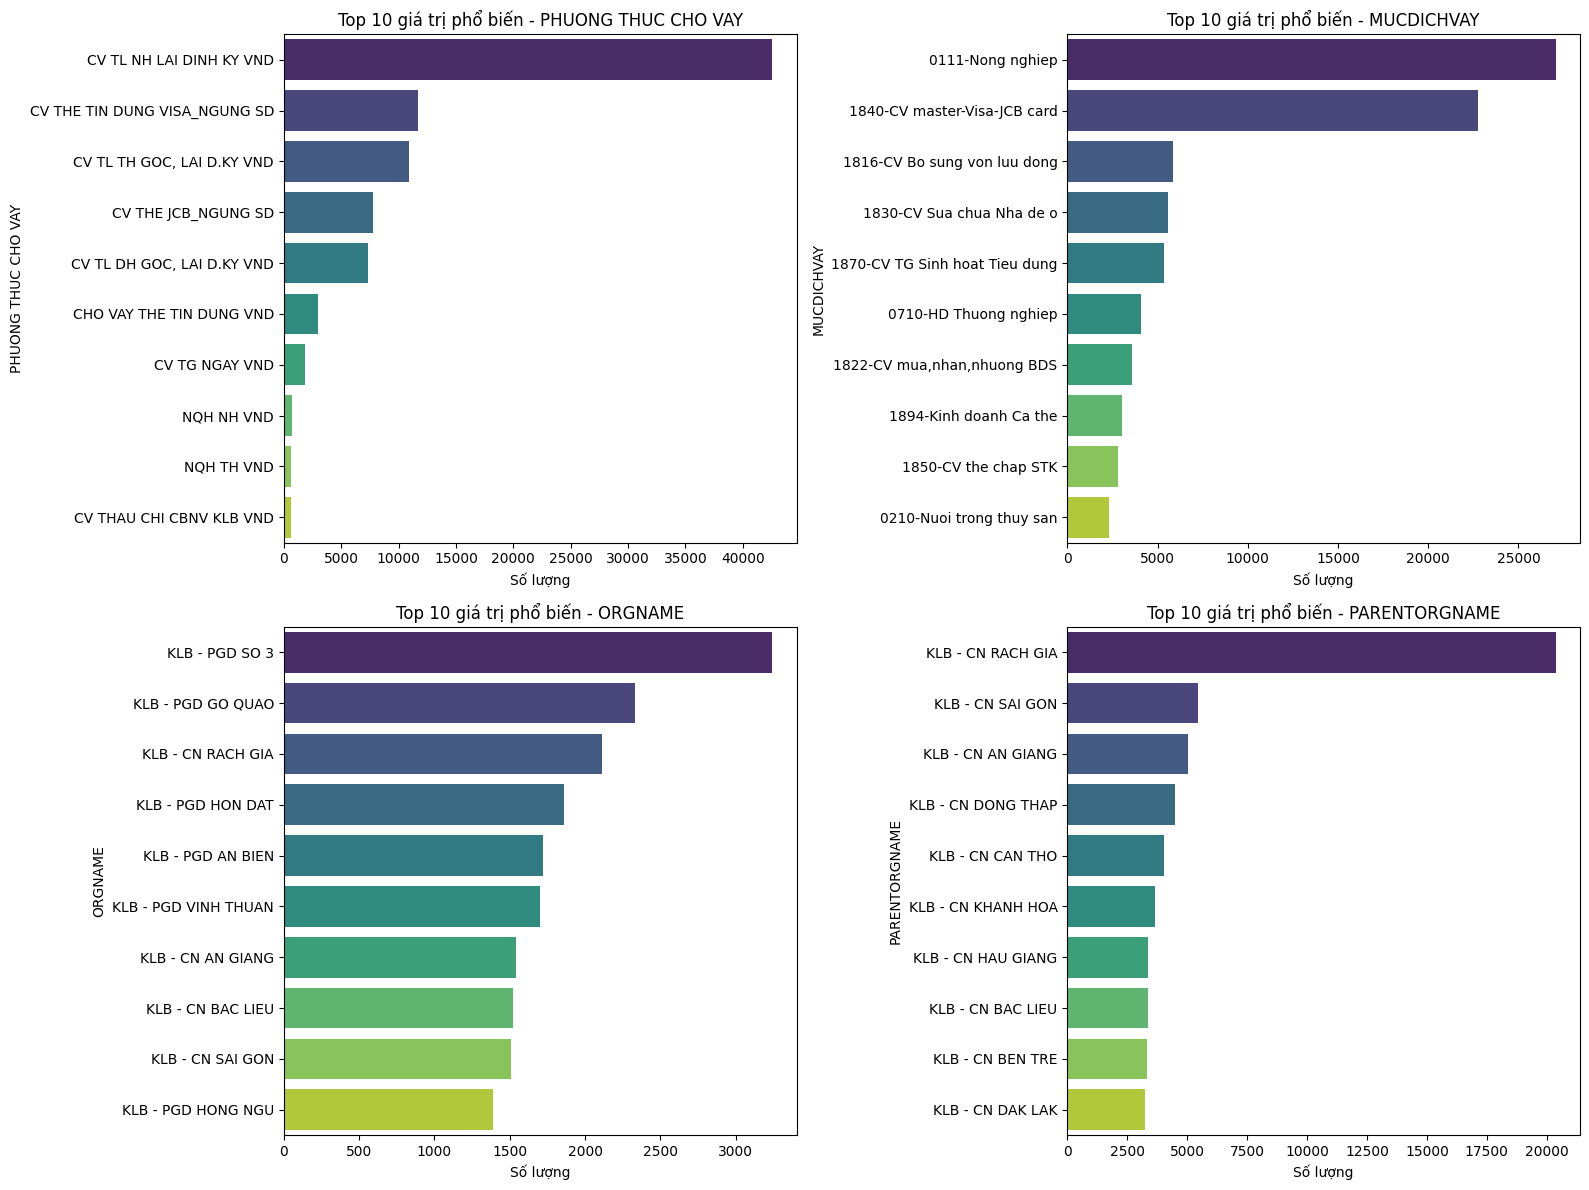

In [ ]:

# Top 10 values
cat_cols = ['PHUONG THUC CHO VAY', 'MUCDICHVAY', 'ORGNAME', 'PARENTORGNAME']
top_n = 10


fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    top_categories = data[col].value_counts().nlargest(top_n)
    sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis", ax=axes[i])
    axes[i].set_title(f"Top {top_n} giá trị phổ biến - {col}")
    axes[i].set_xlabel("Số lượng")
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()


### Less unique values

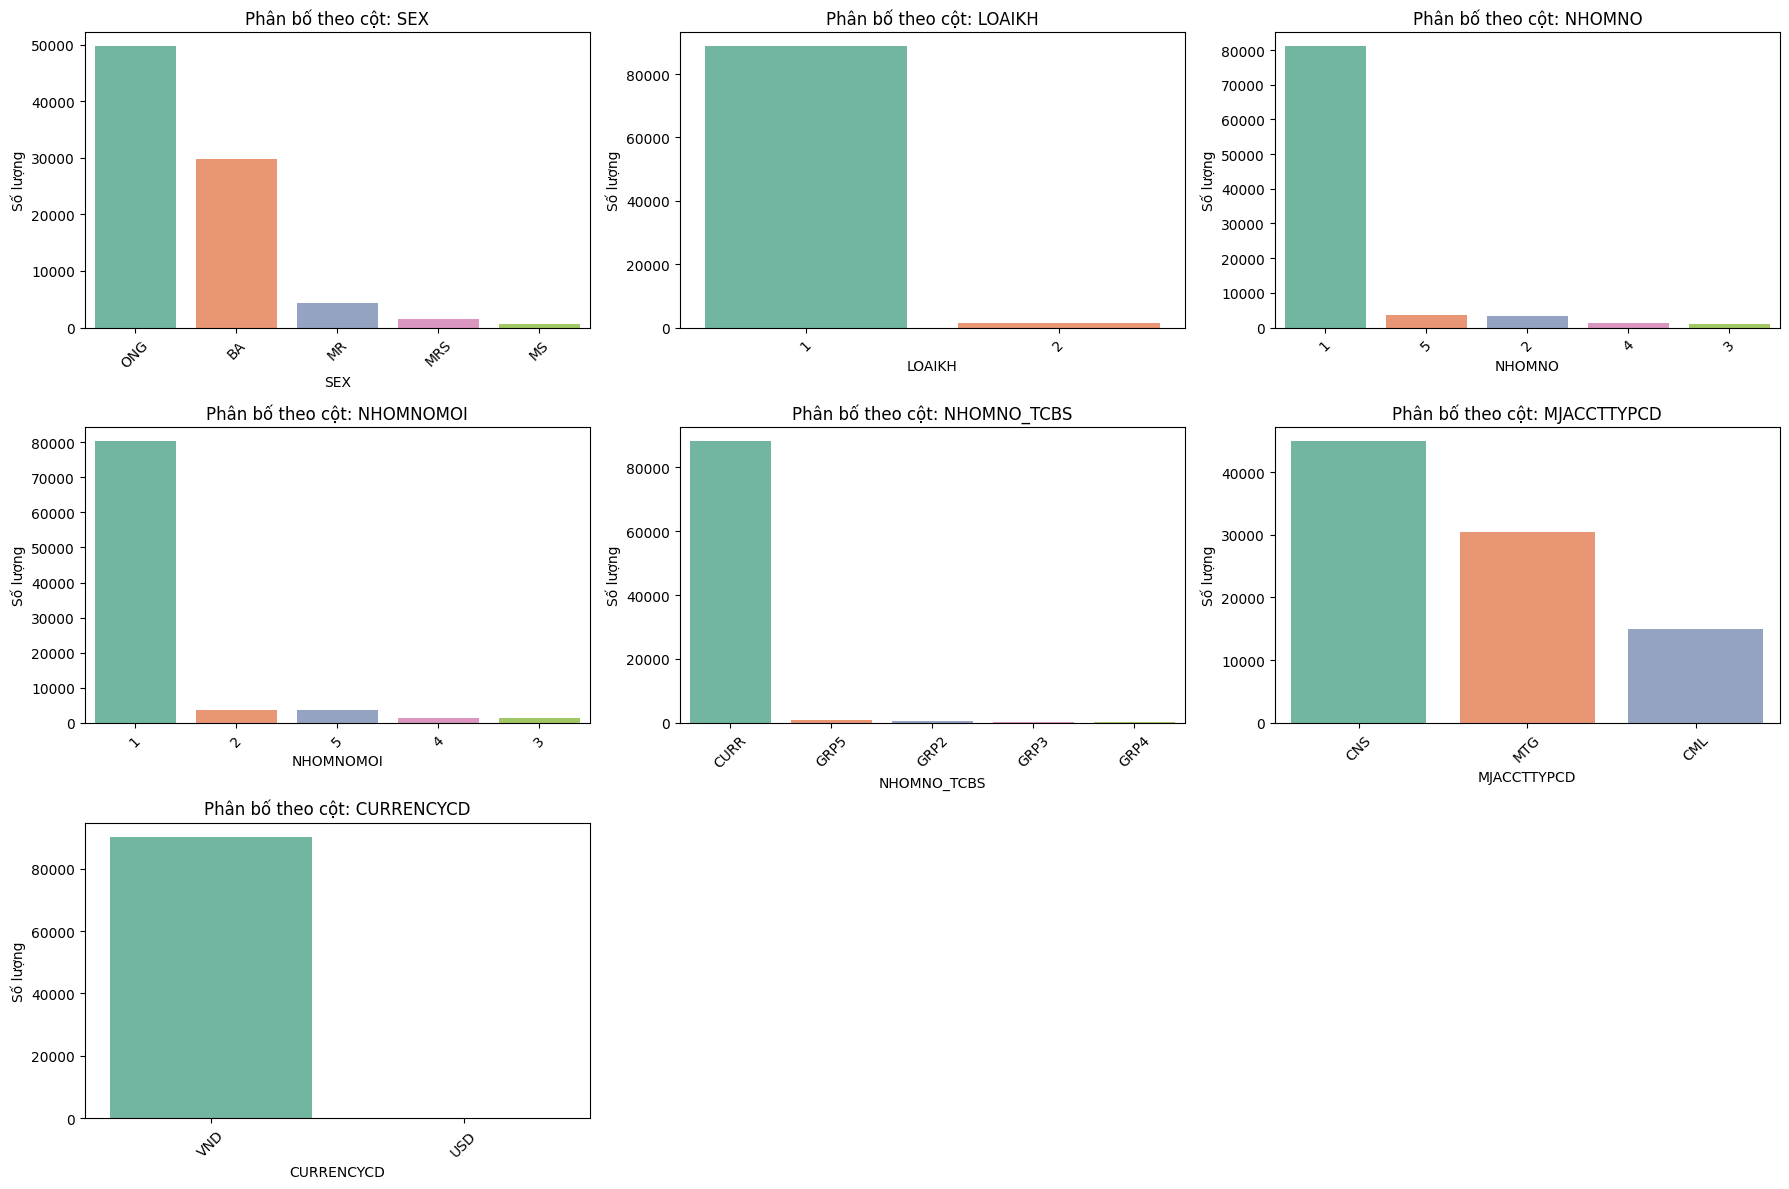

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical columns to visualize
categorical_cols = ['SEX', 'LOAIKH', 'NHOMNO', 'NHOMNOMOI', 'NHOMNO_TCBS', 'MJACCTTYPCD', 'CURRENCYCD']

# Set up subplot grid (3 rows x 3 columns)
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()  # Flatten to access easily

for i, col in enumerate(categorical_cols):
    sns.countplot(data=data, x=col, palette='Set2', order=data[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f"Phân bố theo cột: {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Số lượng")
    axes[i].tick_params(axis='x', rotation=45)

# Hide any unused subplots
for j in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## OUTPUT variables


'NHOMNOMOI' variable distribution:
Distribution of NHOMNOMOI Ratings (1 to 5):


,Count,Proportion (%)
NHOMNOMOI,,
1,80280,88.86
2,3754,4.16
3,1257,1.39
4,1320,1.46
5,3733,4.13


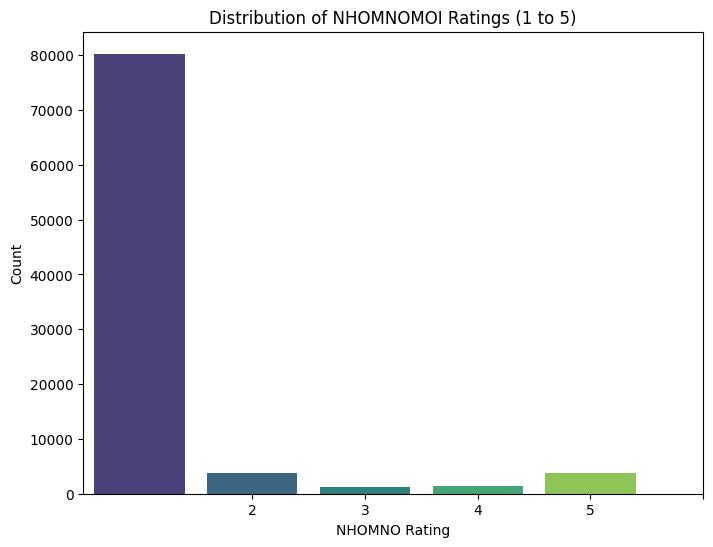

In [ ]:
if 'NHOMNOMOI' in data.columns:
    print("\n'NHOMNOMOI' variable distribution:")
    nhomnomoi_counts = data['NHOMNOMOI'].value_counts().sort_index() # Sort by index to get order 1 to 5
    nhomnomoi_proportions = data['NHOMNOMOI'].value_counts(normalize=True).sort_index()

    # Create a DataFrame to display counts and proportions
    nhomnomoi_distribution_df = pd.DataFrame({
        'Count': nhomnomoi_counts,
        'Proportion (%)': (nhomnomoi_proportions * 100).round(2)
    })
    print("Distribution of NHOMNOMOI Ratings (1 to 5):")
    display(nhomnomoi_distribution_df)

    # Create a bar plot for the distribution of NHOMNOMOI
    plt.figure(figsize=(8, 6))
    sns.barplot(x=nhomnomoi_counts.index, y=nhomnomoi_counts.values, palette='viridis')
    plt.title('Distribution of NHOMNOMOI Ratings (1 to 5)')
    plt.xlabel('NHOMNO Rating')
    plt.ylabel('Count')
    plt.xticks(nhomnomoi_counts.index) # Ensure all labels 1-5 are shown
    plt.show()

else:
    print("'NHOMNOMOI' column not found in the DataFrame.")

# FEATURE ENGINEERING

In [ ]:
print("Unique values in 'LOAIKH' before encoding:")
print(data['LOAIKH'].unique())

Unique values in 'LOAIKH' before encoding:
[1 2]


## CURRENCY


In [ ]:
print("Unique values in 'CURRENCYCD' before encoding:")
print(data['CURRENCYCD'].unique())

Unique values in 'CURRENCYCD' before encoding:
['VND' 'USD']


## MJACCTTYPCD

In [ ]:
print("Unique values in 'MJACCTTYPCD' before encoding:")
print(data['MJACCTTYPCD'].unique())

Unique values in 'MJACCTTYPCD' before encoding:
['CNS' 'CML' 'MTG']


## OPDENDATE + NGAY_DEN_HAN (DURATION_MONTHS)

In [ ]:
# CHUYEN THANH DURATION

data['OPEN_DATE'] = pd.to_datetime(data['OPEN_DATE'], format='%d/%m/%Y')
data['NGAYDENHAN'] = pd.to_datetime(data['NGAYDENHAN'], format='%d/%m/%Y')

# Calculate DURATION_DAYS by finding the difference between NGAYDENHAN and OPEN_DATE
# and then extract the number of days.
data['DURATION_DAYS'] = (data['NGAYDENHAN'] - data['OPEN_DATE']).dt.days

# Use 'data' instead of 'df' to calculate DURATION_MONTHS
data['DURATION_MONTHS'] = data['DURATION_DAYS'] // 30
print(data[['OPEN_DATE', 'NGAYDENHAN', 'DURATION_DAYS', 'DURATION_MONTHS']].head())
data.head()

   OPEN_DATE NGAYDENHAN  DURATION_DAYS  DURATION_MONTHS
0 2010-12-28 2020-03-12           3362              112
1 2010-11-08 2030-07-28           7202              240
2 2010-05-27 2030-05-26           7304              243
3 2010-04-08 2013-04-08           1096               36
4 2010-06-23 2030-06-23           7305              243


,MJACCTTYPCD,PHUONG THUC CHO VAY,LOAIKH,SEX,BASE_BAL,CURR_BAL,DUNO_QD,CURRENCYCD,OPEN_DATE,NGAYDENHAN,...,MUCDICHVAY,NHOMNO,NHOMNOMOI,NHOMNO_TCBS,DURATION_DAYS,DURATION_MONTHS,PHUONGTHUCCHOVAY_GROUP,Nhom_MucDich,REGION,SEX_GROUP
0,CNS,CV TG NGAY VND,1,ONG,787127020.0,851714900.0,851714900.0,VND,2010-12-28,2020-03-12,...,1900-SX-DV Tu t.dung Gia dinh,1,1,CURR,3362,112,Vay Tra Gop,Tiêu dùng cá nhân/gia đình,Miền Trung,Male
1,CNS,CV TG NGAY VND,1,ONG,333388030.0,142450650.0,142450650.0,VND,2010-11-08,2030-07-28,...,1811-CV mua Xe may tra gop,1,1,CURR,7202,240,Vay Tra Gop,Mua sắm & trả góp,Miền Trung,Male
2,CNS,CV TG NGAY VND,1,MR,311014800.0,357000690.0,357000690.0,VND,2010-05-27,2030-05-26,...,1870-CV TG Sinh hoat Tieu dung,1,1,CURR,7304,243,Vay Tra Gop,Tiêu dùng cá nhân/gia đình,Miền Trung,Male
3,CNS,CV TL TH LAI DINH KY VND,1,NaN,35600000.0,35600000.0,35600000.0,VND,2010-04-08,2013-04-08,...,1830-CV Sua chua Nha de o,5,5,CURR,1096,36,Vay The Chap,Tiêu dùng cá nhân/gia đình,Miền Trung,Business
4,CNS,CV TG NGAY VND,1,MR,430174020.0,88246180.0,88246180.0,VND,2010-06-23,2030-06-23,...,1870-CV TG Sinh hoat Tieu dung,1,1,CURR,7305,243,Vay Tra Gop,Tiêu dùng cá nhân/gia đình,Miền Trung,Male


## PHUONG THUC CHO VAY (PHUONGTHUCCHOVAY_GROUP)

        PHUONG THUC CHO VAY PHUONGTHUCCHOVAY_GROUP
0            CV TG NGAY VND            Vay Tra Gop
1            CV TG NGAY VND            Vay Tra Gop
2            CV TG NGAY VND            Vay Tra Gop
3  CV TL TH LAI DINH KY VND           Vay The Chap
4            CV TG NGAY VND            Vay Tra Gop

Value counts for the new column 'PHUONGTHUCCHOVAY_GROUP':
PHUONGTHUCCHOVAY_GROUP
Vay Tin Chap Tra Lai    43344
The Tin Dung            22411
Vay The Chap            19105
No Qua Han               2067
Vay Tra Gop              1810
Thau Chi                 1349
Co Cau No COVID           141
Tai Cap Von               114
Vay MLF Dac Biet            3
Name: count, dtype: int64


/tmp/ipython-input-19-3346883318.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PHUONGTHUCCHOVAY_GROUP', data=data, palette='viridis')


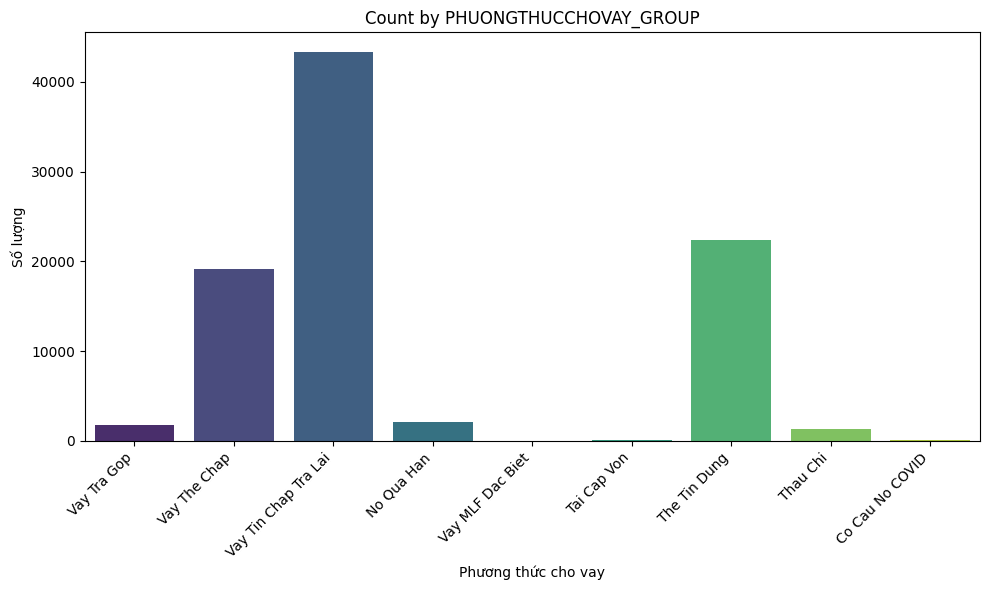

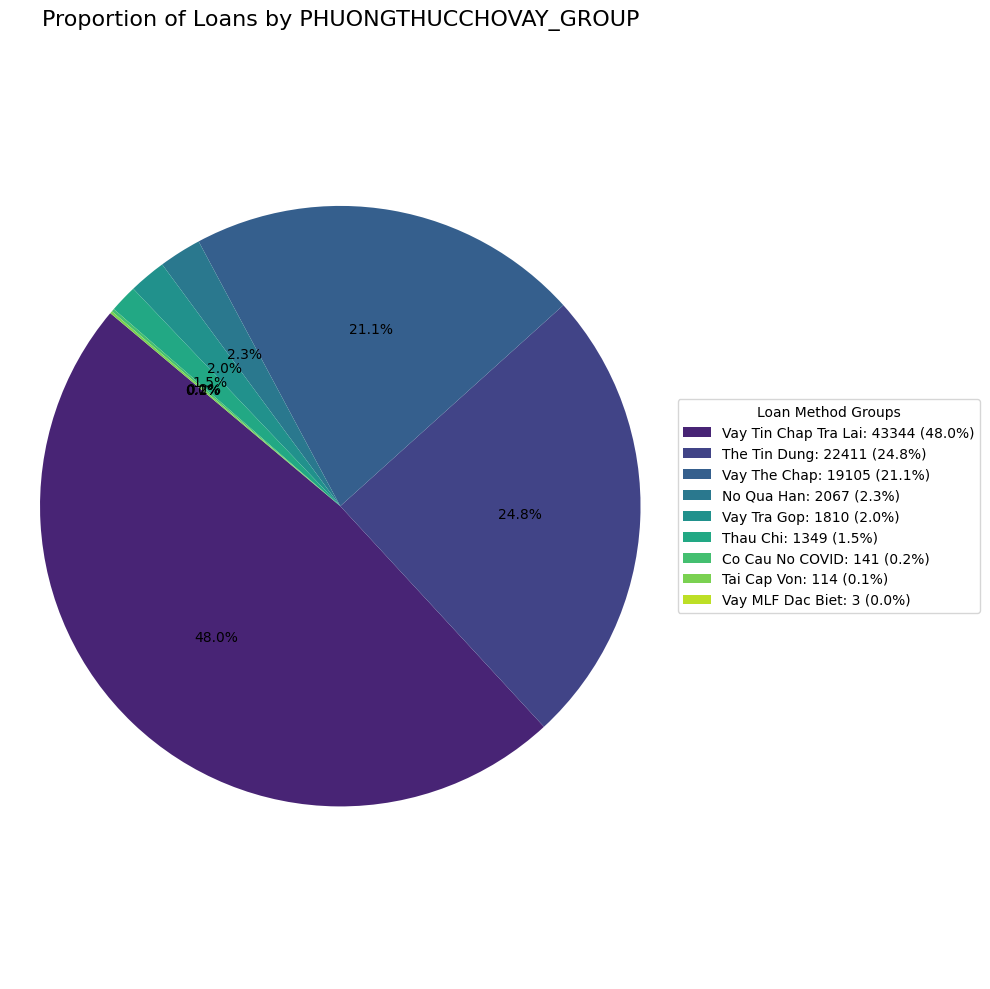

In [ ]:
# Define the categories and their corresponding values
phuongthucchovay_categories = {
    'Vay Tin Chap Tra Lai': ['CV TL NH LAI DINH KY VND', 'CV TL NH GOC, LAI D.KY VND', 'CV NH LAI GIU LAI MOT PHAN VND', 'CV NH LUAN CHUYEN VND', 'CV TL NH LAI DINH KY USD'],
    'Vay The Chap': ['CV TL TH GOC, LAI D.KY VND', 'CV TL TH LAI DINH KY VND', 'CV TL DH GOC, LAI D.KY VND', 'CV TH LAI GIU LAI MOT PHAN VND', 'CV TH LUAN CHUYEN VND'],
    'The Tin Dung': ['CV THE TIN DUNG VISA_NGUNG SD', 'CV THE JCB_NGUNG SD', 'CHO VAY THE TIN DUNG VND'],
    'Vay Tra Gop': ['CV TG NGAY VND', 'CV TG NH LAI ADD-ON VND', 'CV TG TH LAI ADD-ON VND'],
    'Thau Chi': ['CV THAU CHI CBNV KLB VND', 'CV THAU CHI CBNV NGOAI KLB VND', 'CV THAU CHI CO TSDB VND'],
    'No Qua Han': ['NQH NH VND', 'NQH TH VND', 'NQH DH VND', 'NQH CV NH MLFII VND', 'NQH CV TH RDFII VND', 'NQH CV TH RDFIII VND', 'NQH THE VISA VND', 'NQH THE JCB VND', 'NQH THE TIN DUNG VND'],
    'Tai Cap Von': ['CV TH RDFII GOC, LAI D.KY VND', 'CV TH RDFIII GOC, LAI D.KY VND', 'CV TH RDFIII LAI DINH KY VND', 'CV TH RDFII LAI DINH KY VND', 'CV NH RDFII LAI DINH KY VND'],
    'Co Cau No COVID': ['CV TH CO CAU NO COVID 19 VND', 'CV DH CO CAU NO COVID 19 VND', 'CV NH CO CAU NO COVID 19 VND'],
    'Vay MLF Dac Biet': ['CV NH MLFII LAI DINH KY VND', 'CV NH MLFIII LAI DINH KY VND']
}

# Create the new column 'PHUONGTHUCCHOVAY_GROUP'
data['PHUONGTHUCCHOVAY_GROUP'] = 'Khac' # Initialize with 'Khac'

# Iterate through the categories and assign the group name
for group_name, values in phuongthucchovay_categories.items():
    data.loc[data['PHUONG THUC CHO VAY'].isin(values), 'PHUONGTHUCCHOVAY_GROUP'] = group_name

# Display the first few rows with the new column
print(data[['PHUONG THUC CHO VAY', 'PHUONGTHUCCHOVAY_GROUP']].head())

# Optional: Display the value counts of the new column to verify the grouping
print("\nValue counts for the new column 'PHUONGTHUCCHOVAY_GROUP':")
print(data['PHUONGTHUCCHOVAY_GROUP'].value_counts())

#VISUALIZATION
plt.figure(figsize=(10, 6)) # Adjust figure size for better readability
sns.countplot(x='PHUONGTHUCCHOVAY_GROUP', data=data, palette='viridis')
plt.title('Count by PHUONGTHUCCHOVAY_GROUP')
plt.xlabel('Phương thức cho vay')
plt.ylabel('Số lượng')
plt.xticks(rotation=45, ha='right') # Rotate labels for better visibility
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


# Pie Chart
phuongthuc_counts = data['PHUONGTHUCCHOVAY_GROUP'].value_counts()

plt.figure(figsize=(10, 10))
patches, texts, autotexts = plt.pie(phuongthuc_counts, labels=None, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(phuongthuc_counts)))

plt.title('Proportion of Loans by PHUONGTHUCCHOVAY_GROUP', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Create legend with proportions
legend_labels = [f'{label}: {value} ({percentage:.1f}%)' for label, value, percentage in zip(phuongthuc_counts.index, phuongthuc_counts.values, phuongthuc_counts.values / phuongthuc_counts.sum() * 100)]
plt.legend(patches, legend_labels, title="Loan Method Groups", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()

## MUCDICHVAY

In [ ]:


def create_mucdichvay_mapping():
    """
    Tạo mapping dictionary cho 98 giá trị MUCDICHVAY thực tế
    Phân loại thành 10 nhóm chính dựa trên mã số và nội dung
    """

    mapping = {
        # 1. TIÊU DÙNG CÁ NHÂN/GIA ĐÌNH (19xx-CV)
        '1900-SX-DV Tu t.dung Gia dinh': 'Tiêu dùng cá nhân/gia đình',
        '1870-CV TG Sinh hoat Tieu dung': 'Tiêu dùng cá nhân/gia đình',
        '1830-CV Sua chua Nha de o': 'Tiêu dùng cá nhân/gia đình',
        '1899-DV Ca nhan,gia dinh khac': 'Tiêu dùng cá nhân/gia đình',
        '1890-CV Cuoi hoi': 'Tiêu dùng cá nhân/gia đình',
        '1892-CV di Du lich': 'Tiêu dùng cá nhân/gia đình',
        '1880-CV Du hoc': 'Tiêu dùng cá nhân/gia đình',
        '1896-SC Dien tu,Do dung CN,GD': 'Tiêu dùng cá nhân/gia đình',

        # 2. MUA SẮM & TRẢ GÓP (18xx-CV mua)
        '1811-CV mua Xe may tra gop': 'Mua sắm & trả góp',
        '1810-CV mua tra gop hang TD': 'Mua sắm & trả góp',
        '1812-CV mua Xe Co gioi tra gop': 'Mua sắm & trả góp',
        '1813-CV mua may moc, PTVT': 'Mua sắm & trả góp',
        '1814-CV mua nha xuong, nha VP': 'Mua sắm & trả góp',
        '1815-CV mua TSCD khac': 'Mua sắm & trả góp',
        '1820-CV mua nha tra gop de o': 'Mua sắm & trả góp',
        '1821-CV mua nha tra gop GV': 'Mua sắm & trả góp',
        '1822-CV mua,nhan,nhuong BDS': 'Mua sắm & trả góp',
        '1226-XD SC mua nha ban/cho thu': 'Mua sắm & trả góp',
        '1227-Mua quyen su dung dat': 'Mua sắm & trả góp',

        # 3. KINH DOANH CÁ THỂ & ĐẦU TƯ
        '1894-Kinh doanh Ca the': 'Kinh doanh cá thể',
        '1850-CV the chap STK': 'Kinh doanh cá thể',
        '1851-The chap STK-DNTN KDV': 'Kinh doanh cá thể',
        '1895-Kinh doanh chung khoan': 'Kinh doanh cá thể',
        '1050-Dau tu, Gop von': 'Kinh doanh cá thể',
        '1816-CV Bo sung von luu dong': 'Kinh doanh cá thể',

        # 4. NÔNG-LÂM-NGƯ NGHIỆP (01xx)
        '0111-Nong nghiep': 'Nông-Lâm-Ngư nghiệp',
        '0112-Lam nghiep': 'Nông-Lâm-Ngư nghiệp',
        '0113-Cay luong thuc': 'Nông-Lâm-Ngư nghiệp',
        '0114-Cay khac': 'Nông-Lâm-Ngư nghiệp',
        '0117-Thu mua-CB-BQ lam san': 'Nông-Lâm-Ngư nghiệp',
        '0118-Lam nghiep khac': 'Nông-Lâm-Ngư nghiệp',
        '0119-SX, NK phan bon': 'Nông-Lâm-Ngư nghiệp',
        '0120-HD Dich vu lien quan NN': 'Nông-Lâm-Ngư nghiệp',
        '0121-May moc Pvu trong trot': 'Nông-Lâm-Ngư nghiệp',
        '0122-Chi phi chan nuoi': 'Nông-Lâm-Ngư nghiệp',
        '0124-Dv phi nong nghiep': 'Nông-Lâm-Ngư nghiệp',
        '0128-XK Ldong o nong thon': 'Nông-Lâm-Ngư nghiệp',
        '0129-Khac': 'Nông-Lâm-Ngư nghiệp',
        '0130-Tmua-CB-BQ-TT nong san': 'Nông-Lâm-Ngư nghiệp',
        '0131-Tmua-CB-BQ-TT luong thuc': 'Nông-Lâm-Ngư nghiệp',
        '0132-Tmua-CB-BQ-TT thuy san': 'Nông-Lâm-Ngư nghiệp',
        '0133-Tmua-CB-BQ-TT khac': 'Nông-Lâm-Ngư nghiệp',

        # THỦY SẢN (02xx)
        '0210-Nuoi trong thuy san': 'Nông-Lâm-Ngư nghiệp',
        '0211-Nuoi trong thuy san bien': 'Nông-Lâm-Ngư nghiệp',
        '0212- Nuoi trong thuy san noi': 'Nông-Lâm-Ngư nghiệp',
        '0220-SX Giong thuy san': 'Nông-Lâm-Ngư nghiệp',
        '0230-Khai thac thuy san': 'Nông-Lâm-Ngư nghiệp',
        '0231- Dong, nang cap tau': 'Nông-Lâm-Ngư nghiệp',
        '0232-Chi phi phuc vu khai thac': 'Nông-Lâm-Ngư nghiệp',
        '0240-HD thuy san khac': 'Nông-Lâm-Ngư nghiệp',

        # 5. BẤT ĐỘNG SẢN & XÂY DỰNG (06xx, 12xx)
        '0610-XD nha cac loai': 'Bất động sản & xây dựng',
        '0620-XD cong trinh duong bo': 'Bất động sản & xây dựng',
        '0630-HD Xay dung chuyen dung': 'Bất động sản & xây dựng',
        '0690-HD Xay dung khac': 'Bất động sản & xây dựng',
        '1210-Hoat dong KD tai san': 'Bất động sản & xây dựng',
        '1211-Kinh doanh BDS': 'Bất động sản & xây dựng',
        '1213-Cho thue Nha,Can ho,Dat': 'Bất động sản & xây dựng',
        '1214-HD Kinh doanh BDS khac': 'Bất động sản & xây dựng',
        '1222-HD dich vu BDS khac': 'Bất động sản & xây dựng',
        '1223-XD KCN, KCXuat': 'Bất động sản & xây dựng',

        # 6. THƯƠNG MẠI-BÁN BUÔN-BÁN LẺ (07xx)
        '0710-HD Thuong nghiep': 'Thương mại',
        '0711-Ban buon L.thuc,T.pham': 'Thương mại',
        '0712-Ban buon hang TD, TBVP': 'Thương mại',
        '0713-Ban buon TBi, PT Van Tai': 'Thương mại',
        '0714-Ban buon VLXD': 'Thương mại',
        '0715-Ban buon TBi,dung cu Yte': 'Thương mại',
        '0716-Ban buon nguyen NVL': 'Thương mại',
        '0719-Ban buon,le hang hoa khac': 'Thương mại',
        '0720-Ban buon,bao duong,SC Xe': 'Thương mại',

        # 7. SẢN XUẤT-CÔNG NGHIỆP-CHẾ BIẾN (04xx, 05xx, 03xx)
        '0410-SX Che bien Thuc pham': 'Sản xuất-Công nghiệp',
        '0411-Che bien thuy, hai san': 'Sản xuất-Công nghiệp',
        '0415-SX trang phuc, may mac': 'Sản xuất-Công nghiệp',
        '0420-SX hang T.dung,Tbi VP': 'Sản xuất-Công nghiệp',
        '0430-SX May moc,Tbi, PTVT': 'Sản xuất-Công nghiệp',
        '0440-SX Thiet bi,VLXD': 'Sản xuất-Công nghiệp',
        '0490-San xuat,Che bien khac': 'Sản xuất-Công nghiệp',
        '0520-SX Khi dot,PP Nh.Lieu Khi': 'Sản xuất-Công nghiệp',
        '0530-Khai thac loc,SX PP nuoc': 'Sản xuất-Công nghiệp',
        '0541-QL, XL rac thai, nuoc tha': 'Sản xuất-Công nghiệp',
        '0340-HD Khai khoang khac': 'Sản xuất-Công nghiệp',

        # 8. DỊCH VỤ KHÁC (08xx, 09xx, 1xxx services)
        '0810-Dich vu Luu tru': 'Dịch vụ khác',
        '0820-Dich vu An uong': 'Dịch vụ khác',
        '0910-Hoat dong van tai': 'Dịch vụ khác',
        '0911-VT duong sat-Dbo-D.ong': 'Dịch vụ khác',
        '0912-Van tai duong thuy': 'Dịch vụ khác',
        '0920-Hoat dong kho bai': 'Dịch vụ khác',
        '0940-DV Ho tro lien quan VT': 'Dịch vụ khác',
        '1400-Giao duc va dao tao': 'Dịch vụ khác',
        '1500-HD Yte, Tro giup XH': 'Dịch vụ khác',
        '1600-NgThuat,Giai tri,The thao': 'Dịch vụ khác',
        '1730-Vien thong': 'Dịch vụ khác',
        '1750-HD dich vu Thong tin': 'Dịch vụ khác',
        '2250-Hanh chinh,DV Ho tro khac': 'Dịch vụ khác',

        # 9. CBCNV/THẺ TÍN DỤNG (186x, 184x)
        '1860-CV CBCNV KLB': 'CBCNV/Thẻ tín dụng',
        '1861-CV TG CBCNV ngoai KLB': 'CBCNV/Thẻ tín dụng',
        '1840-CV master-Visa-JCB card': 'CBCNV/Thẻ tín dụng',

        # 10. KHÔNG XÁC ĐỊNH
        '0000-Khong xac dinh': 'Không xác định',
        0: 'Không xác định'  # Giá trị số 0
    }

    return mapping

def classify_mucdichvay(df, column_name='MUCDICHVAY', new_column='Nhom_MucDich'):

    mapping = create_mucdichvay_mapping()

    df[new_column] = df[column_name].map(mapping).fillna('Khác')

    return df

def get_classification_summary(df, original_col='MUCDICHVAY', new_col='Nhom_MucDich'):
    """
    Tóm tắt kết quả phân loại
    """
    summary = df.groupby(new_col)[original_col].agg(['count', 'nunique']).reset_index()
    summary.columns = ['Nhóm', 'Số_lượng_records', 'Số_mã_khác_nhau']
    summary['Tỷ_lệ_percent'] = (summary['Số_lượng_records'] / len(df) * 100).round(2)

    return summary.sort_values('Số_lượng_records', ascending=False)

def show_detailed_mapping():
    """
    Hiển thị chi tiết mapping của 98 giá trị
    """
    mapping = create_mucdichvay_mapping()

    mapping_df = pd.DataFrame(list(mapping.items()),
                             columns=['Mã_MucDich', 'Nhóm'])


    group_counts = mapping_df['Nhóm'].value_counts().reset_index()
    group_counts.columns = ['group', 'count']

    print("=== CLASSIFICATION OF LENDING PURPOSES ===")
    print(group_counts)

    return mapping_df, group_counts

# Test and demo
if __name__ == "__main__":
    # Show the mapping
    mapping_df, summary = show_detailed_mapping()



=== CLASSIFICATION OF LENDING PURPOSES ===
                        group  count
0         Nông-Lâm-Ngư nghiệp     25
1                Dịch vụ khác     13
2        Sản xuất-Công nghiệp     11
3           Mua sắm & trả góp     11
4     Bất động sản & xây dựng     10
5                  Thương mại      9
6  Tiêu dùng cá nhân/gia đình      8
7           Kinh doanh cá thể      6
8          CBCNV/Thẻ tín dụng      3
9              Không xác định      2


/tmp/ipython-input-21-3452959392.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Nhom_MucDich', data=data, palette='viridis', order=mucdichvay_counts.index)


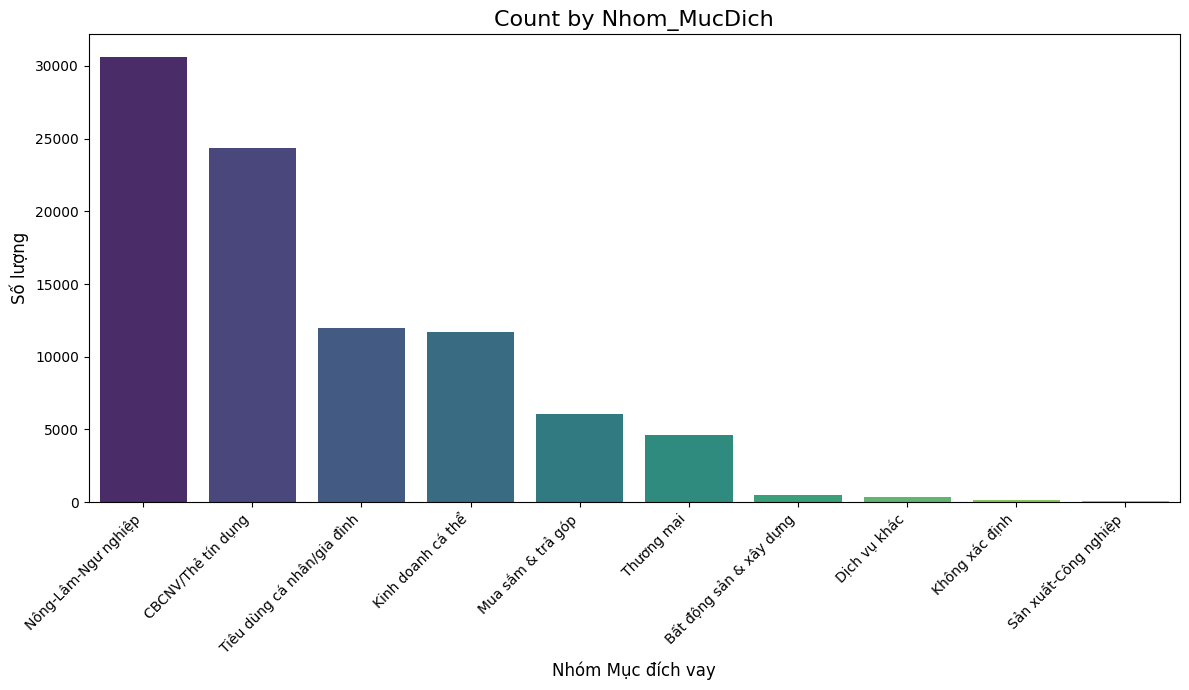

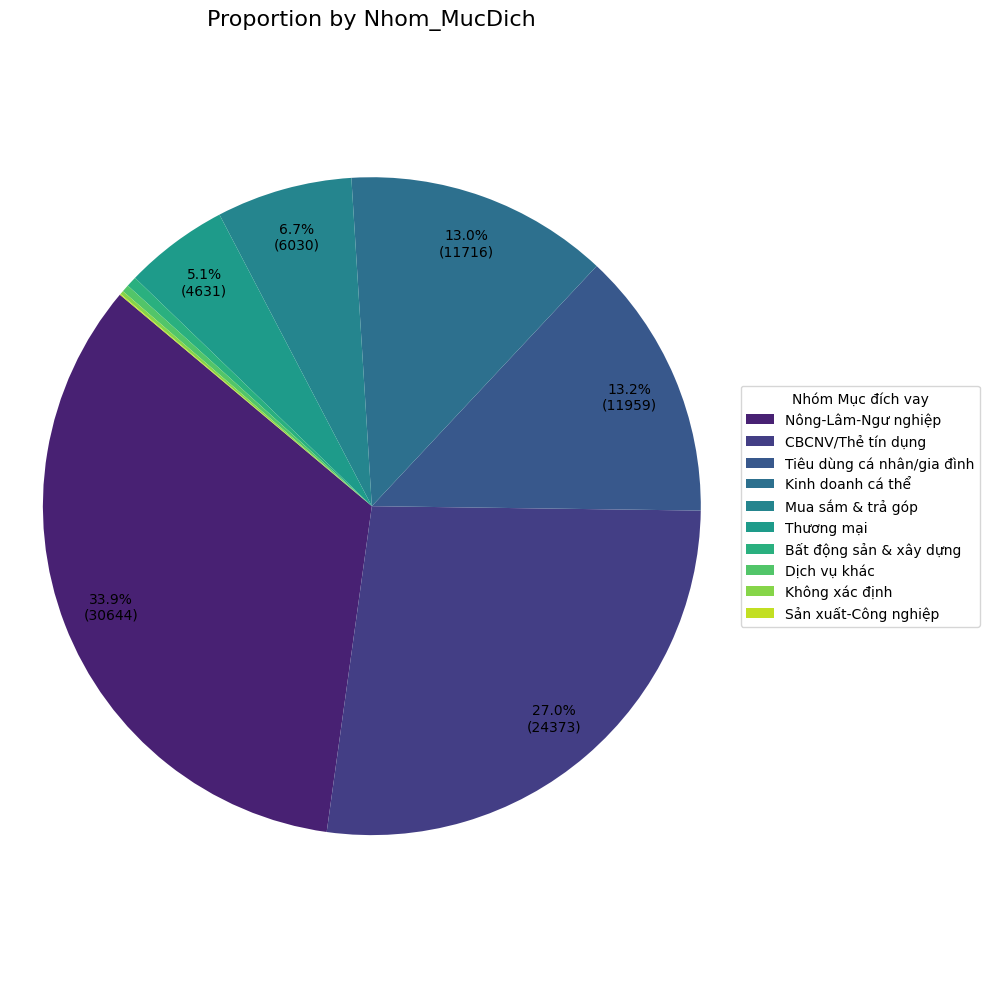

In [ ]:
#VISUALIZE
data = classify_mucdichvay(data, column_name='MUCDICHVAY', new_column='Nhom_MucDich')

# Get the value counts for the new grouped column
mucdichvay_counts = data['Nhom_MucDich'].value_counts()

# --- Countplot for Nhom_MucDich ---
plt.figure(figsize=(12, 7))
sns.countplot(x='Nhom_MucDich', data=data, palette='viridis', order=mucdichvay_counts.index)
plt.title('Count by Nhom_MucDich', fontsize=16)
plt.xlabel('Nhóm Mục đích vay', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# --- Pie chart for Nhom_MucDich ---
plt.figure(figsize=(10, 10))
colors = sns.color_palette('viridis', len(mucdichvay_counts))

# Define threshold for hiding labels (e.g., hide if less than 2%)
threshold_percent = 2

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        if pct > threshold_percent:
            return f'{pct:.1f}%\n({val})'
        else:
            return ''
    return my_format

plt.pie(mucdichvay_counts,
        labels=None,
        autopct=autopct_format(mucdichvay_counts),
        colors=colors,
        startangle=140,
        pctdistance=0.85)

#Pie chart

plt.title('Proportion by Nhom_MucDich', fontsize=16)

# Add a legend
plt.legend(mucdichvay_counts.index,
           title="Nhóm Mục đích vay",
           loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1))

plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()



## ORGNBR & ORGNAME (REGION) IS_MIEN_BAC IS_MIEN_TRUNG


In [ ]:


# Region list
mien_bac_codes = [27, 42, 63, 73, 79, 80, 83, 84, 85, 86, 87, 88]
mien_trung_codes = [4, 19, 20, 21, 64, 66, 67, 81, 89, 90, 94, 95, 98, 103, 108, 114, 115, 137, 138]
mien_nam_codes = [3, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 65, 68, 69, 70, 71, 72, 74, 75, 76, 77, 78, 91, 92, 93, 96, 97, 99, 100, 101, 102, 104, 105, 106, 107, 109, 110, 111, 112, 113, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136]

# Create a new 'REGION' column based on ORGNBR
def classify_region_simple(orgnbr):
    if orgnbr in mien_bac_codes:
        return 'Miền Bắc'
    elif orgnbr in mien_trung_codes:
        return 'Miền Trung'
    elif orgnbr in mien_nam_codes:
        return 'Miền Nam'
    else:
        return 'Không xác định'

# Apply the classification
data['REGION'] = data['ORGNBR'].apply(classify_region_simple)


REGION_ENCODED = pd.get_dummies(data['REGION'], prefix='REGION', drop_first=False)

# Display the first few rows of the encoded DataFrame
print("\nFirst 5 rows of the One-Hot Encoded 'REGION' variable:")
display(REGION_ENCODED.head())

# Display the columns created
print("\nNew columns created by one-hot encoding 'REGION':")
print(REGION_ENCODED.columns.tolist())

# Optional: Display the value counts of the new 'REGION' column to verify classification
print("\nValue counts for the classified 'REGION' column:")
print(data['REGION'].value_counts())


First 5 rows of the One-Hot Encoded 'REGION' variable:


,REGION_Không xác định,REGION_Miền Bắc,REGION_Miền Nam,REGION_Miền Trung
0,False,False,False,True
1,False,False,False,True
2,False,False,False,True
3,False,False,False,True
4,False,False,False,True



New columns created by one-hot encoding 'REGION':
['REGION_Không xác định', 'REGION_Miền Bắc', 'REGION_Miền Nam', 'REGION_Miền Trung']

Value counts for the classified 'REGION' column:
REGION
Miền Nam          70030
Miền Trung        12197
Miền Bắc           7538
Không xác định      579
Name: count, dtype: int64


/tmp/ipython-input-13-4039039811.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='REGION', data=data, palette='viridis', order=region_counts.index, ax=axes[0])


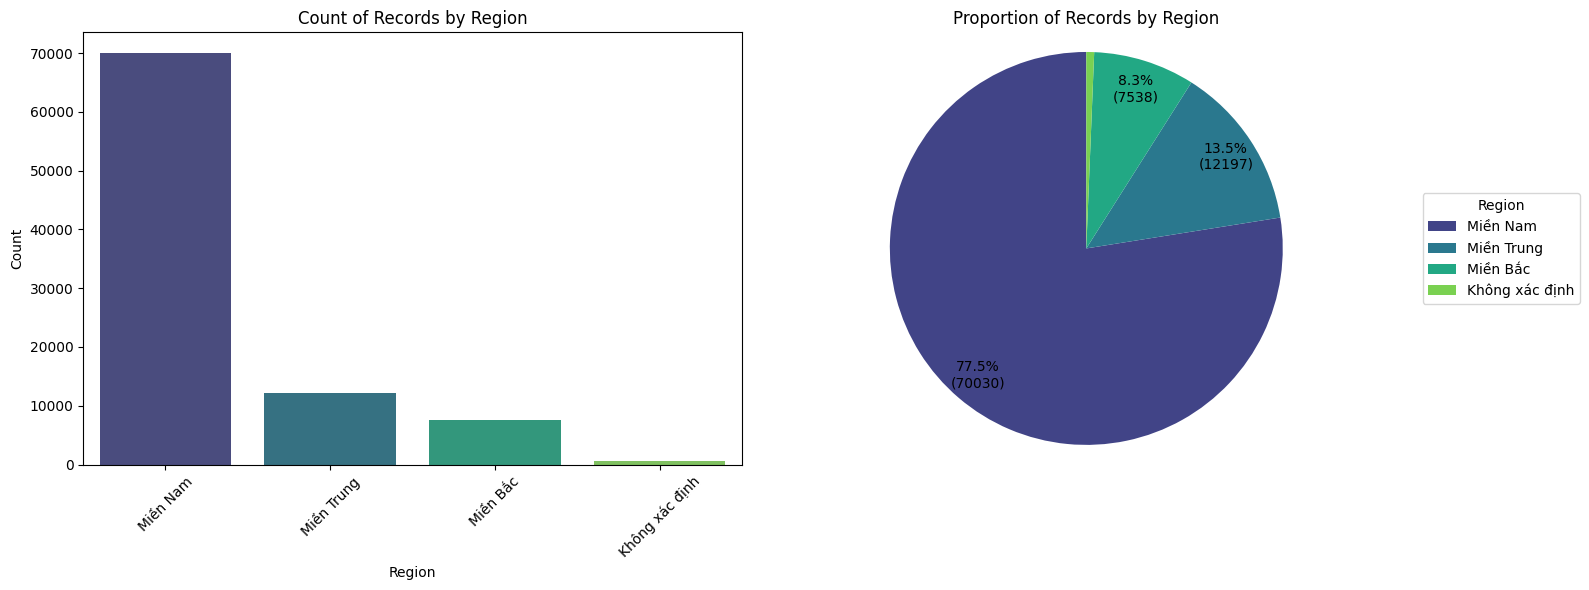

In [ ]:
# Ensure REGION column exists
if 'REGION' not in data.columns:
    data = create_region_dummies(data)

# Get value counts
region_counts = data['REGION'].value_counts()

# Set up subplot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

# --- Countplot on the left ---
sns.countplot(x='REGION', data=data, palette='viridis', order=region_counts.index, ax=axes[0])
axes[0].set_title('Count of Records by Region')
axes[0].set_xlabel('Region')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# --- Pie chart on the right ---
colors = sns.color_palette('viridis', len(region_counts))
threshold_percent = 2  # hide label if smaller than this

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{pct:.1f}%\n({val})' if pct > threshold_percent else ''
    return my_format

axes[1].pie(region_counts,
            labels=None,
            autopct=autopct_format(region_counts),
            colors=colors,
            startangle=90,
            pctdistance=0.85)

axes[1].set_title('Proportion of Records by Region')
axes[1].legend(region_counts.index, title="Region", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
axes[1].axis('equal')  # Make sure pie is a circle

plt.tight_layout()
plt.show()


## SEX (SEX_GROUP)

In [ ]:

# Define a mapping for the SEX values to the new groups
sex_mapping = {
    'ONG': 'Male',
    'MR': 'Male',
    'BA': 'Female',
    'MS': 'Female',
    'MRS': 'Female',
    np.nan: 'Business' # Map NaN (blanks) to 'Doanh Nghiệp'
}

# Create the new 'SEX_GROUP' column
data['SEX_GROUP'] = data['SEX'].map(sex_mapping).fillna('Doanh Nghiệp')

# Handle empty strings explicitly if they exist and should be 'Doanh Nghiệp'
data.loc[data['SEX'] == '', 'SEX_GROUP'] = 'Doanh Nghiệp'


# Display the value counts of the new column to verify the grouping
print("Value counts for the new column 'SEX_GROUP':")
print(data['SEX_GROUP'].value_counts(dropna=False)) # Include counts for NaNs if any

# Optional: Check some rows to verify the mapping
print("\nSample rows showing original SEX and new SEX_GROUP:")
print(data[['SEX', 'SEX_GROUP']].head())
print(data[['SEX', 'SEX_GROUP']].tail())




Value counts for the new column 'SEX_GROUP':
SEX_GROUP
Male        54118
Female      31896
Business     4330
Name: count, dtype: int64

Sample rows showing original SEX and new SEX_GROUP:
   SEX SEX_GROUP
0  ONG      Male
1  ONG      Male
2   MR      Male
3  NaN  Business
4   MR      Male
       SEX SEX_GROUP
90339  ONG      Male
90340   BA    Female
90341   BA    Female
90342  ONG      Male
90343   BA    Female


## ENCODING FEATURES


First 5 rows of the One-Hot Encoded 'LOAIKH' variable:


,LOAIKH_2
0,False
1,False
2,False
3,False
4,False



New columns created by one-hot encoding 'LOAIKH':
['LOAIKH_2']


/tmp/ipython-input-22-27878299.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='LOAIKH', data=data, palette='viridis')


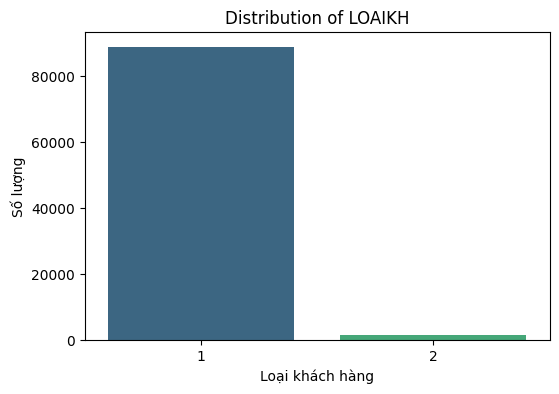


First 5 rows of the One-Hot Encoded 'CURRENCYCD' variable:


,CURRENCY_VND
0,True
1,True
2,True
3,True
4,True



New columns created by one-hot encoding 'CURRENCYCD':
['CURRENCY_VND']


/tmp/ipython-input-22-27878299.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CURRENCYCD', data=data, palette='viridis')


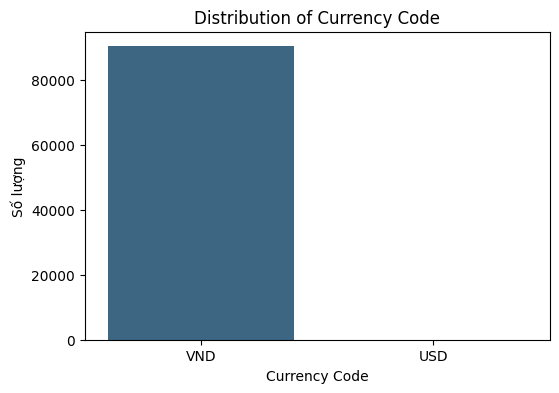


First 5 rows of the One-Hot Encoded 'MJACCTTYPCD' variable:


,MJACCTTYPCD_CNS,MJACCTTYPCD_MTG
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False



New columns created by one-hot encoding 'MJACCTTYPCD':
['MJACCTTYPCD_CNS', 'MJACCTTYPCD_MTG']


/tmp/ipython-input-22-27878299.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='MJACCTTYPCD', data=data, palette='viridis', order=data['MJACCTTYPCD'].value_counts().index)


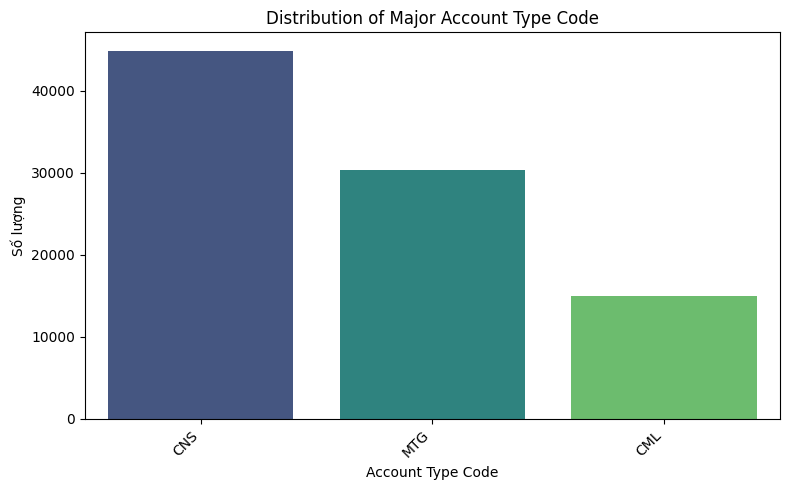


First 5 rows of the One-Hot Encoded 'PHUONGTHUCCHOVAY_GROUP' variable:


,PHUONGTHUCCHOVAY_GROUP_Co Cau No COVID,PHUONGTHUCCHOVAY_GROUP_No Qua Han,PHUONGTHUCCHOVAY_GROUP_Tai Cap Von,PHUONGTHUCCHOVAY_GROUP_Thau Chi,PHUONGTHUCCHOVAY_GROUP_The Tin Dung,PHUONGTHUCCHOVAY_GROUP_Vay MLF Dac Biet,PHUONGTHUCCHOVAY_GROUP_Vay The Chap,PHUONGTHUCCHOVAY_GROUP_Vay Tin Chap Tra Lai,PHUONGTHUCCHOVAY_GROUP_Vay Tra Gop
0,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,True



New columns created by one-hot encoding 'PHUONGTHUCCHOVAY_GROUP':
['PHUONGTHUCCHOVAY_GROUP_Co Cau No COVID', 'PHUONGTHUCCHOVAY_GROUP_No Qua Han', 'PHUONGTHUCCHOVAY_GROUP_Tai Cap Von', 'PHUONGTHUCCHOVAY_GROUP_Thau Chi', 'PHUONGTHUCCHOVAY_GROUP_The Tin Dung', 'PHUONGTHUCCHOVAY_GROUP_Vay MLF Dac Biet', 'PHUONGTHUCCHOVAY_GROUP_Vay The Chap', 'PHUONGTHUCCHOVAY_GROUP_Vay Tin Chap Tra Lai', 'PHUONGTHUCCHOVAY_GROUP_Vay Tra Gop']

First 5 rows of the One-Hot Encoded 'Nhom_MucDich' variable:


,MUC_DICH_VAY_GROUPED_Bất động sản & xây dựng,MUC_DICH_VAY_GROUPED_CBCNV/Thẻ tín dụng,MUC_DICH_VAY_GROUPED_Dịch vụ khác,MUC_DICH_VAY_GROUPED_Không xác định,MUC_DICH_VAY_GROUPED_Kinh doanh cá thể,MUC_DICH_VAY_GROUPED_Mua sắm & trả góp,MUC_DICH_VAY_GROUPED_Nông-Lâm-Ngư nghiệp,MUC_DICH_VAY_GROUPED_Sản xuất-Công nghiệp,MUC_DICH_VAY_GROUPED_Thương mại,MUC_DICH_VAY_GROUPED_Tiêu dùng cá nhân/gia đình
0,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,True



New columns created by one-hot encoding 'Nhom_MucDich':
['MUC_DICH_VAY_GROUPED_Bất động sản & xây dựng', 'MUC_DICH_VAY_GROUPED_CBCNV/Thẻ tín dụng', 'MUC_DICH_VAY_GROUPED_Dịch vụ khác', 'MUC_DICH_VAY_GROUPED_Không xác định', 'MUC_DICH_VAY_GROUPED_Kinh doanh cá thể', 'MUC_DICH_VAY_GROUPED_Mua sắm & trả góp', 'MUC_DICH_VAY_GROUPED_Nông-Lâm-Ngư nghiệp', 'MUC_DICH_VAY_GROUPED_Sản xuất-Công nghiệp', 'MUC_DICH_VAY_GROUPED_Thương mại', 'MUC_DICH_VAY_GROUPED_Tiêu dùng cá nhân/gia đình']

First 5 rows of the One-Hot Encoded 'REGION' variable:


,REGION_Không xác định,REGION_Miền Bắc,REGION_Miền Nam,REGION_Miền Trung
0,False,False,False,True
1,False,False,False,True
2,False,False,False,True
3,False,False,False,True
4,False,False,False,True



New columns created by one-hot encoding 'REGION':
['REGION_Không xác định', 'REGION_Miền Bắc', 'REGION_Miền Nam', 'REGION_Miền Trung']

Value counts for the classified 'REGION' column:
REGION
Miền Nam          70030
Miền Trung        12197
Miền Bắc           7538
Không xác định      579
Name: count, dtype: int64

First 5 rows of the One-Hot Encoded 'SEX_GROUP' variable:


,SEX_GROUP_Female,SEX_GROUP_Male
0,False,True
1,False,True
2,False,True
3,False,False
4,False,True


/tmp/ipython-input-22-27878299.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SEX_GROUP', data=data, palette='Set2', order=['Male', 'Female', 'Business'])


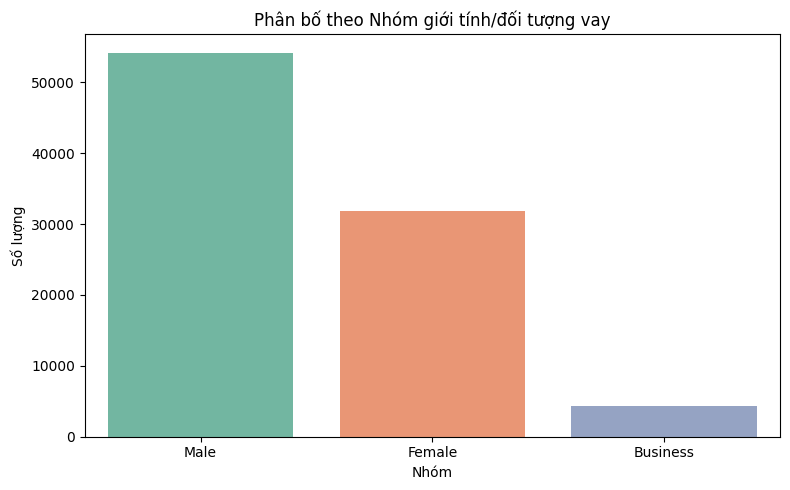

In [ ]:
# 1. LOAIKH
loaikh_encoded = pd.get_dummies(data['LOAIKH'], prefix='LOAIKH', drop_first=True)

# Display the first few rows of the encoded DataFrame
print("\nFirst 5 rows of the One-Hot Encoded 'LOAIKH' variable:")
display(loaikh_encoded.head())

# Display the columns created
print("\nNew columns created by one-hot encoding 'LOAIKH':")
print(loaikh_encoded.columns.tolist())

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.countplot(x='LOAIKH', data=data, palette='viridis')
plt.title('Distribution of LOAIKH')
plt.xlabel('Loại khách hàng')
plt.ylabel('Số lượng')
plt.show()
# 2. CURRENCYCD

currency_encoded = pd.get_dummies(data['CURRENCYCD'], prefix='CURRENCY', drop_first=True)

# Display the first few rows of the encoded DataFrame
print("\nFirst 5 rows of the One-Hot Encoded 'CURRENCYCD' variable:")
display(currency_encoded.head())

# Display the columns created
print("\nNew columns created by one-hot encoding 'CURRENCYCD':")
print(currency_encoded.columns.tolist())

plt.figure(figsize=(6, 4))
sns.countplot(x='CURRENCYCD', data=data, palette='viridis')
plt.title('Distribution of Currency Code')
plt.xlabel('Currency Code')
plt.ylabel('Số lượng')
plt.show()
 # 3. MJACCTTYPCD
mjaccttypcd_encoded = pd.get_dummies(data['MJACCTTYPCD'], prefix='MJACCTTYPCD', drop_first=True)

# Display the first few rows of the encoded DataFrame
print("\nFirst 5 rows of the One-Hot Encoded 'MJACCTTYPCD' variable:")
display(mjaccttypcd_encoded.head())

# Display the columns created
print("\nNew columns created by one-hot encoding 'MJACCTTYPCD':")
print(mjaccttypcd_encoded.columns.tolist())

plt.figure(figsize=(8, 5)) # Adjust figure size based on number of unique values
sns.countplot(x='MJACCTTYPCD', data=data, palette='viridis', order=data['MJACCTTYPCD'].value_counts().index)
plt.title('Distribution of Major Account Type Code')
plt.xlabel('Account Type Code')
plt.ylabel('Số lượng')
plt.xticks(rotation=45, ha='right') # Rotate labels if they overlap
plt.tight_layout()
plt.show()
# 4. PHUONG THUC CHO VAY

phuongthuc_encoded = pd.get_dummies(data['PHUONGTHUCCHOVAY_GROUP'], prefix='PHUONGTHUCCHOVAY_GROUP', drop_first=False)

# Display the first few rows of the encoded DataFrame
print("\nFirst 5 rows of the One-Hot Encoded 'PHUONGTHUCCHOVAY_GROUP' variable:")
display(phuongthuc_encoded.head())

# Display the columns created
print("\nNew columns created by one-hot encoding 'PHUONGTHUCCHOVAY_GROUP':")
print(phuongthuc_encoded.columns.tolist())

# 5. MUCDICHVAY
# Ensure the 'Nhom_MucDich' column exists by running the classification function first
data = classify_mucdichvay(data)

nhom_mucdich_encoded = pd.get_dummies(data['Nhom_MucDich'], prefix='MUC_DICH_VAY_GROUPED', drop_first=False)

# Display the first few rows of the encoded DataFrame
print("\nFirst 5 rows of the One-Hot Encoded 'Nhom_MucDich' variable:")
display(nhom_mucdich_encoded.head()) # Corrected variable name

# Display the columns created
print("\nNew columns created by one-hot encoding 'Nhom_MucDich':")
print(nhom_mucdich_encoded.columns.tolist()) # Corrected variable name

# 6 Region
REGION_ENCODED = pd.get_dummies(data['REGION'], prefix='REGION', drop_first=False)

# Display the first few rows of the encoded DataFrame
print("\nFirst 5 rows of the One-Hot Encoded 'REGION' variable:")
display(REGION_ENCODED.head())

# Display the columns created
print("\nNew columns created by one-hot encoding 'REGION':")
print(REGION_ENCODED.columns.tolist())

# Optional: Display the value counts of the new 'REGION' column to verify classification
print("\nValue counts for the classified 'REGION' column:")
print(data['REGION'].value_counts())


# 7  SEX_GROUP

sex_encoded = pd.get_dummies(data['SEX_GROUP'], prefix='SEX_GROUP', drop_first=True)

# Display the first few rows of the encoded DataFrame
print("\nFirst 5 rows of the One-Hot Encoded 'SEX_GROUP' variable:")
display(sex_encoded.head())

plt.figure(figsize=(8, 5))
sns.countplot(x='SEX_GROUP', data=data, palette='Set2', order=['Male', 'Female', 'Business'])
plt.title("Phân bố theo Nhóm giới tính/đối tượng vay")
plt.xlabel("Nhóm")
plt.ylabel("Số lượng")
plt.tight_layout()
plt.show()


# MODELING

## LOGISTIC + SMOTE


Training Logistic Regression Model with SMOTE (Multi-class)...
Training complete.
Logistic Regression with SMOTE (Multi-class) - Evaluation:

Accuracy: 0.6730371900826446

Classification Report:
               precision    recall  f1-score   support

           1       0.93      0.72      0.81     24085
           2       0.08      0.19      0.11      1126
           3       0.03      0.15      0.05       377
           4       0.05      0.13      0.07       396
           5       0.25      0.57      0.35      1120

    accuracy                           0.67     27104
   macro avg       0.27      0.35      0.28     27104
weighted avg       0.84      0.67      0.74     27104


Confusion Matrix:
 [[17282  2449  1813   926  1615]
 [  592   215   122    61   136]
 [  186    48    57    34    52]
 [  178    52    52    53    61]
 [  286    79    58    62   635]]


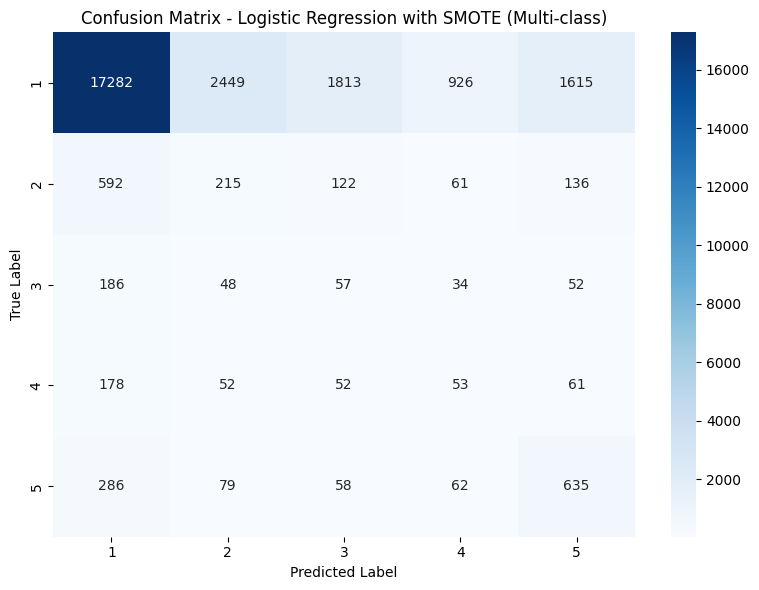

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.pipeline import Pipeline  # use imblearn's Pipeline, not sklearn
from imblearn.over_sampling import SMOTE
# from sklearn.pipeline import Pipeline # Use scikit-learn's Pipeline for standard steps
import pandas as pd

# Create a copy of the data
data_model = data.copy()

# Drop original categorical columns
data_model = data_model.drop(['LOAIKH', 'CURRENCYCD', 'MJACCTTYPCD', 'PHUONG THUC CHO VAY',
                              'MUCDICHVAY', 'Nhom_MucDich', 'ORGNBR', 'ORGNAME', 'PARENTORGNBR',
                              'PARENTORGNAME', 'REGION', 'SEX', 'SEX_GROUP',
                              'OPEN_DATE', 'NGAYDENHAN', 'DURATION_DAYS',
                              'ID_TIME', 'DESC_TIME', 'MJACCTTYPDESC', 'NHOMNO', # Drop original NHOMNO
                               'NHOMNO_TCBS', 'Rating_Binary'], # Drop Rating_Binary
                             axis=1, errors='ignore')

# Numerical features
numerical_features = ['BASE_BAL_log', 'CURR_BAL_log', 'DUNO_QD_log', 'LAISUAT', 'DURATION_MONTHS']

# Combine encoded and numeric features
data_model = pd.concat([data_model[numerical_features],
                        loaikh_encoded,
                        currency_encoded,
                        mjaccttypcd_encoded,
                        phuongthuc_encoded,
                        nhom_mucdich_encoded,
                        sex_encoded,
                        REGION_ENCODED,
                        data_model[['NHOMNOMOI']]], axis=1) # Use NHOMNOMOI as target

# Remove duplicate columns if any
data_model = data_model.loc[:, ~data_model.columns.duplicated()]

# Define X and y
X = data_model.drop('NHOMNOMOI', axis=1) # Drop NHOMNOMOI from features
y = data_model['NHOMNOMOI'] # Set NHOMNOMOI as target
X = X.fillna(0) # Fill NaNs in features

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y # Stratify by the multi-class target
)

# Create a pipeline with SMOTE and Logistic Regression
pipeline_logreg = Pipeline([
    ('smote', SMOTE(random_state=42, sampling_strategy='not majority')),  # SMOTE for multi-class
    ('logistic', LogisticRegression(
        solver='lbfgs',
        multi_class='multinomial',
        random_state=42,
        max_iter=1000
    ))
])

# Train the pipeline
print("Training Logistic Regression Model with SMOTE (Multi-class)...")
pipeline_logreg.fit(X_train, y_train)
print("Training complete.")

# Predict
y_pred = pipeline_logreg.predict(X_test)

# Evaluate
print("Logistic Regression with SMOTE (Multi-class) - Evaluation:")
print("\nAccuracy:", accuracy_score(y_test, y_pred))
# Use classification_report without zero_division for multi-class
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Feature coefficients (Interpretation is more complex for multi-class)
# logreg_model = pipeline_logreg.named_steps['logistic']
# coefficients = pd.DataFrame({
#     'Feature': X.columns,
#     'Coefficient': logreg_model.coef_[0] # This will only show coefficients for one class (class 0)
# })
# print("\nCoefficients (for class 0 vs rest):")
# print(coefficients.sort_values(by='Coefficient', ascending=False).head())

# Create the confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)
# Get unique class labels from the target variable
labels = sorted(y.unique())

plt.figure(figsize=(8, 6)) # Adjust size for multi-class matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix - Logistic Regression with SMOTE (Multi-class)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

## LOGISTIC + SMOTE + TOMEK LINK

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# from imblearn.pipeline import Pipeline  # use imblearn's Pipeline, not sklearn
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import TomekLinks # Import TomekLinks
# # from sklearn.pipeline import Pipeline # Use scikit-learn's Pipeline for standard steps
# import pandas as pd

# # Create a copy of the data
# data_model = data.copy()

# # Drop original categorical columns
# data_model = data_model.drop(['LOAIKH', 'CURRENCYCD', 'MJACCTTYPCD', 'PHUONG THUC CHO VAY',
#                               'MUCDICHVAY', 'Nhom_MucDich', 'ORGNBR', 'ORGNAME', 'PARENTORGNBR',
#                               'PARENTORGNAME', 'REGION', 'SEX', 'SEX_GROUP',
#                               'OPEN_DATE', 'NGAYDENHAN', 'DURATION_DAYS',
#                               'ID_TIME', 'DESC_TIME', 'MJACCTTYPDESC', 'NHOMNO', # Drop original NHOMNO
#                                'NHOMNO_TCBS', 'Rating_Binary'], # Drop Rating_Binary
#                              axis=1, errors='ignore')

# # Numerical features
# numerical_features = ['BASE_BAL_log', 'CURR_BAL_log', 'DUNO_QD_log', 'LAISUAT', 'DURATION_MONTHS']

# # Combine encoded and numeric features
# data_model = pd.concat([data_model[numerical_features],
#                         loaikh_encoded,
#                         currency_encoded,
#                         mjaccttypcd_encoded,
#                         phuongthuc_encoded,
#                         nhom_mucdich_encoded,
#                         sex_encoded,
#                         REGION_ENCODED,
#                         data_model[['NHOMNOMOI']]], axis=1) # Use NHOMNOMOI as target

# # Remove duplicate columns if any
# data_model = data_model.loc[:, ~data_model.columns.duplicated()]

# # Define X and y
# X = data_model.drop('NHOMNOMOI', axis=1) # Drop NHOMNOMOI from features
# y = data_model['NHOMNOMOI'] # Set NHOMNOMOI as target
# X = X.fillna(0) # Fill NaNs in features

# # Split the data
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.3, random_state=42, stratify=y # Stratify by the multi-class target
# )

# # Create a pipeline with SMOTE, TomekLinks, and Logistic Regression
# pipeline_logreg = Pipeline([
#     ('smote', SMOTE(random_state=42, sampling_strategy='not majority')),  # SMOTE for multi-class
#     ('tomek', TomekLinks()), # Add TomekLinks
#     ('logistic', LogisticRegression(
#         solver='lbfgs',
#         multi_class='multinomial',
#         random_state=42,
#         max_iter=1000
#     ))
# ])

# # Train the pipeline
# print("Training Logistic Regression Model with SMOTE + Tomek Links (Multi-class)...")
# pipeline_logreg.fit(X_train, y_train)
# print("Training complete.")

# # Predict
# y_pred = pipeline_logreg.predict(X_test)

# # Evaluate
# print("Logistic Regression with SMOTE + Tomek Links (Multi-class) - Evaluation:")
# print("\nAccuracy:", accuracy_score(y_test, y_pred))
# # Use classification_report without zero_division for multi-class
# print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))
# print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# # Feature coefficients (Interpretation is more complex for multi-class)
# # logreg_model = pipeline_logreg.named_steps['logistic']
# # coefficients = pd.DataFrame({
# #     'Feature': X.columns,
# #     'Coefficient': logreg_model.coef_[0] # This will only show coefficients for one class (class 0)
# # })
# # print("\nCoefficients (for class 0 vs rest):")
# # print(coefficients.sort_values(by='Coefficient', ascending=False).head())

# # Create the confusion matrix heatmap
# cm = confusion_matrix(y_test, y_pred)
# # Get unique class labels from the target variable
# labels = sorted(y.unique())

# plt.figure(figsize=(8, 6)) # Adjust size for multi-class matrix
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
# plt.title('Confusion Matrix - Logistic Regression with SMOTE + Tomek Links (Multi-class)')
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.tight_layout()
# plt.show()

## DECISION TREE

### NORMAL (SMOTE)

Training Decision Tree Model with SMOTE (Multi-class)...
Training complete.

Decision Tree Model Evaluation with SMOTE (Multi-class):

Accuracy: 0.7770439787485242

Classification Report:
               precision    recall  f1-score   support

           1       0.94      0.83      0.88     24085
           2       0.07      0.15      0.09      1126
           3       0.03      0.08      0.04       377
           4       0.07      0.18      0.10       396
           5       0.62      0.66      0.64      1120

    accuracy                           0.78     27104
   macro avg       0.34      0.38      0.35     27104
weighted avg       0.86      0.78      0.82     27104


Confusion Matrix:
 [[20051  2055   835   811   333]
 [  765   167    77    63    54]
 [  232    53    31    31    30]
 [  196    53    40    70    37]
 [  174    74    46    84   742]]

Feature Importances (Decision Tree):
              Feature  Importance
3             LAISUAT    0.222041
0        BASE_BAL_log    0.221

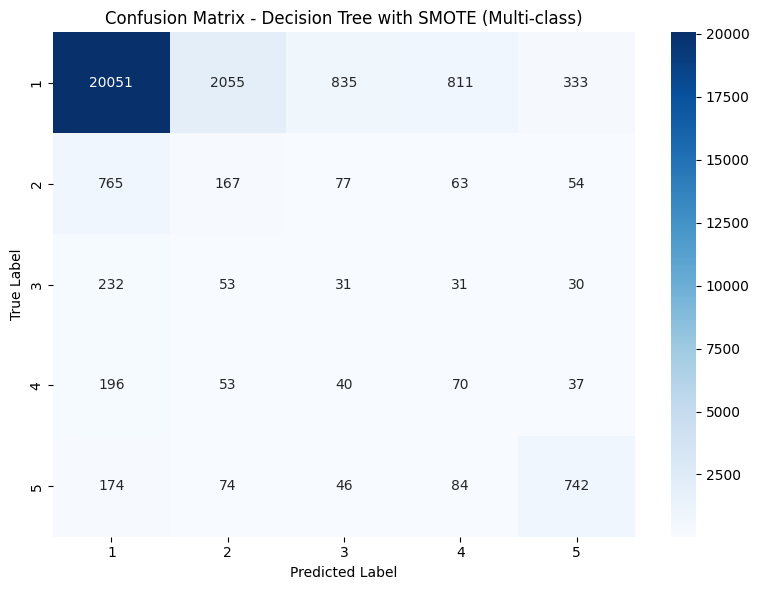

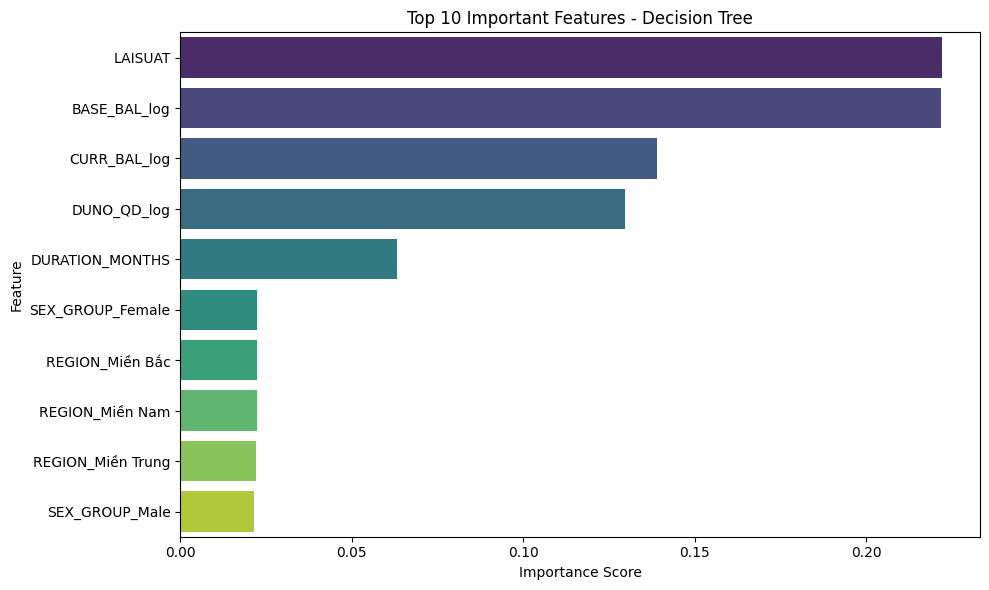

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline # Use imblearn's Pipeline
from sklearn.preprocessing import StandardScaler # Keep StandardScaler in case we compare with models sensitive to scale

# Assume 'data' is the main DataFrame and encoded Dataframes are already prepared
# Combine numerical and encoded categorical features
data_model = data.copy()

# Drop original categorical columns that have been encoded
data_model = data_model.drop(['LOAIKH', 'CURRENCYCD', 'MJACCTTYPCD', 'PHUONG THUC CHO VAY',
                              'MUCDICHVAY', 'Nhom_MucDich', 'ORGNBR', 'ORGNAME', 'PARENTORGNBR',
                              'PARENTORGNAME', 'REGION', 'SEX', 'SEX_GROUP',
                              'OPEN_DATE', 'NGAYDENHAN', 'DURATION_DAYS',
                              'ID_TIME', 'DESC_TIME', 'MJACCTTYPDESC', 'NHOMNO', # Drop original NHOMNO
                               'NHOMNO_TCBS', 'Rating_Binary'], # Drop Rating_Binary
                             axis=1, errors='ignore')

numerical_features = [ 'BASE_BAL_log', 'CURR_BAL_log', 'DUNO_QD_log', 'LAISUAT', 'DURATION_MONTHS'] #LOG
# List of encoded dataframes
# Ensure encoded dataframes match the training data setup
loaikh_encoded = pd.get_dummies(data['LOAIKH'], prefix='LOAIKH', drop_first=True) # Recreate to ensure consistency
currency_encoded = pd.get_dummies(data['CURRENCYCD'], prefix='CURRENCY', drop_first=True) # Recreate
mjaccttypcd_encoded = pd.get_dummies(data['MJACCTTYPCD'], prefix='MJACCTTYPCD', drop_first=True) # Recreate
phuongthuc_encoded = pd.get_dummies(data['PHUONGTHUCCHOVAY_GROUP'], prefix='PHUONGTHUCCHOVAY_GROUP', drop_first=False) # Recreate
nhom_mucdich_encoded = pd.get_dummies(data['Nhom_MucDich'], prefix='MUC_DICH_VAY_GROUPED', drop_first=False) # Recreate
sex_encoded = pd.get_dummies(data['SEX_GROUP'], prefix='SEX_GROUP', drop_first=True) # Recreate
REGION_ENCODED = pd.get_dummies(data['REGION'], prefix='REGION', drop_first=False) # Recreate


data_model = pd.concat([data_model[numerical_features],
                        loaikh_encoded,
                        currency_encoded,
                        mjaccttypcd_encoded,
                        phuongthuc_encoded,
                       nhom_mucdich_encoded,
                        sex_encoded,
                        REGION_ENCODED,
                        data_model[['NHOMNOMOI']]], # Use NHOMNOMOI as target
                       axis=1)

# Remove duplicate columns
data_model = data_model.loc[:, ~data_model.columns.duplicated()]

# Define features (X) and target (y)
feature_columns = [col for col in data_model.columns if col != 'NHOMNOMOI'] # Drop NHOMNOMOI
X = data_model[feature_columns]
y = data_model['NHOMNOMOI'] # Set NHOMNOMOI as target

# Handle NaN values by filling with median for numerical features
X[numerical_features] = X[numerical_features].fillna(X[numerical_features].median())
# Fill NaN for encoded (categorical) features with 0
encoded_features = [col for col in feature_columns if col not in numerical_features]
X[encoded_features] = X[encoded_features].fillna(0)


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y) # Stratify by the multi-class target

# Create a pipeline with SMOTE and Decision Tree Classifier
pipeline_dt = Pipeline([
    ('smote', SMOTE(random_state=42, sampling_strategy='not majority')),  # SMOTE for multi-class
    ('decision_tree', DecisionTreeClassifier(random_state=42)) # Decision Tree model
])


# Train the Decision Tree model
print("Training Decision Tree Model with SMOTE (Multi-class)...")
pipeline_dt.fit(X_train, y_train) # Train the pipeline
print("Training complete.")

# Make predictions on the test set
y_pred_dt = pipeline_dt.predict(X_test)
# y_pred_proba_dt = decision_tree_model.predict_proba(X_test)[:, 1] # AUC is for binary classification

# Evaluate the Decision Tree model
print("\nDecision Tree Model Evaluation with SMOTE (Multi-class):")
print("\nAccuracy:", accuracy_score(y_test, y_pred_dt))
# Use classification_report without zero_division for multi-class
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, zero_division=0))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
# print("\nAUC on Test Set:", roc_auc_score(y_test, y_pred_proba_dt)) # AUC not directly applicable for multi-class like this

# Optional: Display feature importances (Decision Trees have feature importances)
print("\nFeature Importances (Decision Tree):")
# Access the decision tree model from the pipeline
decision_tree_model_trained = pipeline_dt.named_steps['decision_tree']
feature_importances_dt = pd.DataFrame({'Feature': X.columns, 'Importance': decision_tree_model_trained.feature_importances_})
print(feature_importances_dt.sort_values('Importance', ascending=False).head(10)) # Display top 10


# Create the confusion matrix heatmap
cm_dt = confusion_matrix(y_test, y_pred_dt)
# Get unique class labels from the target variable
labels_dt = sorted(y.unique())

plt.figure(figsize=(8, 6)) # Adjust size for multi-class matrix
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=labels_dt, yticklabels=labels_dt)
plt.title('Confusion Matrix - Decision Tree with SMOTE (Multi-class)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()
# feature importance
top_features = feature_importances_dt.sort_values('Importance', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_features, x='Importance', y='Feature', palette='viridis')
plt.title('Top 10 Important Features - Decision Tree')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## RANDOM FORREST (SMOTE)

Training Random Forest Model with SMOTE (Multi-class)...
Training complete.

Random Forest Model Evaluation with SMOTE (Multi-class):

Accuracy: 0.7849763872491146

Classification Report:
               precision    recall  f1-score   support

           1       0.93      0.84      0.89     24085
           2       0.07      0.13      0.09      1126
           3       0.03      0.07      0.04       377
           4       0.06      0.17      0.09       396
           5       0.62      0.64      0.63      1120

    accuracy                           0.78     27104
   macro avg       0.34      0.37      0.35     27104
weighted avg       0.86      0.78      0.82     27104


Confusion Matrix:
 [[20312  1841   823   796   313]
 [  763   149    79    79    56]
 [  241    47    27    30    32]
 [  204    48    30    67    47]
 [  232    56    43    68   721]]

Feature Importances (Random Forest):
                              Feature  Importance
0                        BASE_BAL_log    0.20375

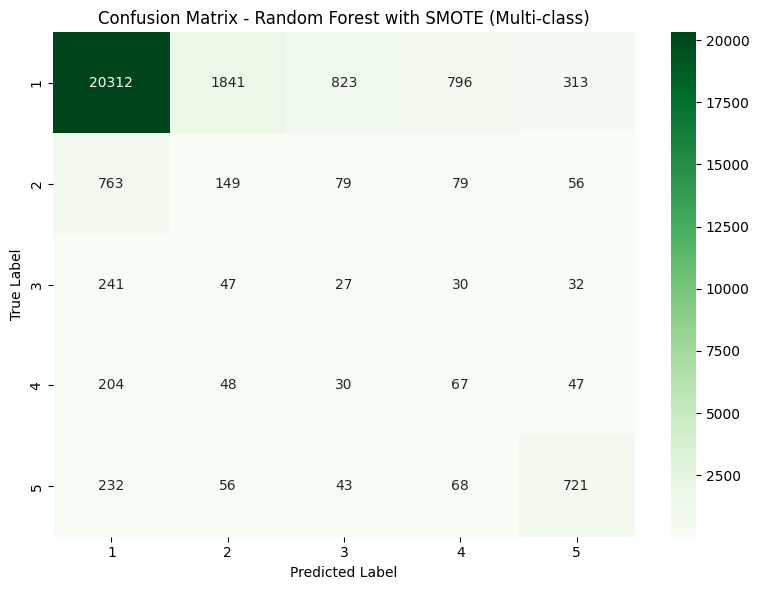

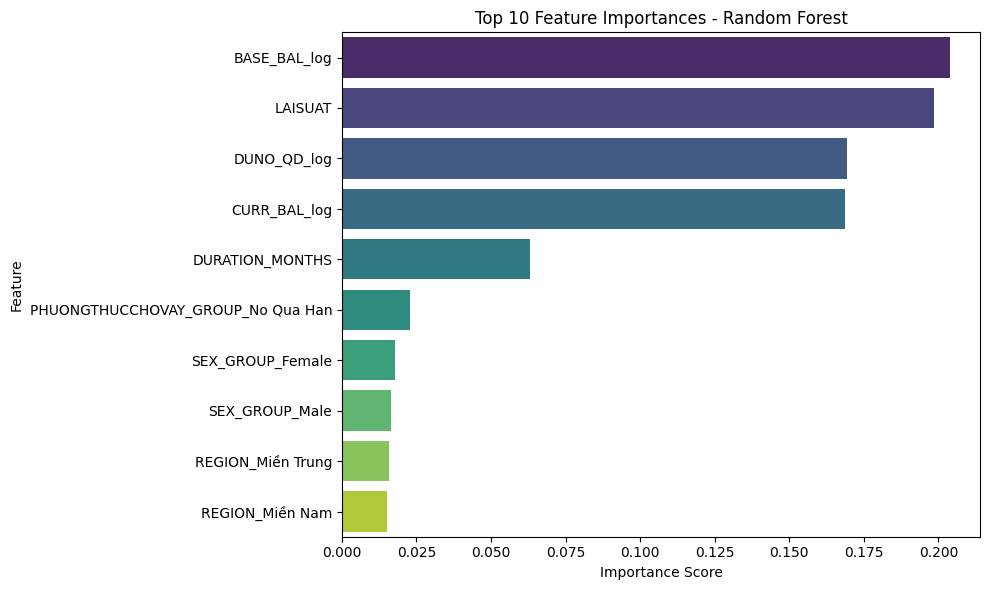

In [ ]:
from sklearn.ensemble import RandomForestClassifier # Import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE # Import SMOTE
from imblearn.pipeline import Pipeline # Use imblearn's Pipeline
# from sklearn.pipeline import Pipeline # Use scikit-learn's Pipeline for standard steps


# Assume 'data' is the main DataFrame and encoded Dataframes are already prepared
data_model = data.copy()

# Drop original categorical columns that have been encoded
data_model = data_model.drop(['LOAIKH', 'CURRENCYCD', 'MJACCTTYPCD', 'PHUONG THUC CHO VAY',
                              'MUCDICHVAY', 'Nhom_MucDich', 'ORGNBR', 'ORGNAME', 'PARENTORGNBR',
                              'PARENTORGNAME', 'REGION', 'SEX', 'SEX_GROUP',
                              'OPEN_DATE', 'NGAYDENHAN', 'DURATION_DAYS',
                              'ID_TIME', 'DESC_TIME', 'MJACCTTYPDESC', 'NHOMNO', # Drop original NHOMNO
                               'NHOMNO_TCBS', 'Rating_Binary'], # Drop Rating_Binary
                             axis=1, errors='ignore')


numerical_features = [ 'BASE_BAL_log', 'CURR_BAL_log', 'DUNO_QD_log', 'LAISUAT', 'DURATION_MONTHS'] #LOG
# List of encoded dataframes
# Ensure encoded dataframes match the training data setup
loaikh_encoded = pd.get_dummies(data['LOAIKH'], prefix='LOAIKH', drop_first=True) # Recreate to ensure consistency
currency_encoded = pd.get_dummies(data['CURRENCYCD'], prefix='CURRENCY', drop_first=True) # Recreate
mjaccttypcd_encoded = pd.get_dummies(data['MJACCTTYPCD'], prefix='MJACCTTYPCD', drop_first=True) # Recreate
phuongthuc_encoded = pd.get_dummies(data['PHUONGTHUCCHOVAY_GROUP'], prefix='PHUONGTHUCCHOVAY_GROUP', drop_first=False) # Recreate
nhom_mucdich_encoded = pd.get_dummies(data['Nhom_MucDich'], prefix='MUC_DICH_VAY_GROUPED', drop_first=False) # Recreate
sex_encoded = pd.get_dummies(data['SEX_GROUP'], prefix='SEX_GROUP', drop_first=True) # Recreate
REGION_ENCODED = pd.get_dummies(data['REGION'], prefix='REGION', drop_first=False) # Recreate


data_model = pd.concat([data_model[numerical_features],
                        loaikh_encoded,
                        currency_encoded,
                        mjaccttypcd_encoded,
                        phuongthuc_encoded,
                       nhom_mucdich_encoded,
                        sex_encoded,
                        REGION_ENCODED,
                        data_model[['NHOMNOMOI']]], # Use NHOMNOMOI as target
                       axis=1)

# Remove duplicate columns
data_model = data_model.loc[:, ~data_model.columns.duplicated()]

# Define features (X) and target (y)
feature_columns = [col for col in data_model.columns if col != 'NHOMNOMOI'] # Drop NHOMNOMOI
X = data_model[feature_columns]
y = data_model['NHOMNOMOI'] # Set NHOMNOMOI as target

# Handle NaN values by filling with median for numerical features
X[numerical_features] = X[numerical_features].fillna(X[numerical_features].median())
# Fill NaN for encoded (categorical) features with 0
encoded_features = [col for col in feature_columns if col not in numerical_features]
X[encoded_features] = X[encoded_features].fillna(0)


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y) # Stratify by the multi-class target

# Create a pipeline with SMOTE and Random Forest Classifier
pipeline_rf = Pipeline([
    ('smote', SMOTE(random_state=42, sampling_strategy='not majority')),  # SMOTE for multi-class
    ('random_forest', RandomForestClassifier(random_state=42)) # Random Forest model
])


# Train the Random Forest model
print("Training Random Forest Model with SMOTE (Multi-class)...")
pipeline_rf.fit(X_train, y_train) # Train the pipeline
print("Training complete.")


# Make predictions on the test set
y_pred_rf = pipeline_rf.predict(X_test)
# y_pred_proba_rf = random_forest_model.predict_proba(X_test)[:, 1] # AUC is for binary classification


# Evaluate the Random Forest model
print("\nRandom Forest Model Evaluation with SMOTE (Multi-class):")
print("\nAccuracy:", accuracy_score(y_test, y_pred_rf))
# Use classification_report without zero_division for multi-class
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf, zero_division=0))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
# print("\nAUC on Test Set:", roc_auc_score(y_test, y_pred_proba_rf)) # AUC not directly applicable for multi-class like this


# Optional: Display feature importances (Random Forests also have feature importances)
print("\nFeature Importances (Random Forest):")
# Access the random forest model from the pipeline
random_forest_model_trained = pipeline_rf.named_steps['random_forest']
feature_importances_rf = pd.DataFrame({'Feature': X.columns, 'Importance': random_forest_model_trained.feature_importances_})
print(feature_importances_rf.sort_values('Importance', ascending=False).head(10)) # Display top 10


# Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
labels_rf = sorted(y.unique())

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=labels_rf, yticklabels=labels_rf)
plt.title('Confusion Matrix - Random Forest with SMOTE (Multi-class)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# Top 10 feature importances
top_features_rf = feature_importances_rf.sort_values(by="Importance", ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_features_rf, x='Importance', y='Feature', palette='viridis')
plt.title('Top 10 Feature Importances - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## LIGHTGBM

In [ ]:
!pip install lightgbm

Training LightGBM Model with SMOTE (Multi-class)...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.116480 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1277
[LightGBM] [Info] Number of data points in the train set: 280975, number of used features: 34
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
Training complete.

LightGBM Model Evaluation with SMOTE (Multi-class):
Accuracy: 0.7873007674144038

Classification Report:
               precision    recall  f1-score   support

           1       0.94      0.84      0.89     24085
         

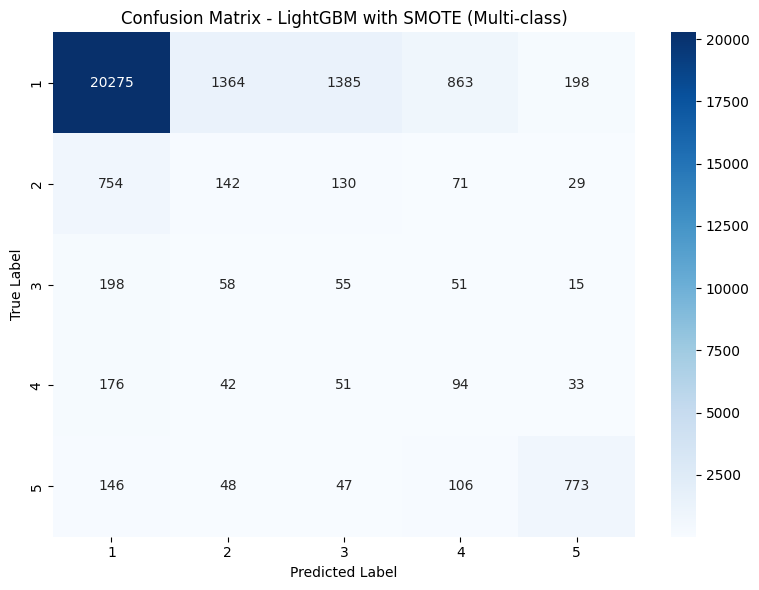

In [ ]:
import lightgbm as lgb
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Giả sử bạn đã có X và y đầy đủ
# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Pipeline: SMOTE + LightGBM (multi-class)
pipeline_lgbm = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('lgbm', lgb.LGBMClassifier(
        objective='multiclass',
        num_class=len(y.unique()),
        class_weight='balanced',      # hỗ trợ dữ liệu lệch lớp
        random_state=42,
        n_estimators=100,
        learning_rate=0.1,
        max_depth=10,
        n_jobs=-1                     # Dùng hết lõi CPU
    ))
])

# Train
print("Training LightGBM Model with SMOTE (Multi-class)...")
pipeline_lgbm.fit(X_train, y_train)
print("Training complete.")

# Predict
y_pred = pipeline_lgbm.predict(X_test)

# Evaluation
print("\nLightGBM Model Evaluation with SMOTE (Multi-class):")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


# Trích mô hình lightgbm ra từ pipeline
lgbm_model = pipeline_lgbm.named_steps['lgbm']

import pandas as pd
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': lgbm_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nTop 10 Feature Importances (LightGBM):")
print(feature_importance.head(10))

# Create the confusion matrix heatmap
cm_lgbm = confusion_matrix(y_test, y_pred)
# Get unique class labels from the target variable
labels_lgbm = sorted(y.unique())

plt.figure(figsize=(8, 6)) # Adjust size for multi-class matrix
sns.heatmap(cm_lgbm, annot=True, fmt='d', cmap='Blues', xticklabels=labels_lgbm, yticklabels=labels_lgbm)
plt.title('Confusion Matrix - LightGBM with SMOTE (Multi-class)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

## LIGHTGBM + SMOTE

Performing 5-fold Cross-Validation for LightGBM with SMOTE...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  6.8min finished


Cross-validation complete.

Cross-Validation Results:
  test_accuracy: 0.7690 (+/- 0.0780)
  train_accuracy: 0.8094 (+/- 0.0214)
  test_f1_macro: 0.3502 (+/- 0.0261)
  train_f1_macro: 0.4357 (+/- 0.0132)
  test_balanced_accuracy: 0.3815 (+/- 0.0330)
  train_balanced_accuracy: 0.5103 (+/- 0.0129)
  test_recall_macro: nan (+/- nan)
  train_recall_macro: nan (+/- nan)

Retraining on full training set and evaluating on original test set:
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.291688 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1277
[LightGBM] [Info] Number of data points in the train set: 280975, number of used features: 34
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] St

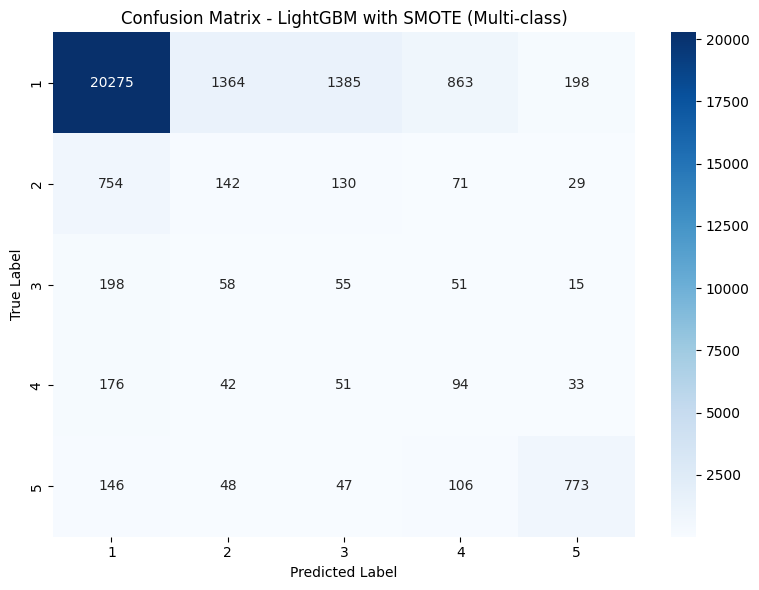

In [ ]:
import lightgbm as lgb
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_validate # Import cross_validate
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, make_scorer, f1_score, balanced_accuracy_score # Import necessary metrics and make_scorer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Import numpy for mean/std

# Giả sử bạn đã có X và y đầy đủ (X and y are assumed to be preprocessed and defined)

# Pipeline: SMOTE + LightGBM (multi-class)
pipeline_lgbm = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('lgbm', lgb.LGBMClassifier(
        objective='multiclass',
        num_class=len(y.unique()),
        class_weight='balanced',      # hỗ trợ dữ liệu lệch lớp
        random_state=42,
        n_estimators=100,
        learning_rate=0.1,
        max_depth=10,
        n_jobs=-1                     # Dùng hết lõi CPU
    ))
])

# Define scoring metrics for cross-validation, focusing on imbalanced multi-class
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1_macro': make_scorer(f1_score, average='macro', zero_division=0), # Macro F1-score
    'balanced_accuracy': make_scorer(balanced_accuracy_score), # Balanced Accuracy
    'recall_macro': make_scorer(classification_report, output_dict=True, zero_division=0) # More detailed report
}


# Perform k-fold cross-validation (e.g., 5 folds)
print("Performing 5-fold Cross-Validation for LightGBM with SMOTE...")
cv_results = cross_validate(
    pipeline_lgbm,
    X,
    y,
    cv=5, # Number of folds
    scoring=scoring,
    n_jobs=-1, # Use all available cores
    verbose=2,
    return_train_score=True # Return training scores as well
)

print("Cross-validation complete.")

# Print cross-validation results
print("\nCross-Validation Results:")
for metric_name in cv_results.keys():
    if 'test_' in metric_name or 'train_' in metric_name:
        print(f"  {metric_name}: {np.mean(cv_results[metric_name]):.4f} (+/- {np.std(cv_results[metric_name]):.4f})")

# Note: Confusion matrix and classification report per fold would require manual loop
# or a custom cross-validation function if needed for detailed analysis per fold.
# The average metrics provide a good overall picture.

# Optional: Retrain on full dataset and evaluate on original test set for final metrics
# (This is what the code did before adding CV, you can keep it or remove if CV is sufficient)
print("\nRetraining on full training set and evaluating on original test set:")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
pipeline_lgbm.fit(X_train, y_train)
y_pred = pipeline_lgbm.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))
cm_lgbm = confusion_matrix(y_test, y_pred)
labels_lgbm = sorted(y.unique())
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lgbm, annot=True, fmt='d', cmap='Blues', xticklabels=labels_lgbm, yticklabels=labels_lgbm)
plt.title('Confusion Matrix - LightGBM with SMOTE (Multi-class)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

## NEURAL NETWORK

Training Neural Network Model with SMOTE...
Epoch 1/50
7025/7025 ━━━━━━━━━━━━━━━━━━━━ 33s 4ms/step - accuracy: 0.3275 - loss: 1.3848 - val_accuracy: 0.3016 - val_loss: 2.7853
Epoch 2/50
7025/7025 ━━━━━━━━━━━━━━━━━━━━ 33s 5ms/step - accuracy: 0.3796 - loss: 1.3002 - val_accuracy: 0.3153 - val_loss: 2.7470
Epoch 3/50
7025/7025 ━━━━━━━━━━━━━━━━━━━━ 34s 5ms/step - accuracy: 0.3959 - loss: 1.2786 - val_accuracy: 0.3483 - val_loss: 2.5870
Epoch 4/50
7025/7025 ━━━━━━━━━━━━━━━━━━━━ 34s 5ms/step - accuracy: 0.4032 - loss: 1.2643 - val_accuracy: 0.3047 - val_loss: 2.6336
Epoch 5/50
7025/7025 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - accuracy: 0.4110 - loss: 1.2526 - val_accuracy: 0.3039 - val_loss: 2.7098
Epoch 6/50
7025/7025 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - accuracy: 0.4135 - loss: 1.2478 - val_accuracy: 0.3011 - val_loss: 2.6871
Epoch 7/50
7025/7025 ━━━━━━━━━━━━━━━━━━━━ 42s 5ms/step - accuracy: 0.4188 - loss: 1.2409 - val_accuracy: 0.3277 - val_loss: 2.6544
Epoch 8/50
7025/7025 ━━━━━━━━━━━━━━━━━━

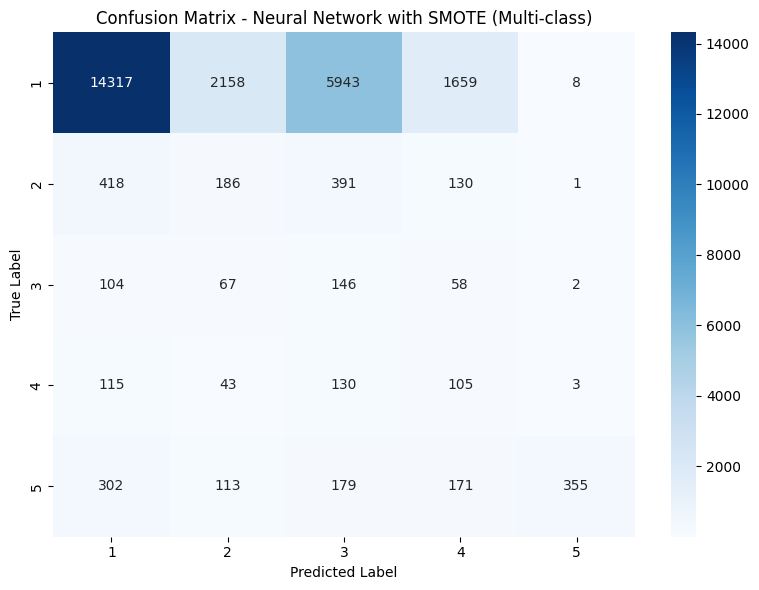

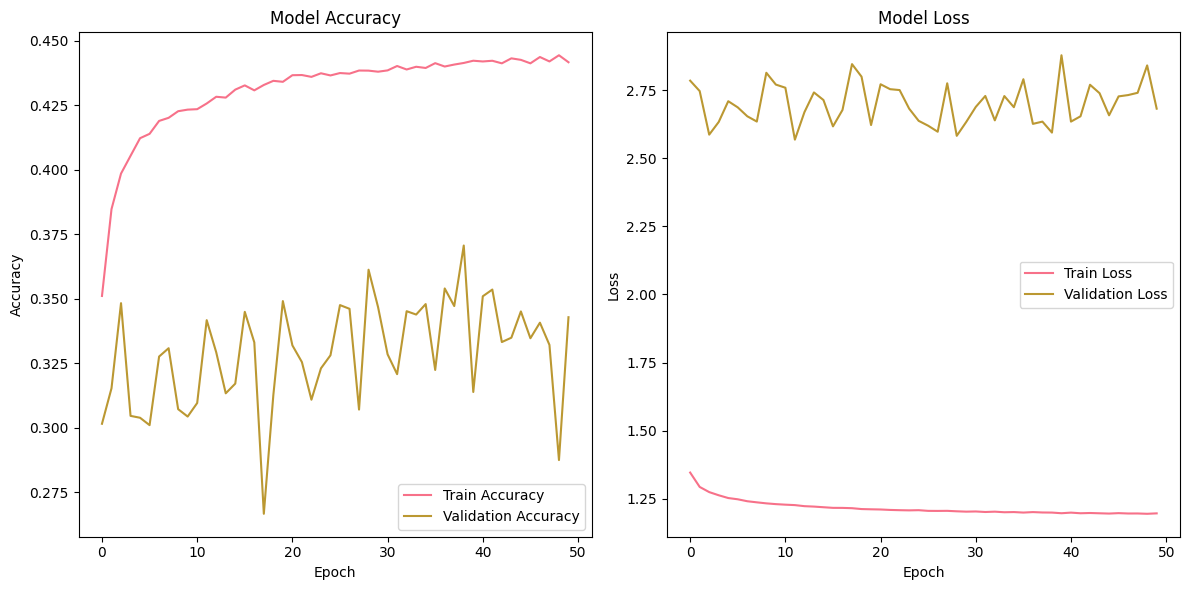

In [ ]:
# prompt: now train the data with a normal neural network model

# NEURAL NETWORK
!pip install tensorflow
!pip install keras

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline # Use Imblearn's Pipeline for SMOTE
from sklearn.pipeline import Pipeline as SkPipeline # Use Sklearn's Pipeline for Scaler
import numpy as np

# Assume 'data' is the main DataFrame and encoded Dataframes are already prepared
# Ensure data_model, X, and y are prepared as in previous modeling steps

# Create a copy of the data
data_model = data.copy()

# Drop original categorical columns that have been encoded
data_model = data_model.drop(['LOAIKH', 'CURRENCYCD', 'MJACCTTYPCD', 'PHUONG THUC CHO VAY',
                              'MUCDICHVAY', 'Nhom_MucDich', 'ORGNBR', 'ORGNAME', 'PARENTORGNBR',
                              'PARENTORGNAME', 'REGION', 'SEX', 'SEX_GROUP',
                              'OPEN_DATE', 'NGAYDENHAN', 'DURATION_DAYS',
                              'ID_TIME', 'DESC_TIME', 'MJACCTTYPDESC', 'NHOMNO', # Drop original NHOMNO
                               'NHOMNO_TCBS', 'Rating_Binary'], # Drop Rating_Binary
                             axis=1, errors='ignore')


numerical_features = [ 'BASE_BAL_log', 'CURR_BAL_log', 'DUNO_QD_log', 'LAISUAT', 'DURATION_MONTHS'] #LOG
# List of encoded dataframes
# Ensure encoded dataframes match the training data setup
loaikh_encoded = pd.get_dummies(data['LOAIKH'], prefix='LOAIKH', drop_first=True) # Recreate to ensure consistency
currency_encoded = pd.get_dummies(data['CURRENCYCD'], prefix='CURRENCY', drop_first=True) # Recreate
mjaccttypcd_encoded = pd.get_dummies(data['MJACCTTYPCD'], prefix='MJACCTTYPCD', drop_first=True) # Recreate
phuongthuc_encoded = pd.get_dummies(data['PHUONGTHUCCHOVAY_GROUP'], prefix='PHUONGTHUCCHOVAY_GROUP', drop_first=False) # Recreate
nhom_mucdich_encoded = pd.get_dummies(data['Nhom_MucDich'], prefix='MUC_DICH_VAY_GROUPED', drop_first=False) # Recreate
sex_encoded = pd.get_dummies(data['SEX_GROUP'], prefix='SEX_GROUP', drop_first=True) # Recreate
REGION_ENCODED = pd.get_dummies(data['REGION'], prefix='REGION', drop_first=False) # Recreate


data_model = pd.concat([data_model[numerical_features],
                        loaikh_encoded,
                        currency_encoded,
                        mjaccttypcd_encoded,
                        phuongthuc_encoded,
                       nhom_mucdich_encoded,
                        sex_encoded,
                        REGION_ENCODED,
                        data_model[['NHOMNOMOI']]], # Use NHOMNOMOI as target
                       axis=1)

# Remove duplicate columns
data_model = data_model.loc[:, ~data_model.columns.duplicated()]

# Define features (X) and target (y)
feature_columns = [col for col in data_model.columns if col != 'NHOMNOMOI'] # Drop NHOMNOMOI
X = data_model[feature_columns]
y = data_model['NHOMNOMOI'] # Set NHOMNOMOI as target

# Handle NaN values by filling with median for numerical features
X[numerical_features] = X[numerical_features].fillna(X[numerical_features].median())
# Fill NaN for encoded (categorical) features with 0
encoded_features = [col for col in feature_columns if col not in numerical_features]
X[encoded_features] = X[encoded_features].fillna(0)


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y) # Stratify by the multi-class target


# --- Neural Network Specific Preprocessing ---

# 1. Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_features])
X_test_scaled = scaler.transform(X_test[numerical_features])

# 2. Combine scaled numerical features with original encoded features
X_train_processed = np.hstack((X_train_scaled, X_train[encoded_features]))
X_test_processed = np.hstack((X_test_scaled, X_test[encoded_features]))

# Convert to Pandas DataFrames (optional, but keeps structure)
X_train_processed = pd.DataFrame(X_train_processed, columns=numerical_features + encoded_features, index=X_train.index)
X_test_processed = pd.DataFrame(X_test_processed, columns=numerical_features + encoded_features, index=X_test.index)


# 3. Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_processed, y_train)

# 4. Encode the target variable (NHOMNOMOI) to categorical (one-hot encoding)
label_encoder = LabelEncoder()
y_train_encoded_labels = label_encoder.fit_transform(y_train_res)
y_test_encoded_labels = label_encoder.transform(y_test)

# Convert integer labels to one-hot encoded vectors
y_train_categorical = to_categorical(y_train_encoded_labels)
y_test_categorical = to_categorical(y_test_encoded_labels)

# Get the number of classes
num_classes = y_train_categorical.shape[1]

# --- Build the Neural Network Model ---

model = Sequential()
model.add(Dense(128, input_dim=X_train_res.shape[1], activation='relu')) # Input layer + Hidden layer 1
model.add(Dropout(0.5)) # Dropout for regularization
model.add(Dense(64, activation='relu')) # Hidden layer 2
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax')) # Output layer with softmax for multi-class

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# --- Train the Neural Network ---
print("Training Neural Network Model with SMOTE...")
history = model.fit(
    X_train_res, y_train_categorical,
    epochs=50, # Number of epochs
    batch_size=32, # Batch size
    validation_split=0.2, # Use 20% of the resampled training data for validation
    verbose=1 # Print training progress
)
print("Training complete.")


# --- Evaluate the Neural Network ---
print("\nNeural Network Model Evaluation with SMOTE:")

# Evaluate on the test set
loss, accuracy = model.evaluate(X_test_processed, y_test_categorical, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Predict probabilities
y_pred_proba = model.predict(X_test_processed)
# Convert probabilities to class predictions
y_pred_nn = np.argmax(y_pred_proba, axis=1)

# Convert back to original labels for evaluation
y_pred_nn_original_labels = label_encoder.inverse_transform(y_pred_nn)


# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_nn_original_labels, zero_division=0))

# Print confusion matrix
cm_nn = confusion_matrix(y_test, y_pred_nn_original_labels)
labels_nn = sorted(y.unique()) # Get unique labels from original target
print("\nConfusion Matrix:\n", cm_nn)

# Create the confusion matrix heatmap
plt.figure(figsize=(8, 6)) # Adjust size for multi-class matrix
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues', xticklabels=labels_nn, yticklabels=labels_nn)
plt.title('Confusion Matrix - Neural Network with SMOTE (Multi-class)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# Optional: Plot training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()


## OTHER MODELS

### CatBoost + SMOTE

Training CatBoost Model with SMOTE (Multi-class)...
Training complete.

CatBoost Model Evaluation with SMOTE (Multi-class):

Accuracy: 0.7551283943329398

Classification Report:
               precision    recall  f1-score   support

           1       0.93      0.81      0.87     24085
           2       0.07      0.26      0.11      1126
           3       0.00      0.00      0.00       377
           4       0.18      0.15      0.16       396
           5       0.36      0.56      0.44      1120

    accuracy                           0.76     27104
   macro avg       0.31      0.35      0.32     27104
weighted avg       0.85      0.76      0.80     27104


Confusion Matrix:
 [[19491  3617     0    95   882]
 [  673   295     0    50   108]
 [  219    79     0    31    48]
 [  207    79     0    58    52]
 [  312    98     0    87   623]]

Top 10 Feature Importances (CatBoost):
                                        Feature  Importance
3                                       LAISUA

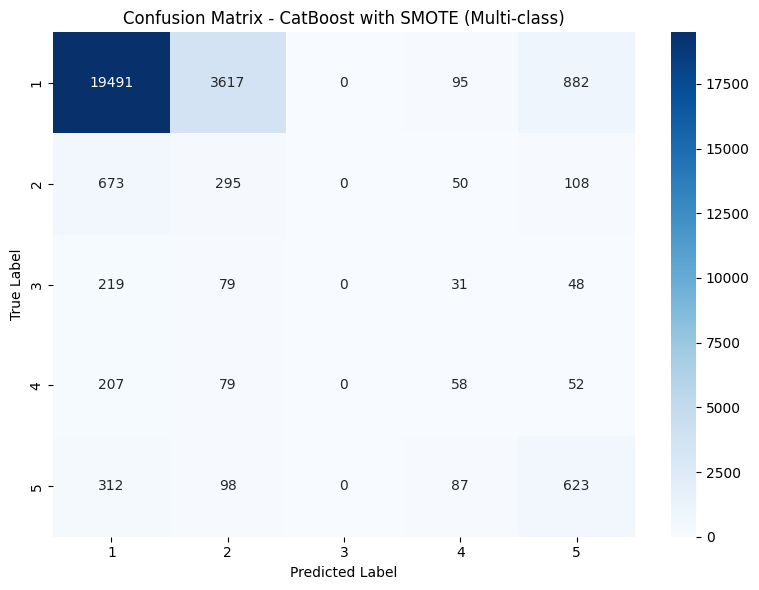

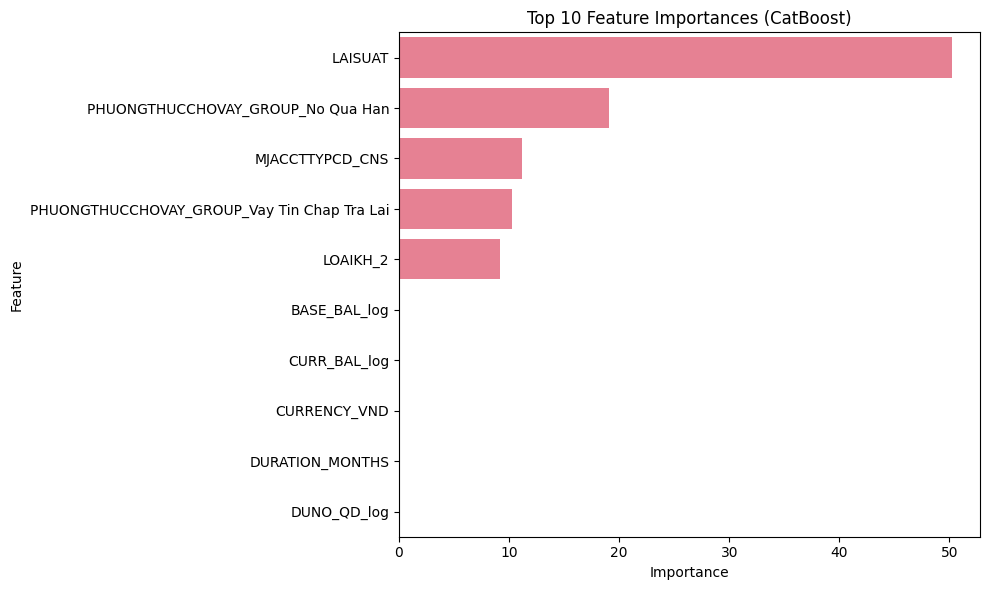

In [ ]:
# prompt: try to train this dataset on CatBoost, model, apply SMOTE for it too

!pip install catboost

from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Create a copy of the data
data_model = data.copy() # Start from a fresh copy

# Drop original categorical columns that have been encoded or are irrelevant
data_model = data_model.drop(['LOAIKH', 'CURRENCYCD', 'MJACCTTYPCD', 'PHUONG THUC CHO VAY',
                              'MUCDICHVAY', 'Nhom_MucDich', 'ORGNBR', 'ORGNAME', 'PARENTORGNBR',
                              'PARENTORGNAME', 'REGION', 'SEX', 'SEX_GROUP',
                              'OPEN_DATE', 'NGAYDENHAN', 'DURATION_DAYS',
                              'ID_TIME', 'DESC_TIME', 'MJACCTTYPDESC', 'NHOMNO', # Drop original NHOMNO
                               'NHOMNO_TCBS', 'Rating_Binary'], # Drop Rating_Binary
                             axis=1, errors='ignore')

# Define numerical features
numerical_features = ['BASE_BAL_log', 'CURR_BAL_log', 'DUNO_QD_log', 'LAISUAT', 'DURATION_MONTHS']

# Recreate encoded features (ensure consistency with previous steps)
# Assuming the functions like classify_mucdichvay exist from preceding code
if 'Nhom_MucDich' not in data.columns:
    data = classify_mucdichvay(data)
if 'REGION' not in data.columns:
     mien_bac_codes = [27, 42, 63, 73, 79, 80, 83, 84, 85, 86, 87, 88]
     mien_trung_codes = [4, 19, 20, 21, 64, 66, 67, 81, 89, 90, 94, 95, 98, 103, 108, 114, 115, 137, 138]
     mien_nam_codes = [3, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 65, 68, 69, 70, 71, 72, 74, 75, 76, 77, 78, 91, 92, 93, 96, 97, 99, 100, 101, 102, 104, 105, 106, 107, 109, 110, 111, 112, 113, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136]
     def classify_region_simple(orgnbr):
        if orgnbr in mien_bac_codes:
            return 'Miền Bắc'
        elif orgnbr in mien_trung_codes:
            return 'Miền Trung'
        elif orgnbr in mien_nam_codes:
            return 'Miền Nam'
        else:
            return 'Không xác định'
     data['REGION'] = data['ORGNBR'].apply(classify_region_simple)
if 'SEX_GROUP' not in data.columns:
     sex_mapping = {
        'ONG': 'Male',
        'MR': 'Male',
        'BA': 'Female',
        'MS': 'Female',
        'MRS': 'Female',
        np.nan: 'Business'
    }
     data['SEX_GROUP'] = data['SEX'].map(sex_mapping).fillna('Business')
     data.loc[data['SEX'] == '', 'SEX_GROUP'] = 'Business'


loaikh_encoded = pd.get_dummies(data['LOAIKH'], prefix='LOAIKH', drop_first=True)
currency_encoded = pd.get_dummies(data['CURRENCYCD'], prefix='CURRENCY', drop_first=True)
mjaccttypcd_encoded = pd.get_dummies(data['MJACCTTYPCD'], prefix='MJACCTTYPCD', drop_first=True)
phuongthuc_encoded = pd.get_dummies(data['PHUONGTHUCCHOVAY_GROUP'], prefix='PHUONGTHUCCHOVAY_GROUP', drop_first=False)
nhom_mucdich_encoded = pd.get_dummies(data['Nhom_MucDich'], prefix='MUC_DICH_VAY_GROUPED', drop_first=False)
sex_encoded = pd.get_dummies(data['SEX_GROUP'], prefix='SEX_GROUP', drop_first=True)
REGION_ENCODED = pd.get_dummies(data['REGION'], prefix='REGION', drop_first=False)


# Combine all features and the target
data_model = pd.concat([data_model[numerical_features],
                        loaikh_encoded,
                        currency_encoded,
                        mjaccttypcd_encoded,
                        phuongthuc_encoded,
                        nhom_mucdich_encoded,
                        sex_encoded,
                        REGION_ENCODED,
                        data_model[['NHOMNOMOI']]], # Use NHOMNOMOI as target
                       axis=1)

# Remove duplicate columns
data_model = data_model.loc[:, ~data_model.columns.duplicated()]

# Define features (X) and target (y) from the *full* data_model
feature_columns = [col for col in data_model.columns if col != 'NHOMNOMOI']
X = data_model[feature_columns]
y = data_model['NHOMNOMOI']

# Handle NaN values *before* splitting and SMOTE
# Fill NaN for numerical features with median
X[numerical_features] = X[numerical_features].fillna(X[numerical_features].median())
# Fill NaN for encoded (categorical) features with 0
encoded_features = [col for col in feature_columns if col not in numerical_features]
X[encoded_features] = X[encoded_features].fillna(0)


# Split data into training and testing sets (using the filled data)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y # Stratify by the multi-class target
)



# Create a pipeline with SMOTE and CatBoostClassifier
pipeline_cb = Pipeline([
    ('smote', SMOTE(random_state=42, sampling_strategy='not majority')),  # SMOTE for multi-class
    ('catboost', CatBoostClassifier(
        iterations=1000,             # Number of boosting iterations
        learning_rate=0.1,           # Step size shrinkage
        depth=6,                     # Depth of trees
        loss_function='MultiClass',  # Multi-class objective
        eval_metric='Accuracy', # Evaluation metric - Changed from 'MultiClassAccuracy' to 'Accuracy'
        random_state=42,             # Random state for reproducibility
        verbose=0,                   # Suppress verbose output during training
        early_stopping_rounds=50,    # Stop early if validation score doesn't improve
        l2_leaf_reg=3,               # L2 regularization
        border_count=128,            # Number of splits for numerical features
        # Use auto_class_weights instead of class_weights='Balanced'
        auto_class_weights='Balanced',
    ))
])

# Train the pipeline
print("Training CatBoost Model with SMOTE (Multi-class)...")
# CatBoost can use a validation set for early stopping
pipeline_cb.fit(
    X_train, y_train,
    catboost__eval_set=(X_test, y_test), # Pass validation set to CatBoost
    catboost__early_stopping_rounds=50,  # Explicitly pass early stopping rounds again
    catboost__verbose=False # Ensure verbosity is off during fit inside pipeline
)
print("Training complete.")

# Predict
y_pred = pipeline_cb.predict(X_test)

# CatBoost predictions are often returned as floats, convert to integers
y_pred = y_pred.astype(int)


# Evaluate
print("\nCatBoost Model Evaluation with SMOTE (Multi-class):")
print("\nAccuracy:", accuracy_score(y_test, y_pred))
# Use classification_report without zero_division for multi-class
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


# Access the trained CatBoost model from the pipeline
catboost_model = pipeline_cb.named_steps['catboost']

# Feature importances from CatBoost
feature_importance_cb = pd.DataFrame({
    'Feature': X.columns,
    'Importance': catboost_model.get_feature_importance()
}).sort_values(by='Importance', ascending=False)

print("\nTop 10 Feature Importances (CatBoost):")
print(feature_importance_cb.head(10))

# Create the confusion matrix heatmap
cm_cb = confusion_matrix(y_test, y_pred)
# Get unique class labels from the target variable
labels_cb = sorted(y.unique())

plt.figure(figsize=(8, 6)) # Adjust size for multi-class matrix
sns.heatmap(cm_cb, annot=True, fmt='d', cmap='Blues', xticklabels=labels_cb, yticklabels=labels_cb)
plt.title('Confusion Matrix - CatBoost with SMOTE (Multi-class)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# Feature Importance Visualization (Top 10)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_cb.head(10))
plt.title('Top 10 Feature Importances (CatBoost)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# DATA VALIDATION

## Load data

### Subtask:
Load the data from "/content/drive/MyDrive/CREDIT_SCORING/DATA/Data for midterm and final projects-20250607/Data-Validation.xlsx" into a pandas DataFrame.


In [ ]:
data_validation = pd.read_excel('/content/Data-Validation.xlsx')
data_validation.head()

,MJACCTTYPCD,PHUONG THUC CHO VAY,LOAIKH,SEX,BASE_BAL,CURR_BAL,DUNO_QD,CURRENCYCD,OPEN_DATE,NGAYDENHAN,ID_TIME,DESC_TIME,MJACCTTYPDESC,ORGNBR,ORGNAME,PARENTORGNBR,PARENTORGNAME,LAISUAT,MUCDICHVAY
0,MTG,CV TL NH LAI DINH KY VND,1,ONG,200000000,200000000,200000000,VND,30/07/2020,30/07/2021,1,Vay ngan han,Vay Nong Nghiep,34,KLB - CN RACH GIA,34,KLB - CN RACH GIA,0.129,0111-Nong nghiep
1,MTG,CV TL NH LAI DINH KY VND,1,BA,330000000,330000000,330000000,VND,30/07/2020,30/07/2021,1,Vay ngan han,Vay Nong Nghiep,100,KLB - PGD CUKUIN,25,KLB - CN DAK LAK,0.111,0111-Nong nghiep
2,MTG,CV TL NH LAI DINH KY VND,1,ONG,30000000,30000000,30000000,VND,30/07/2020,30/07/2021,1,Vay ngan han,Vay Nong Nghiep,31,KLB - CN HAU GIANG,31,KLB - CN HAU GIANG,0.108,0131-Tmua-CB-BQ-TT luong thuc
3,MTG,CV TL NH LAI DINH KY VND,1,ONG,140000000,140000000,140000000,VND,43898,44263,1,Vay ngan han,Vay Nong Nghiep,32,KLB - PGD LONG MY,31,KLB - CN HAU GIANG,0.129,0111-Nong nghiep
4,CNS,"CV TL TH GOC, LAI D.KY VND",1,ONG,250000000,250000000,250000000,VND,43929,45755,2,Vay trung han,Vay Tieu dung,25,KLB - CN DAK LAK,25,KLB - CN DAK LAK,0.120,1830-CV Sua chua Nha de o


## Initial data overview


In [ ]:
# 1. Display the first 5 rows of the data_validation DataFrame
print("First 5 rows of the DataFrame:")
display(data_validation.head())

# 2. Display the last 5 rows of the data_validation DataFrame
print("\nLast 5 rows of the DataFrame:")
display(data_validation.tail())

# 3. Print concise information about the data_validation DataFrame
print("\nInformation about the DataFrame:")
data_validation.info()

First 5 rows of the DataFrame:


,MJACCTTYPCD,PHUONG THUC CHO VAY,LOAIKH,SEX,BASE_BAL,CURR_BAL,DUNO_QD,CURRENCYCD,OPEN_DATE,NGAYDENHAN,ID_TIME,DESC_TIME,MJACCTTYPDESC,ORGNBR,ORGNAME,PARENTORGNBR,PARENTORGNAME,LAISUAT,MUCDICHVAY
0,MTG,CV TL NH LAI DINH KY VND,1,ONG,200000000,200000000,200000000,VND,30/07/2020,30/07/2021,1,Vay ngan han,Vay Nong Nghiep,34,KLB - CN RACH GIA,34,KLB - CN RACH GIA,0.129,0111-Nong nghiep
1,MTG,CV TL NH LAI DINH KY VND,1,BA,330000000,330000000,330000000,VND,30/07/2020,30/07/2021,1,Vay ngan han,Vay Nong Nghiep,100,KLB - PGD CUKUIN,25,KLB - CN DAK LAK,0.111,0111-Nong nghiep
2,MTG,CV TL NH LAI DINH KY VND,1,ONG,30000000,30000000,30000000,VND,30/07/2020,30/07/2021,1,Vay ngan han,Vay Nong Nghiep,31,KLB - CN HAU GIANG,31,KLB - CN HAU GIANG,0.108,0131-Tmua-CB-BQ-TT luong thuc
3,MTG,CV TL NH LAI DINH KY VND,1,ONG,140000000,140000000,140000000,VND,43898,44263,1,Vay ngan han,Vay Nong Nghiep,32,KLB - PGD LONG MY,31,KLB - CN HAU GIANG,0.129,0111-Nong nghiep
4,CNS,"CV TL TH GOC, LAI D.KY VND",1,ONG,250000000,250000000,250000000,VND,43929,45755,2,Vay trung han,Vay Tieu dung,25,KLB - CN DAK LAK,25,KLB - CN DAK LAK,0.120,1830-CV Sua chua Nha de o



Last 5 rows of the DataFrame:


,MJACCTTYPCD,PHUONG THUC CHO VAY,LOAIKH,SEX,BASE_BAL,CURR_BAL,DUNO_QD,CURRENCYCD,OPEN_DATE,NGAYDENHAN,ID_TIME,DESC_TIME,MJACCTTYPDESC,ORGNBR,ORGNAME,PARENTORGNBR,PARENTORGNAME,LAISUAT,MUCDICHVAY
4922,MTG,CV TL NH LAI DINH KY VND,1,ONG,400000000,400000000,400000000,VND,26/05/2020,26/05/2021,1,Vay ngan han,Vay Nong Nghiep,74,KLB - PGD TAN HIEP,34,KLB - CN RACH GIA,0.111,0111-Nong nghiep
4923,MTG,CV TL NH LAI DINH KY VND,1,BA,500000000,500000000,500000000,VND,17/07/2020,17/07/2021,1,Vay ngan han,Vay Nong Nghiep,8,KLB - CN BAC LIEU,8,KLB - CN BAC LIEU,0.111,0210-Nuoi trong thuy san
4924,CNS,CV TL NH LAI DINH KY VND,1,BA,80000000,80000000,80000000,VND,43990,43900,1,Vay ngan han,Vay Tieu dung,34,KLB - CN RACH GIA,34,KLB - CN RACH GIA,0.086,1850-CV the chap STK
4925,CML,CV TL NH LAI DINH KY VND,1,BA,600000000,600000000,600000000,VND,31/07/2020,31/07/2021,1,Vay ngan han,Vay Cong Thuong,66,KLB - PGD NINH HOA,4,KLB - CN KHANH HOA,0.106,"1899-DV Ca nhan,gia dinh khac"
4926,CNS,"CV TL DH GOC, LAI D.KY VND",1,BA,8400000000,8400000000,8400000000,VND,44112,51417,3,Vay dai han,Vay Tieu dung,96,KLB - CN BA RIA - VUNG TAU,96,KLB - CN BA RIA - VUNG TAU,0.120,"1822-CV mua,nhan,nhuong BDS"



Information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4927 entries, 0 to 4926
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MJACCTTYPCD          4927 non-null   object 
 1   PHUONG THUC CHO VAY  4927 non-null   object 
 2   LOAIKH               4927 non-null   int64  
 3   SEX                  4662 non-null   object 
 4   BASE_BAL             4927 non-null   int64  
 5   CURR_BAL             4927 non-null   int64  
 6   DUNO_QD              4927 non-null   int64  
 7   CURRENCYCD           4927 non-null   object 
 8   OPEN_DATE            4927 non-null   object 
 9   NGAYDENHAN           4927 non-null   object 
 10  ID_TIME              4927 non-null   int64  
 11  DESC_TIME            4927 non-null   object 
 12  MJACCTTYPDESC        4927 non-null   object 
 13  ORGNBR               4927 non-null   int64  
 14  ORGNAME              4927 non-null   object 
 15  PARE

## Missing values check

### Subtask:
Check for and report any missing values in the DataFrame.


In [ ]:
# Calculate the number of missing values for each column
missing_values = data_validation.isnull().sum()

# Print the count of missing values for each column
print("Missing values per column:")
print(missing_values)

Missing values per column:
MJACCTTYPCD              0
PHUONG THUC CHO VAY      0
LOAIKH                   0
SEX                    265
BASE_BAL                 0
CURR_BAL                 0
DUNO_QD                  0
CURRENCYCD               0
OPEN_DATE                0
NGAYDENHAN               0
ID_TIME                  0
DESC_TIME                0
MJACCTTYPDESC            0
ORGNBR                   0
ORGNAME                  0
PARENTORGNBR             0
PARENTORGNAME            0
LAISUAT                  0
MUCDICHVAY               0
dtype: int64


## VALIDATION EDA




In [ ]:
# Identify numerical and categorical columns
numerical_cols = data_validation.select_dtypes(include=np.number).columns.tolist()
categorical_cols = data_validation.select_dtypes(include='object').columns.tolist()

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

# Descriptive statistics for numerical columns
print("\n--- Descriptive Statistics for Numerical Columns ---")
display(data_validation[numerical_cols].describe())

# Value counts for categorical columns
print("\n--- Value Counts for Categorical Columns ---")
for col in categorical_cols:
    print(f"\nValue Counts for '{col}':")
    print(data_validation[col].value_counts(dropna=False)) # Include NaN counts
    print(f"Number of unique values: {data_validation[col].nunique()}")

In [ ]:
# Visualize distributions of key numerical variables

# Histograms
numerical_cols_to_plot_hist = ['BASE_BAL', 'CURR_BAL', 'DUNO_QD', 'LAISUAT', 'DURATION_MONTHS']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols_to_plot_hist):
    if col in data_validation.columns:
        plt.subplot(2, 3, i + 1)
        sns.histplot(data=data_validation, x=col, kde=True, bins=30)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Box plots
numerical_cols_to_plot_box = ['BASE_BAL', 'CURR_BAL', 'DUNO_QD', 'LAISUAT', 'DURATION_MONTHS']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols_to_plot_box):
    if col in data_validation.columns:
        plt.subplot(2, 3, i + 1)
        sns.boxplot(data=data_validation, x=col)
        plt.title(f'Box Plot of {col}')
        plt.xlabel(col)
plt.tight_layout()
plt.show()

## VALIDATION FEATURE ENGINEERING

In [ ]:
# 1. Handle Dates and calculate DURATION_MONTHS
# Define a list of possible date formats to try
date_formats = ['%d/%m/%Y', '%Y-%m-%d %H:%M:%S']

# Attempt to convert 'OPEN_DATE' and 'NGAYDENHAN' columns to datetime
def safe_to_datetime(series, formats):
    for fmt in formats:
        try:
            return pd.to_datetime(series, format=fmt, errors='coerce')
        except ValueError:
            continue
    return pd.to_datetime(series, errors='coerce') # Fallback

data_validation['OPEN_DATE'] = safe_to_datetime(data_validation['OPEN_DATE'], date_formats)
data_validation['NGAYDENHAN'] = safe_to_datetime(data_validation['NGAYDENHAN'], date_formats)


# Calculate DURATION_DAYS by finding the difference between NGAYDENHAN and OPEN_DATE
# and then extract the number of days.
data_validation['DURATION_DAYS'] = (data_validation['NGAYDENHAN'] - data_validation['OPEN_DATE']).dt.days

# Use 'data' instead of 'df' to calculate DURATION_MONTHS
data_validation['DURATION_MONTHS'] = data_validation['DURATION_DAYS'] // 30


print("Date handling and duration calculation complete.")
print(data_validation[['OPEN_DATE', 'NGAYDENHAN', 'DURATION_DAYS', 'DURATION_MONTHS']].head())

# Apply Log Transformation to numerical features
numerical_cols_to_log = ['BASE_BAL', 'CURR_BAL', 'DUNO_QD', 'LAISUAT'] # DURATION_MONTHS is not typically logged

for col in numerical_cols_to_log:
    # Add a small constant (e.g., 1) before taking the log to handle zero values
    data_validation[col + '_log'] = np.log1p(data_validation[col])

print("\nLog transformation applied to numerical features.")
display(data_validation[[col + '_log' for col in numerical_cols_to_log] + ['DURATION_MONTHS']].head())

Date handling and duration calculation complete.
   OPEN_DATE NGAYDENHAN  DURATION_DAYS  DURATION_MONTHS
0 2020-07-30 2021-07-30          365.0             12.0
1 2020-07-30 2021-07-30          365.0             12.0
2 2020-07-30 2021-07-30          365.0             12.0
3        NaT        NaT            NaN              NaN
4        NaT        NaT            NaN              NaN

Log transformation applied to numerical features.


,BASE_BAL_log,CURR_BAL_log,DUNO_QD_log,LAISUAT_log,DURATION_MONTHS
0,19.113828,19.113828,19.113828,0.121332,12.0
1,19.614603,19.614603,19.614603,0.105261,12.0
2,17.216708,17.216708,17.216708,0.102557,12.0
3,18.757153,18.757153,18.757153,0.121332,NaN
4,19.336971,19.336971,19.336971,0.113329,NaN


In [ ]:
# 2. Create PHUONGTHUCCHOVAY_GROUP
phuongthucchovay_categories = {
    'Vay Tin Chap Tra Lai': ['CV TL NH LAI DINH KY VND', 'CV TL NH GOC, LAI D.KY VND', 'CV NH LAI GIU LAI MOT PHAN VND', 'CV NH LUAN CHUYEN VND', 'CV TL NH LAI DINH KY USD'],
    'Vay The Chap': ['CV TL TH GOC, LAI D.KY VND', 'CV TL TH LAI DINH KY VND', 'CV TL DH GOC, LAI D.KY VND', 'CV TH LAI GIU LAI MOT PHAN VND', 'CV TH LUAN CHUYEN VND'],
    'The Tin Dung': ['CV THE TIN DUNG VISA_NGUNG SD', 'CV THE JCB_NGUNG SD', 'CHO VAY THE TIN DUNG VND'],
    'Vay Tra Gop': ['CV TG NGAY VND', 'CV TG NH LAI ADD-ON VND', 'CV TG TH LAI ADD-ON VND'],
    'Thau Chi': ['CV THAU CHI CBNV KLB VND', 'CV THAU CHI CBNV NGOAI KLB VND', 'CV THAU CHI CO TSDB VND'],
    'No Qua Han': ['NQH NH VND', 'NQH TH VND', 'NQH DH VND', 'NQH CV NH MLFII VND', 'NQH CV TH RDFII VND', 'NQH CV TH RDFIII VND', 'NQH THE VISA VND', 'NQH THE JCB VND', 'NQH THE TIN DUNG VND'],
    'Tai Cap Von': ['CV TH RDFII GOC, LAI D.KY VND', 'CV TH RDFIII GOC, LAI D.KY VND', 'CV TH RDFIII LAI DINH KY VND', 'CV TH RDFII LAI DINH KY VND', 'CV NH RDFII LAI DINH KY VND'],
    'Co Cau No COVID': ['CV TH CO CAU NO COVID 19 VND', 'CV DH CO CAU NO COVID 19 VND', 'CV NH CO CAU NO COVID 19 VND'],
    'Vay MLF Dac Biet': ['CV NH MLFII LAI DINH KY VND', 'CV NH MLFIII LAI DINH KY VND']
}

data_validation['PHUONGTHUCCHOVAY_GROUP'] = 'Khac'
for group_name, values in phuongthucchovay_categories.items():
    data_validation.loc[data_validation['PHUONG THUC CHO VAY'].isin(values), 'PHUONGTHUCCHOVAY_GROUP'] = group_name

print("\nPHUONGTHUCCHOVAY_GROUP created.")
print(data_validation[['PHUONG THUC CHO VAY', 'PHUONGTHUCCHOVAY_GROUP']].head())


# 3. Create Nhom_MucDich
def create_mucdichvay_mapping():
    mapping = {
        '1900-SX-DV Tu t.dung Gia dinh': 'Tiêu dùng cá nhân/gia đình', '1870-CV TG Sinh hoat Tieu dung': 'Tiêu dùng cá nhân/gia đình',
        '1830-CV Sua chua Nha de o': 'Tiêu dùng cá nhân/gia đình', '1899-DV Ca nhan,gia dinh khac': 'Tiêu dùng cá nhân/gia đình',
        '1890-CV Cuoi hoi': 'Tiêu dùng cá nhân/gia đình', '1892-CV di Du lich': 'Tiêu dùng cá nhân/gia đình',
        '1880-CV Du hoc': 'Tiêu dùng cá nhân/gia đình', '1896-SC Dien tu,Do dung CN,GD': 'Tiêu dùng cá nhân/gia đình',
        '1811-CV mua Xe may tra gop': 'Mua sắm & trả góp', '1810-CV mua tra gop hang TD': 'Mua sắm & trả góp',
        '1812-CV mua Xe Co gioi tra gop': 'Mua sắm & trả góp', '1813-CV mua may moc, PTVT': 'Mua sắm & trả góp',
        '1814-CV mua nha xuong, nha VP': 'Mua sắm & trả góp', '1815-CV mua TSCD khac': 'Mua sắm & trả góp',
        '1820-CV mua nha tra gop de o': 'Mua sắm & trả góp', '1821-CV mua nha tra gop GV': 'Mua sắm & trả góp',
        '1822-CV mua,nhan,nhuong BDS': 'Mua sắm & trả góp', '1226-XD SC mua nha ban/cho thu': 'Mua sắm & trả góp',
        '1227-Mua quyen su dung dat': 'Mua sắm & trả góp',
        '1894-Kinh doanh Ca the': 'Kinh doanh cá thể', '1850-CV the chap STK': 'Kinh doanh cá thể',
        '1851-The chap STK-DNTN KDV': 'Kinh doanh cá thể', '1895-Kinh doanh chung khoan': 'Kinh doanh cá thể',
        '1050-Dau tu, Gop von': 'Kinh doanh cá thể', '1816-CV Bo sung von luu dong': 'Kinh doanh cá thể',
        '0111-Nong nghiep': 'Nông-Lâm-Ngư nghiệp', '0112-Lam nghiep': 'Nông-Lâm-Ngư nghiệp',
        '0113-Cay luong thuc': 'Nông-Lâm-Ngư nghiệp', '0114-Cay khac': 'Nông-Lâm-Ngư nghiệp',
        '0117-Thu mua-CB-BQ lam san': 'Nông-Lâm-Ngư nghiệp', '0118-Lam nghiep khac': 'Nông-Lâm-Ngư nghiệp',
        '0119-SX, NK phan bon': 'Nông-Lâm-Ngư nghiệp', '0120-HD Dich vu lien quan NN': 'Nông-Lâm-Ngư nghiệp',
        '0121-May moc Pvu trong trot': 'Nông-Lâm-Ngư nghiệp', '0122-Chi phi chan nuoi': 'Nông-Lâm-Ngư nghiệp',
        '0124-Dv phi nong nghiep': 'Nông-Lâm-Ngư nghiệp', '0128-XK Ldong o nong thon': 'Nông-Lâm-Ngư nghiệp',
        '0129-Khac': 'Nông-Lâm-Ngư nghiệp', '0130-Tmua-CB-BQ-TT nong san': 'Nông-Lâm-Ngư nghiệp',
        '0131-Tmua-CB-BQ-TT luong thuc': 'Nông-Lâm-Ngư nghiệp', '0132-Tmua-CB-BQ-TT thuy san': 'Nông-Lâm-Ngư nghiệp',
        '0133-Tmua-CB-BQ-TT khac': 'Nông-Lâm-Ngư nghiệp',
        '0210-Nuoi trong thuy san': 'Nông-Lâm-Ngư nghiệp', '0211-Nuoi trong thuy san bien': 'Nông-Lâm-Ngư nghiệp',
        '0212- Nuoi trong thuy san noi': 'Nông-Lâm-Ngư nghiệp', '0220-SX Giong thuy san': 'Nông-Lâm-Ngư nghiệp',
        '0230-Khai thac thuy san': 'Nông-Lâm-Ngư nghiệp', '0231- Dong, nang cap tau': 'Nông-Lâm-Ngư nghiệp',
        '0232-Chi phi phuc vu khai thac': 'Nông-Lâm-Ngư nghiệp', '0240-HD thuy san khac': 'Nông-Lâm-Ngư nghiệp',
        '0610-XD nha cac loai': 'Bất động sản & xây dựng', '0620-XD cong trinh duong bo': 'Bất động sản & xây dựng',
        '0630-HD Xay dung chuyen dung': 'Bất động sản & xây dựng', '0690-HD Xay dung khac': 'Bất động sản & xây dựng',
        '1210-Hoat dong KD tai san': 'Bất động sản & xây dựng', '1211-Kinh doanh BDS': 'Bất động sản & xây dựng',
        '1213-Cho thue Nha,Can ho,Dat': 'Bất động sản & xây dựng', '1214-HD Kinh doanh BDS khac': 'Bất động sản & xây dựng',
        '1222-HD dich vu BDS khac': 'Bất động sản & xây dựng', '1223-XD KCN, KCXuat': 'Bất động sản & xây dựng',
        '0710-HD Thuong nghiep': 'Thương mại', '0711-Ban buon L.thuc,T.pham': 'Thương mại',
        '0712-Ban buon hang TD, TBVP': 'Thương mại', '0713-Ban buon TBi, PT Van Tai': 'Thương mại',
        '0714-Ban buon VLXD': 'Thương mại', '0715-Ban buon TBi,dung cu Yte': 'Thương mại',
        '0716-Ban buon nguyen NVL': 'Thương mại', '0719-Ban buon,le hang hoa khac': 'Thương mại',
        '0720-Ban buon,bao duong,SC Xe': 'Thương mại',
        '0410-SX Che bien Thuc pham': 'Sản xuất-Công nghiệp', '0411-Che bien thuy, hai san': 'Sản xuất-Công nghiệp',
        '0415-SX trang phuc, may mac': 'Sản xuất-Công nghiệp', '0420-SX hang T.dung,Tbi VP': 'Sản xuất-Công nghiệp',
        '0430-SX May moc,Tbi, PTVT': 'Sản xuất-Công nghiệp', '0440-SX Thiet bi,VLXD': 'Sản xuất-Công nghiệp',
        '0490-San xuat,Che bien khac': 'Sản xuất-Công nghiệp', '0520-SX Khi dot,PP Nh.Lieu Khi': 'Sản xuất-Công nghiệp',
        '0530-Khai thac loc,SX PP nuoc': 'Sản xuất-Công nghiệp', '0541-QL, XL rac thai, nuoc tha': 'Sản xuất-Công nghiệp',
        '0340-HD Khai khoang khac': 'Sản xuất-Công nghiệp',
        '0810-Dich vu Luu tru': 'Dịch vụ khác', '0820-Dich vu An uong': 'Dịch vụ khác',
        '0910-Hoat dong van tai': 'Dịch vụ khác', '0911-VT duong sat-Dbo-D.ong': 'Dịch vụ khác',
        '0912-Van tai duong thuy': 'Dịch vụ khác', '0920-Hoat dong kho bai': 'Dịch vụ khác',
        '0940-DV Ho tro lien quan VT': 'Dịch vụ khác', '1400-Giao duc va dao tao': 'Dịch vụ khác',
        '1500-HD Yte, Tro giup XH': 'Dịch vụ khác', '1600-NgThuat,Giai tri,The thao': 'Dịch vụ khác',
        '1730-Vien thong': 'Dịch vụ khác', '1750-HD dich vu Thong tin': 'Dịch vụ khác',
        '2250-Hanh chinh,DV Ho tro khac': 'Dịch vụ khác',
        '1860-CV CBCNV KLB': 'CBCNV/Thẻ tín dụng', '1861-CV TG CBCNV ngoai KLB': 'CBCNV/Thẻ tín dụng',
        '1840-CV master-Visa-JCB card': 'CBCNV/Thẻ tín dụng',
        '0000-Khong xac dinh': 'Không xác định', 0: 'Không xác định'
    }
    return mapping

def classify_mucdichvay_val(df, column_name='MUCDICHVAY', new_column='Nhom_MucDich'):
    mapping = create_mucdichvay_mapping()
    df[new_column] = df[column_name].map(mapping).fillna('Khác')
    return df

data_validation = classify_mucdichvay_val(data_validation)
print("\nNhom_MucDich created.")
print(data_validation[['MUCDICHVAY', 'Nhom_MucDich']].head())

# 4. Create REGION
mien_bac_codes = [27, 42, 63, 73, 79, 80, 83, 84, 85, 86, 87, 88]
mien_trung_codes = [4, 19, 20, 21, 64, 66, 67, 81, 89, 90, 94, 95, 98, 103, 108, 114, 115, 137, 138]
mien_nam_codes = [3, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 65, 68, 69, 70, 71, 72, 74, 75, 76, 77, 78, 91, 92, 93, 96, 97, 99, 100, 101, 102, 104, 105, 106, 107, 109, 110, 111, 112, 113, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136]

def classify_region_simple_val(orgnbr):
    if orgnbr in mien_bac_codes:
        return 'Miền Bắc'
    elif orgnbr in mien_trung_codes:
        return 'Miền Trung'
    elif orgnbr in mien_nam_codes:
        return 'Miền Nam'
    else:
        return 'Không xác định'

data_validation['REGION'] = data_validation['ORGNBR'].apply(classify_region_simple_val)
print("\nREGION created.")
print(data_validation[['ORGNBR', 'REGION']].head())


# 5. Create SEX_GROUP
sex_mapping = {
    'ONG': 'Male', 'MR': 'Male', 'BA': 'Female', 'MS': 'Female', 'MRS': 'Female', np.nan: 'Business'
}
data_validation['SEX_GROUP'] = data_validation['SEX'].map(sex_mapping).fillna('Business')
data_validation.loc[data_validation['SEX'] == '', 'SEX_GROUP'] = 'Business'

print("\nSEX_GROUP created.")
print(data_validation[['SEX', 'SEX_GROUP']].head())


PHUONGTHUCCHOVAY_GROUP created.
          PHUONG THUC CHO VAY PHUONGTHUCCHOVAY_GROUP
0    CV TL NH LAI DINH KY VND   Vay Tin Chap Tra Lai
1    CV TL NH LAI DINH KY VND   Vay Tin Chap Tra Lai
2    CV TL NH LAI DINH KY VND   Vay Tin Chap Tra Lai
3    CV TL NH LAI DINH KY VND   Vay Tin Chap Tra Lai
4  CV TL TH GOC, LAI D.KY VND           Vay The Chap

Nhom_MucDich created.
                      MUCDICHVAY                Nhom_MucDich
0               0111-Nong nghiep         Nông-Lâm-Ngư nghiệp
1               0111-Nong nghiep         Nông-Lâm-Ngư nghiệp
2  0131-Tmua-CB-BQ-TT luong thuc         Nông-Lâm-Ngư nghiệp
3               0111-Nong nghiep         Nông-Lâm-Ngư nghiệp
4      1830-CV Sua chua Nha de o  Tiêu dùng cá nhân/gia đình

REGION created.
   ORGNBR    REGION
0      34  Miền Nam
1     100  Miền Nam
2      31  Miền Nam
3      32  Miền Nam
4      25  Miền Nam

SEX_GROUP created.
   SEX SEX_GROUP
0  ONG      Male
1   BA    Female
2  ONG      Male
3  ONG      Male
4  ONG      Male


In [ ]:
# 6. Apply One-Hot Encoding
# Define columns to encode
categorical_cols_to_encode = ['LOAIKH', 'CURRENCYCD', 'MJACCTTYPCD', 'PHUONGTHUCCHOVAY_GROUP',
                              'Nhom_MucDich', 'SEX_GROUP', 'REGION']

# Apply one-hot encoding
loaikh_encoded_val = pd.get_dummies(data_validation['LOAIKH'], prefix='LOAIKH', drop_first=True)
currency_encoded_val = pd.get_dummies(data_validation['CURRENCYCD'], prefix='CURRENCY', drop_first=True)
mjaccttypcd_encoded_val = pd.get_dummies(data_validation['MJACCTTYPCD'], prefix='MJACCTTYPCD', drop_first=True)
phuongthuc_encoded_val = pd.get_dummies(data_validation['PHUONGTHUCCHOVAY_GROUP'], prefix='PHUONGTHUCCHOVAY_GROUP', drop_first=False)
nhom_mucdich_encoded_val = pd.get_dummies(data_validation['Nhom_MucDich'], prefix='MUC_DICH_VAY_GROUPED', drop_first=False)
sex_encoded_val = pd.get_dummies(data_validation['SEX_GROUP'], prefix='SEX_GROUP', drop_first=True)
region_encoded_val = pd.get_dummies(data_validation['REGION'], prefix='REGION', drop_first=False)


print("One-Hot Encoding complete.")
print("\nExample of encoded data (LOAIKH):")
display(loaikh_encoded_val.head())

One-Hot Encoding complete.

Example of encoded data (LOAIKH):


,LOAIKH_2
0,False
1,False
2,False
3,False
4,False


In [ ]:
# Define numerical features (should match the training data)
numerical_features = ['BASE_BAL_log', 'CURR_BAL_log', 'DUNO_QD_log', 'LAISUAT_log', 'DURATION_MONTHS'] # Include _log

# Combine numerical features and the encoded categorical features for validation data
X_validation = pd.concat([data_validation[numerical_features],
                          loaikh_encoded_val,
                          currency_encoded_val,
                          mjaccttypcd_encoded_val,
                          phuongthuc_encoded_val,
                          nhom_mucdich_encoded_val,
                          sex_encoded_val,
                          region_encoded_val],
                         axis=1)

# Ensure the columns of X_validation match the columns of X (training features)
# Add missing columns to X_validation and fill with 0
missing_cols_in_validation = set(X.columns) - set(X_validation.columns)
for col in missing_cols_in_validation:
    X_validation[col] = 0

# Reindex X_validation to match the column order of X
X_validation = X_validation[X.columns]

# Handle any remaining NaN values in X_validation (e.g., from duration calculation if dates were invalid)
# Fill numerical NaNs with median of training data (X_train), categorical NaNs with 0
# Use the original numerical feature names here before adding '_log' for consistency with X_train
original_numerical_features = ['BASE_BAL', 'CURR_BAL', 'DUNO_QD', 'LAISUAT'] # Use original names for median calculation reference

for col in numerical_features: # Iterate through the log-transformed names
    if col in X_validation.columns and X_validation[col].isnull().any():
        # Find the median of the corresponding original numerical feature from X_train
        original_col = col.replace('_log', '')
        if original_col in X_train.columns: # Check if original column exists in X_train
             # Calculate log of median from training original column
            training_median_original = X_train[original_col].median()
            training_median_log = np.log1p(training_median_original)
            X_validation[col] = X_validation[col].fillna(training_median_log) # Fill with log-transformed median
        else:
             # If original column not in X_train (unlikely), fill with 0 or median of the log column in X_train
            training_median_log = X_train[col].median() if col in X_train.columns else 0
            X_validation[col] = X_validation[col].fillna(training_median_log)


# Handle NaN for DURATION_MONTHS separately if needed (fill with training median)
if 'DURATION_MONTHS' in X_validation.columns and X_validation['DURATION_MONTHS'].isnull().any():
     training_median_duration = X_train['DURATION_MONTHS'].median() if 'DURATION_MONTHS' in X_train.columns else 0
     X_validation['DURATION_MONTHS'] = X_validation['DURATION_MONTHS'].fillna(training_median_duration)


# Fill any remaining NaNs (likely from encoding if a category was missing) with 0
X_validation = X_validation.fillna(0)


print("X_validation DataFrame prepared with matching columns and order to X (training features).")
print("\nFirst 5 rows of X_validation:")
display(X_validation.head())

print("\nShape of X (training features):", X.shape)
print("Shape of X_validation:", X_validation.shape)

# Verify columns match
print("\nChecking if columns in X_validation match columns in X:")
if list(X_validation.columns) == list(X.columns):
    print("Columns match!")
else:
    print("Column mismatch detected!")
    # print("\nColumns in X_validation but not in X:", set(X_validation.columns) - set(X.columns))
    # print("Columns in X but not in X_validation:", set(X.columns) - set(X_validation.columns))

X_validation DataFrame prepared with matching columns and order to X (training features).

First 5 rows of X_validation:


,BASE_BAL_log,CURR_BAL_log,DUNO_QD_log,LAISUAT,DURATION_MONTHS,LOAIKH_2,CURRENCY_VND,MJACCTTYPCD_CNS,MJACCTTYPCD_MTG,PHUONGTHUCCHOVAY_GROUP_Co Cau No COVID,...,MUC_DICH_VAY_GROUPED_Nông-Lâm-Ngư nghiệp,MUC_DICH_VAY_GROUPED_Sản xuất-Công nghiệp,MUC_DICH_VAY_GROUPED_Thương mại,MUC_DICH_VAY_GROUPED_Tiêu dùng cá nhân/gia đình,SEX_GROUP_Female,SEX_GROUP_Male,REGION_Không xác định,REGION_Miền Bắc,REGION_Miền Nam,REGION_Miền Trung
0,19.113828,19.113828,19.113828,0,12.000000,False,True,False,True,False,...,True,False,False,False,False,True,False,False,True,False
1,19.614603,19.614603,19.614603,0,12.000000,False,True,False,True,False,...,True,False,False,False,True,False,False,False,True,False
2,17.216708,17.216708,17.216708,0,12.000000,False,True,False,True,False,...,True,False,False,False,False,True,False,False,True,False
3,18.757153,18.757153,18.757153,0,2.639057,False,True,False,True,False,...,True,False,False,False,False,True,False,False,True,False
4,19.336971,19.336971,19.336971,0,2.639057,False,True,True,False,False,...,False,False,False,True,False,True,False,False,True,False



Shape of X (training features): (90344, 34)
Shape of X_validation: (4927, 34)

Checking if columns in X_validation match columns in X:
Columns match!


## Prediction Integration

In [ ]:
# Logistic Regression Predictions
# Note: The variable 'model' was used for a Neural Network model in the notebook.
# I will use the 'pipeline_logreg' variable which holds the trained Logistic Regression model.
if 'pipeline_logreg' in globals() and pipeline_logreg is not None:
    try:
        predictions_lr = pipeline_logreg.predict(X_validation)
        # Convert predictions to int if necessary
        predictions_lr = predictions_lr.astype(int)
        data_validation['pred_LogisticRegression'] = predictions_lr
        print("Predictions made with Logistic Regression.")
    except Exception as e:
        print(f"Error making predictions with Logistic Regression: {e}")
else:
    print("Logistic Regression pipeline not found. Skipping predictions.")


# Decision Tree Predictions (from pipeline)
if 'pipeline_dt' in globals() and pipeline_dt is not None:
    try:
        predictions_dt = pipeline_dt.predict(X_validation)
        # Convert predictions to int if necessary
        predictions_dt = predictions_dt.astype(int)
        data_validation['pred_DecisionTree'] = predictions_dt
        print("Predictions made with Decision Tree.")
    except Exception as e:
        print(f"Error making predictions with Decision Tree: {e}")
else:
    print("Decision Tree pipeline not found. Skipping predictions.")

# Random Forest Predictions (from pipeline)
if 'pipeline_rf' in globals() and pipeline_rf is not None:
    try:
        predictions_rf = pipeline_rf.predict(X_validation)
        # Convert predictions to int if necessary
        predictions_rf = predictions_rf.astype(int)
        data_validation['pred_RandomForest'] = predictions_rf
        print("Predictions made with Random Forest.")
    except Exception as e:
        print(f"Error making predictions with Random Forest: {e}")
else:
    print("Random Forest pipeline not found. Skipping predictions.")

# CatBoost Predictions (from pipeline)
if 'pipeline_cb' in globals() and pipeline_cb is not None:
    try:
        predictions_cb = pipeline_cb.predict(X_validation)
        # CatBoost predictions might need flattening and type conversion
        predictions_cb = predictions_cb.flatten().astype(int)
        data_validation['pred_CatBoost'] = predictions_cb
        print("Predictions made with CatBoost.")
    except Exception as e:
        print(f"Error making predictions with CatBoost: {e}")
else:
    print("CatBoost pipeline not found. Skipping predictions.")

# LightGBM Predictions (from pipeline)
if 'pipeline_lgbm' in globals() and pipeline_lgbm is not None:
    try:
        predictions_lgbm = pipeline_lgbm.predict(X_validation)
        # Convert predictions to int if necessary
        predictions_lgbm = predictions_lgbm.astype(int)
        data_validation['pred_LightGBM'] = predictions_lgbm
        print("Predictions made with LightGBM.")
    except Exception as e:
        print(f"Error making predictions with LightGBM: {e}")
else:
    print("LightGBM pipeline not found. Skipping predictions.")


# Neural Network Predictions
# The variable 'model' holds the Neural Network model
# The Neural Network requires scaled features for prediction
if 'model' in globals() and model is not None and 'scaler' in globals() and scaler is not None and 'label_encoder' in globals() and label_encoder is not None:
    try:
        # Define the numerical features used by the NN model (should match training)
        # These are the log-transformed ones and DURATION_MONTHS
        nn_numerical_features = ['BASE_BAL_log', 'CURR_BAL_log', 'DUNO_QD_log','LAISUAT', 'DURATION_MONTHS']

        # Define the encoded features used by the NN model (should match training)
        # These are all columns in X_validation that are not in nn_numerical_features
        nn_encoded_features = [col for col in X_validation.columns if col not in nn_numerical_features]

        # --- Corrected Data Preparation for NN Prediction ---

        original_numerical_features = ['BASE_BAL', 'CURR_BAL', 'DUNO_QD', 'LAISUAT']

        for col in numerical_features: # Iterate through the log-transformed names
             if col in X_validation.columns and X_validation[col].isnull().any():
                # Find the median of the corresponding original numerical feature from X_train
                original_col = col.replace('_log', '')
                if original_col in X_train.columns: # Check if original column exists in X_train
                     # Calculate log of median from training original column
                    training_median_original = X_train[original_col].median()
                    training_median_log = np.log1p(training_median_original)
                    X_validation[col] = X_validation[col].fillna(training_median_log) # Fill with log-transformed median
                else:
                     # If original column not in X_train (unlikely), fill with 0 or median of the log column in X_train
                    training_median_log = X_train[col].median() if col in X_train.columns else 0
                    X_validation[col] = X_validation[col].fillna(training_median_log)


        # Handle NaN for DURATION_MONTHS separately if needed (fill with training median)
        if 'DURATION_MONTHS' in X_validation.columns and X_validation['DURATION_MONTHS'].isnull().any():
             training_median_duration = X_train['DURATION_MONTHS'].median() if 'DURATION_MONTHS' in X_train.columns else 0
             X_validation['DURATION_MONTHS'] = X_validation['DURATION_MONTHS'].fillna(training_median_duration)


        # Fill any remaining NaNs (likely from encoding if a category was missing) with 0
        X_validation = X_validation.fillna(0)


        # Now scale the numerical features from the potentially re-filled X_validation
        X_validation_scaled_nn = scaler.transform(X_validation[nn_numerical_features])


        # Add missing columns to X_validation and fill with 0 (if any were somehow lost)
        missing_cols_in_validation = set(X.columns) - set(X_validation.columns)
        for col in missing_cols_in_validation:
            X_validation[col] = 0

        # Reindex X_validation to match the column order of X
        X_validation_processed_nn = X_validation[X.columns]

        # Now scale the numerical columns within this correctly ordered DataFrame
        X_validation_processed_nn[nn_numerical_features] = scaler.transform(X_validation_processed_nn[nn_numerical_features])

        # --- End Corrected Data Preparation ---


        # Predict probabilities with the NN model
        predictions_proba_nn = model.predict(X_validation_processed_nn)
        # Convert probabilities to class labels (indices)
        predictions_nn_indices = np.argmax(predictions_proba_nn, axis=1)
         # Convert indices back to original class labels
        predictions_nn = label_encoder.inverse_transform(predictions_nn_indices)

        data_validation['pred_NeuralNetwork'] = predictions_nn
        print("Predictions made with Neural Network.")
    except Exception as e:
        print(f"Error making predictions with Neural Network: {e}")
else:
    print("Neural Network model, scaler, or label encoder not found. Skipping predictions.")


# Display the first few rows of the data_validation DataFrame with predictions
print("\nValidation data with added prediction columns:")
display(data_validation.head())

Predictions made with Logistic Regression.
Predictions made with Decision Tree.
Predictions made with Random Forest.
Predictions made with CatBoost.
Predictions made with LightGBM.
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Predictions made with Neural Network.

Validation data with added prediction columns:


,MJACCTTYPCD,PHUONG THUC CHO VAY,LOAIKH,SEX,BASE_BAL,CURR_BAL,DUNO_QD,CURRENCYCD,OPEN_DATE,NGAYDENHAN,...,PHUONGTHUCCHOVAY_GROUP,Nhom_MucDich,REGION,SEX_GROUP,pred_LogisticRegression,pred_DecisionTree,pred_RandomForest,pred_CatBoost,pred_NeuralNetwork,pred_LightGBM
0,MTG,CV TL NH LAI DINH KY VND,1,ONG,200000000,200000000,200000000,VND,2020-07-30,2021-07-30,...,Vay Tin Chap Tra Lai,Nông-Lâm-Ngư nghiệp,Miền Nam,Male,4,1,1,1,5,1
1,MTG,CV TL NH LAI DINH KY VND,1,BA,330000000,330000000,330000000,VND,2020-07-30,2021-07-30,...,Vay Tin Chap Tra Lai,Nông-Lâm-Ngư nghiệp,Miền Nam,Female,4,1,1,1,5,1
2,MTG,CV TL NH LAI DINH KY VND,1,ONG,30000000,30000000,30000000,VND,2020-07-30,2021-07-30,...,Vay Tin Chap Tra Lai,Nông-Lâm-Ngư nghiệp,Miền Nam,Male,1,1,1,1,5,1
3,MTG,CV TL NH LAI DINH KY VND,1,ONG,140000000,140000000,140000000,VND,NaT,NaT,...,Vay Tin Chap Tra Lai,Nông-Lâm-Ngư nghiệp,Miền Nam,Male,4,1,1,1,1,1
4,CNS,"CV TL TH GOC, LAI D.KY VND",1,ONG,250000000,250000000,250000000,VND,NaT,NaT,...,Vay The Chap,Tiêu dùng cá nhân/gia đình,Miền Nam,Male,4,1,1,1,1,1


### VISUALIZATION

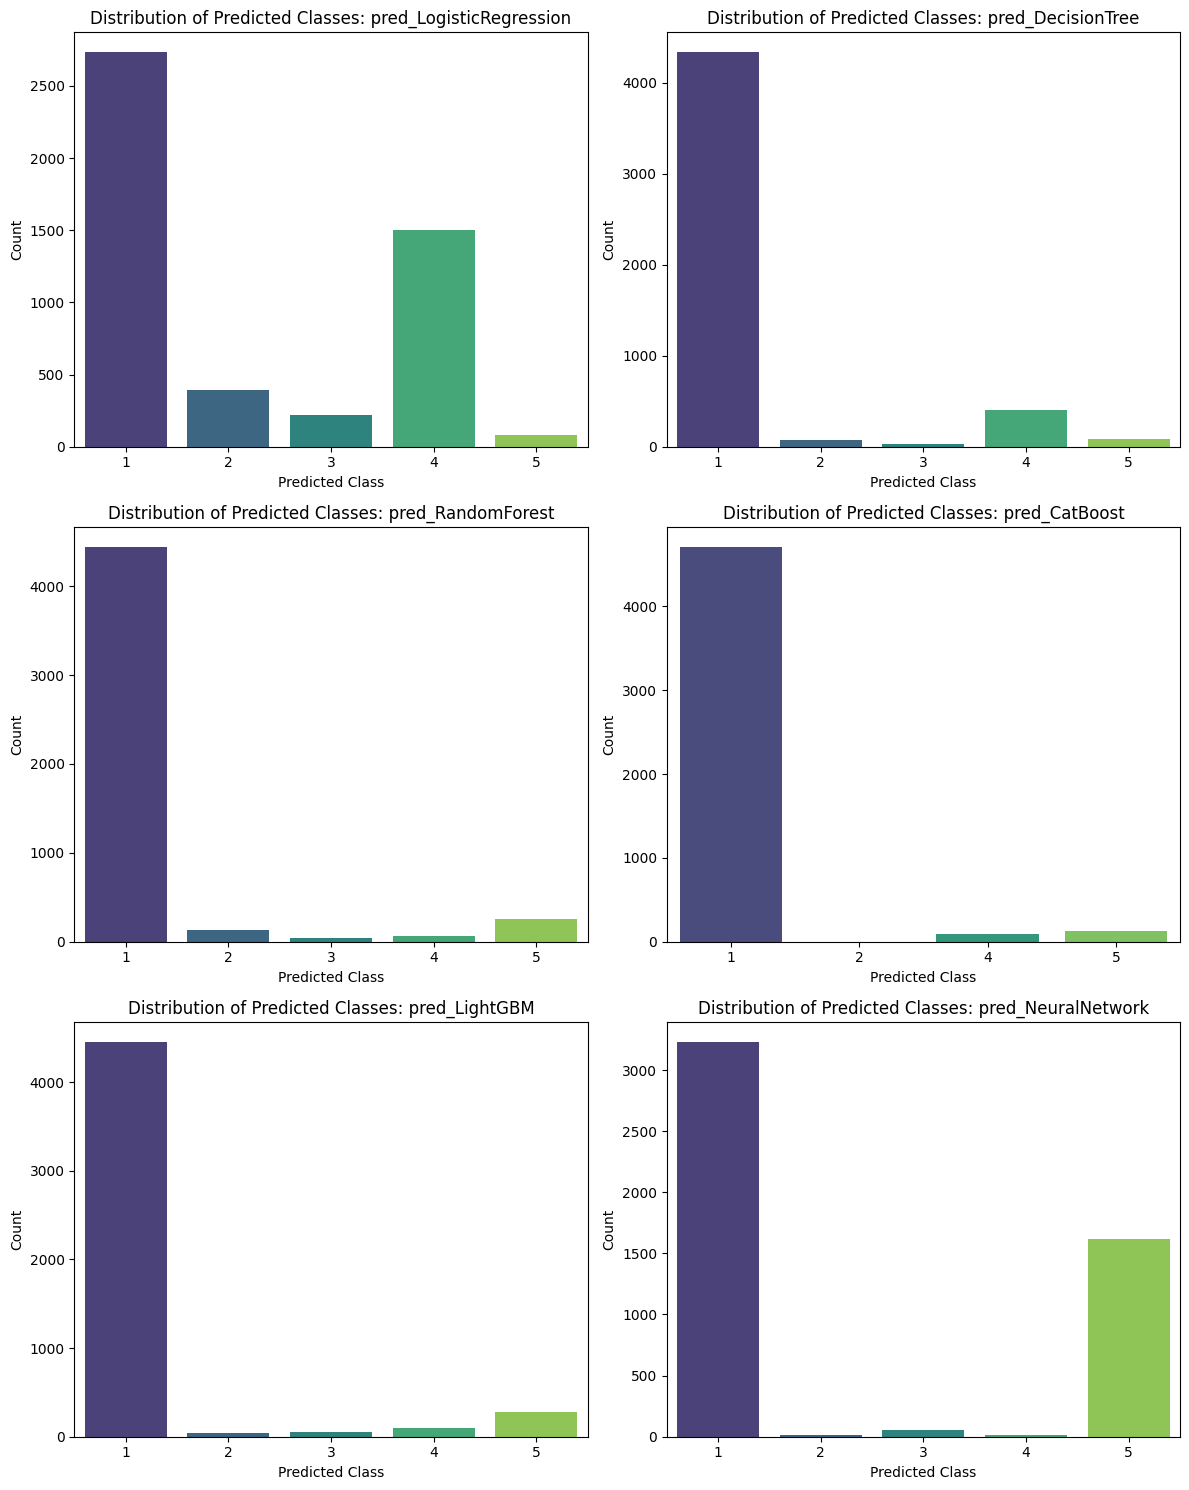


--- Predicted Class Value Counts ---

Value Counts for 'pred_LogisticRegression':


,count
pred_LogisticRegression,
1,2735
2,390
3,221
4,1500
5,81


------------------------------

Value Counts for 'pred_DecisionTree':


,count
pred_DecisionTree,
1,4340
2,79
3,25
4,399
5,84


------------------------------

Value Counts for 'pred_RandomForest':


,count
pred_RandomForest,
1,4441
2,128
3,44
4,61
5,253


------------------------------

Value Counts for 'pred_CatBoost':


,count
pred_CatBoost,
1,4709
2,2
4,91
5,125


------------------------------

Value Counts for 'pred_LightGBM':


,count
pred_LightGBM,
1,4453
2,40
3,49
4,104
5,281


------------------------------

Value Counts for 'pred_NeuralNetwork':


,count
pred_NeuralNetwork,
1,3229
2,13
3,51
4,18
5,1616


------------------------------


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Ensure pandas is imported

# Assuming data_validation DataFrame contains the prediction columns:
# 'pred_LogisticRegression', 'pred_DecisionTree', 'pred_RandomForest',
# 'pred_CatBoost', 'pred_LightGBM', 'pred_NeuralNetwork'

# List of prediction columns
prediction_cols = [
    'pred_LogisticRegression',
    'pred_DecisionTree',
    'pred_RandomForest',
    'pred_CatBoost',
    'pred_LightGBM',
    'pred_NeuralNetwork'
]

# Determine the number of plots needed
n_plots = len(prediction_cols)
n_cols = 2 # Number of columns for the subplot grid
n_rows = (n_plots + n_cols - 1) // n_cols # Calculate number of rows

plt.figure(figsize=(12, n_rows * 5)) # Adjust figure size based on number of rows

for i, col in enumerate(prediction_cols):
    if col in data_validation.columns:
        plt.subplot(n_rows, n_cols, i + 1)

        # Get value counts and sort by index (class label)
        pred_counts = data_validation[col].value_counts().sort_index()

        # Create the count plot
        sns.barplot(x=pred_counts.index, y=pred_counts.values, palette='viridis')

        plt.title(f'Distribution of Predicted Classes: {col}')
        plt.xlabel('Predicted Class')
        plt.ylabel('Count')
        plt.xticks(rotation=0) # Keep class labels horizontal for clarity

    else:
        print(f"Warning: Prediction column '{col}' not found in data_validation.")


plt.tight_layout() # Adjust layout to prevent overlapping
plt.show()

# Optional: Display value counts as tables
print("\n--- Predicted Class Value Counts ---")
for col in prediction_cols:
     if col in data_validation.columns:
        print(f"\nValue Counts for '{col}':")
        display(data_validation[col].value_counts().sort_index())
        print("-" * 30) # Separator
     else:
        print(f"Warning: Prediction column '{col}' not found for value counts.")

In [ ]:
import os

# Define the output path and filename
output_dir = '/content/drive/MyDrive/CREDIT_SCORING/DATA/Data for midterm and final projects-20250607/'
output_filename = 'validation_predictions_2.csv' # Changed filename to be more descriptive
output_path = os.path.join(output_dir, output_filename)

# Ensure the directory exists (optional, but good practice)
os.makedirs(output_dir, exist_ok=True)

# Save the DataFrame with predictions to a CSV file
try:
    # Select all columns from the data_validation DataFrame
    columns_to_save = data_validation.columns.tolist()

    # Save the DataFrame to CSV, excluding the index
    data_validation[columns_to_save].to_csv(output_path, index=False)
    print(f"Validation data with predictions saved successfully to: {output_path}")
except Exception as e:
    print(f"An error occurred while saving the validation data with predictions to CSV: {e}")

Validation data with predictions saved successfully to: /content/drive/MyDrive/CREDIT_SCORING/DATA/Data for midterm and final projects-20250607/validation_predictions_2.csv
